# <center>Customer Lifetime Value</center>

[Source Data](https://www.kaggle.com/datasets/ranja7/vehicle-insurance-customer-data)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Data Analysis Summary
7. Recommendation

### **1. Business Problem Understanding**

### Context:
The auto insurance industry, much like other subscription-based services, greatly benefits from understanding and predicting Customer Lifetime Value (CLV). CLV helps in assessing the profitability of the insurance company by predicting how valuable a customer is to the business over the entire relationship. Auto insurance companies face the challenge of lack of accuracy in predicting CLV. This uncertainty can result in the loss of valuable customers or inappropriate targeting in marketing efforts. Therefore, marketing departments need a solution that can provide CLV predictions with a high degree of accuracy. This will not only optimize marketing strategies but also help companies save time and costs.

#### Stakeholders:

Marketing Team (Auto Insurance Company)

- Role: Utilizing analytics to inform decision-making, specifically around pricing and customer segmentation.
- Involvement: Developing and refining pricing strategies based on predicted customer value.

### Business Problem Statement:

The auto insurance industry faces increasing pressure to optimize customer retention, maximize revenue, and efficiently allocate marketing resources. A key component in achieving these goals is understanding the factors that influence Customer Lifetime Value (CLV). By predicting CLV accurately, the company can develop targeted retention strategies, optimize pricing models, and enhance customer engagement to increase overall profitability.

Key Business Questions:
What are the key predictors of Customer Lifetime Value (CLV) in the auto insurance industry?

Which features such as income, total claim amount, monthly premium, and other demographics have the most significant impact on CLV?
How can we segment our customers based on their predicted CLV to implement targeted marketing strategies?

What strategies should be employed for different CLV segments (e.g., low, medium, high) to improve retention and customer satisfaction?

### Business Objective:

- Determine Key Features: Understand which features significantly predict the total lifetime value of shared customers.


**Metric Evaluation**

The Metric Evaluation that will be used is as follows:
* RMSE is the root mean square error.

Smaller values of RMSE indicate that the model is more accurate in predicting CLV.

Additionally, we can use R-squared or adj. R-squared if the selected model is a linear model. R-squared is used to determine how well the model represents the variance in the overall data. A value closer to 1 indicates a better fit of the model to the observed data. However, this metric is not valid for non-linear models.

### **2. Data Understanding**

The dataset contains customer data along with their respective CLV values.

**Features Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| State | Object | State of residence or business |
| Effective To Date | Object | Date the policy expires |
| Gender | Object | Male or Female |
| Location Code | Object |  (Rural, Suburban, Urban) |
| Marital Status | Object |  (Single, Married, Divorced) |
| Vehicle Class | Object | Class of Customer Vehicle |
| Vehicle Size | Object | Size of Customer Vehicle |
| Response | Object | Yes or No response to a renewal offer |
| Policy Type | Object |  (Corporate Auto, Personal Auto, Special Auto) |
| Policy Level | Object |  (L1, L2, L3) |
| Sales Channel | Object |   Channels to purchase a policy (Agent, Branch, Call Center, Web) |
| Coverage | Object | Type of Insurance Policies |
| Renew Offer Type | Object | Type of Renewal Offers |
| Employment Status | Object | Customer Employment Status |
| Marital Status | Object | Customer Marital Status |
| Education | Object | Customer Education Level |
| Number of Policies | Float | Number of Policies Customer Currently Owns |
| Monthly Premium Auto | Float | Amount of customers' monthly insurance payments (in US$)|
| Months Since Last Claim | Integer | Number of months between customers' last reported insurance claim|
| Months Since Policy Inception | Integer | Number of months since customer began an insurance policy|
| Number of Open Complaints | Object | Number of unresolved customer complaints|
| Total Claim Amount | Float | Cumulative Amount of Claims Since Policy Inception|
| Income | Float | Customer Income (in US$)|
| Customer Lifetime Value | Float | Customer Lifetime Value |

[Feature Information Source](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook) 
<br>

**Import Libraries**

In [446]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation Metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

from kmodes.kprototypes import KPrototypes

**Load Dataset**

Let's load the dataset first.

In [546]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('AutoInsurance.csv')
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

It turns out, each row in this dataset represents information about a customer of company A. Let's calculate the number of customers (number of rows) in this dataset using the .shape function.

In [448]:
df.shape

(9134, 24)

There are 9134 customer data entries in this dataset.

Let's display various information about this dataset.

In [449]:
display(df.describe(), df.describe(include='object'))

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

Customer       State Response Coverage Education Effective To Date  \
count      9134        9134     9134     9134      9134              9134   
unique     9134           5        2        3         5                59   
top     BU79786  California       No    Basic  Bachelor         10/1/2011   
freq          1        3150     7826     5568      2748               195   

       EmploymentStatus Gender Location Code Marital Status    Policy Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [547]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].astype('object')
df['Number of Policies'] = df['Number of Policies'].astype('object')

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [453]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

It can be seen that there are no 'NaN' values in this dataset. However, this doesn't mean there are no missing values at all. Sometimes, a data engineer uses specific codes to indicate missing values. Let's check each unique data using the loop code below to see each unique data from each column.

In [454]:
for i in df.columns:
   print(df[i].value_counts())
   print()

Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Customer Lifetime Value
7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: count, Length: 8041, dtype: int64

Response
No     7826
Yes    1308
Name: count, dtype: int64

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Effective To Date
10/1/2011    195
1/27/11      194
2/14/11      186
1/26/11      181
1

As suspected, it turns out that in the 'Income' column, there are 2317 data points that are valued '0'. Given the substantial number, we can conclude that all data in the 'Income' column with a value of '0' are missing values. We will address these missing values using an iterative imputer, which we will apply later.

---
Now, let's check for duplicate data.

In [455]:
df_duplicate = pd.DataFrame({
    'No.':[1],
    'Number of Duplicate Data Entries':df.duplicated().sum(),
    'Percentage of Duplicate Data Entries':df.duplicated().sum() / len(df) * 100,
})

df_duplicate.drop(columns='No.', inplace=True) 


df_duplicate

Number of Duplicate Data Entries  Percentage of Duplicate Data Entries
0                                 0                                   0.0

In [456]:
df.shape

(9134, 24)

It turns out, there are no duplicate data. Each rows are unique.

Let's correct the column name 'EmploymentStatus' to 'Employment Status' to ensure consistent formatting.

In [548]:
df = df.rename(columns={'EmploymentStatus':'Employment Status'})
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date Employment Status Gender  Income Location Code  \
0           2/24/11          Employed      F   56274      Suburban   
1           1/31/11        Unemployed      F       0      Suburban   
2           2/19/11          Employed      F   48767      Suburban   
3           1/20/11        Unemployed      M       0      Suburban   
4          3/2/2011          Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception Number of Open Complaints Number of Policies  \
0                              5                         0                  1   
1                             42                         0                  8   
2                             38                         0                  2   
3                             65                         0                  7   
4                             44                         0                  1   

      Policy Type        Policy Renew Offer Type Sales Channel  \
0  Corporate Auto  Corporate L3           Offer1         Agent   
1   Personal Auto   Personal L3           Offer3         Agent   
2   Personal Auto   Personal L3           Offer1         Agent   
3  Corporate Auto  Corporate L2           Offer1   Call Center   
4   Personal Auto   Personal L1           Offer1         Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize

In [549]:
# Remove Policy type (e.g. Corporate) from "Policy" variable, add to new column Policy Level
df['Policy Level'] = df['Policy'].str.split(' ').map(lambda y: y[1])
df = df.drop(columns=['Policy'])

### **Numerical Data Distribution**

In [542]:
num_features = list(df.describe().columns)

num_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

In [461]:
from scipy.stats import normaltest

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


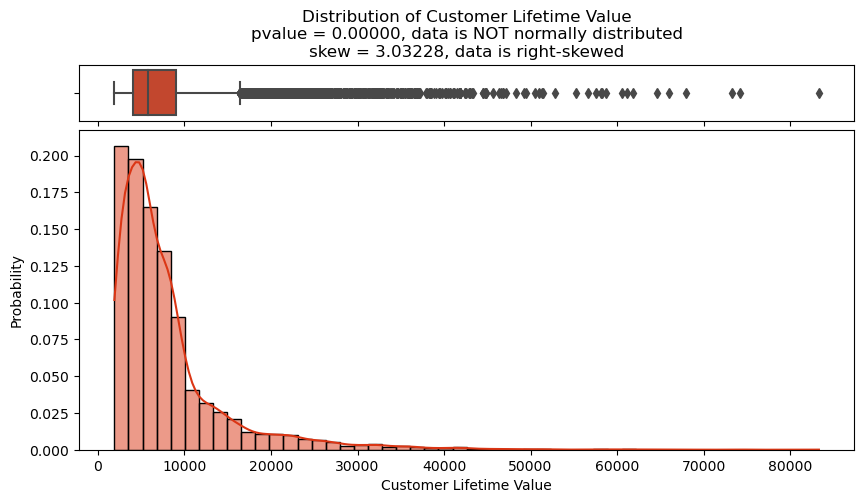

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


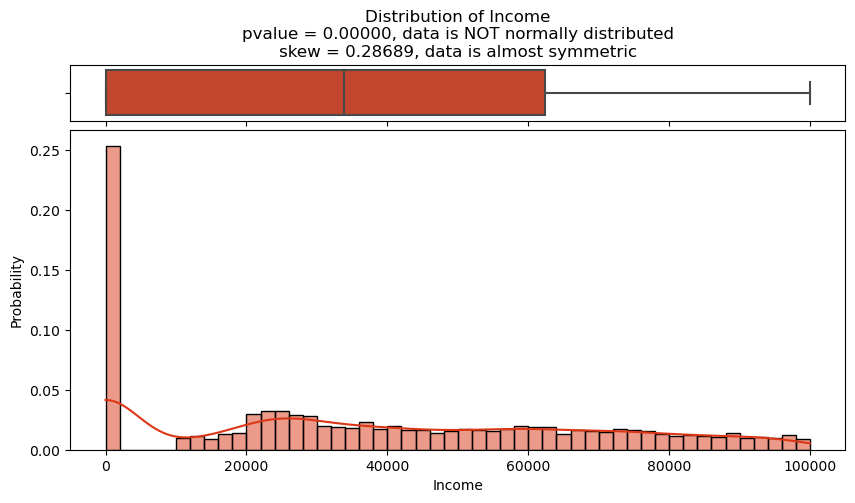

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


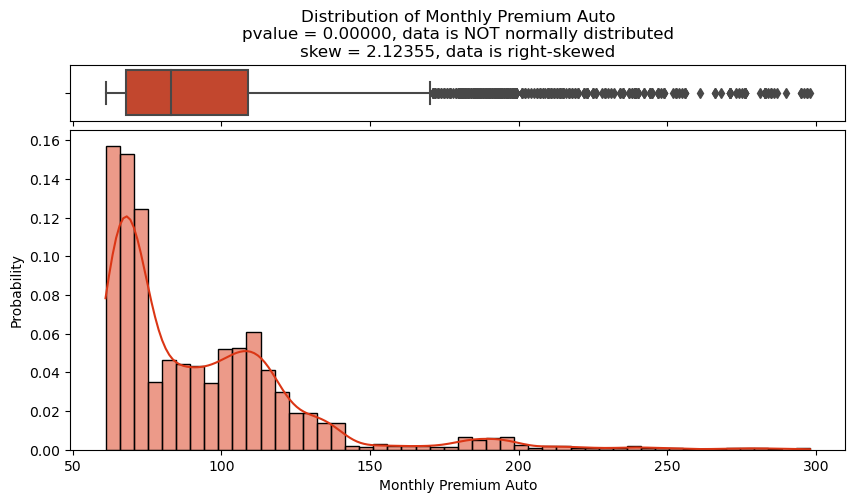

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


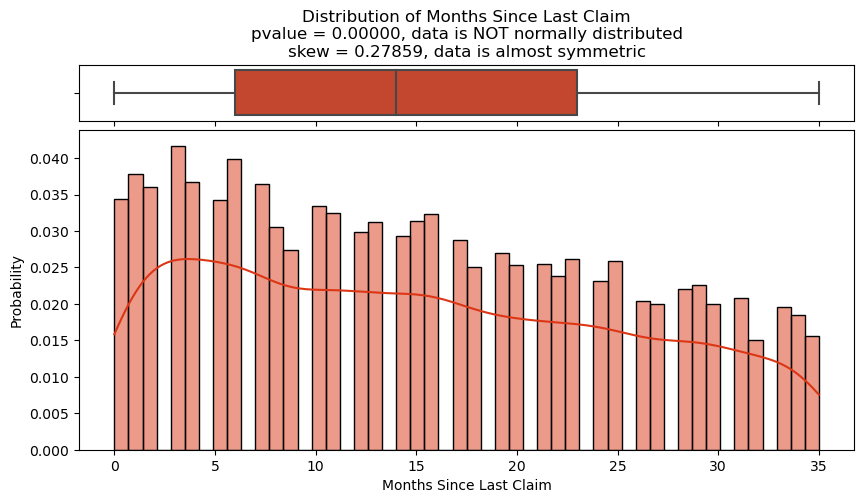

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


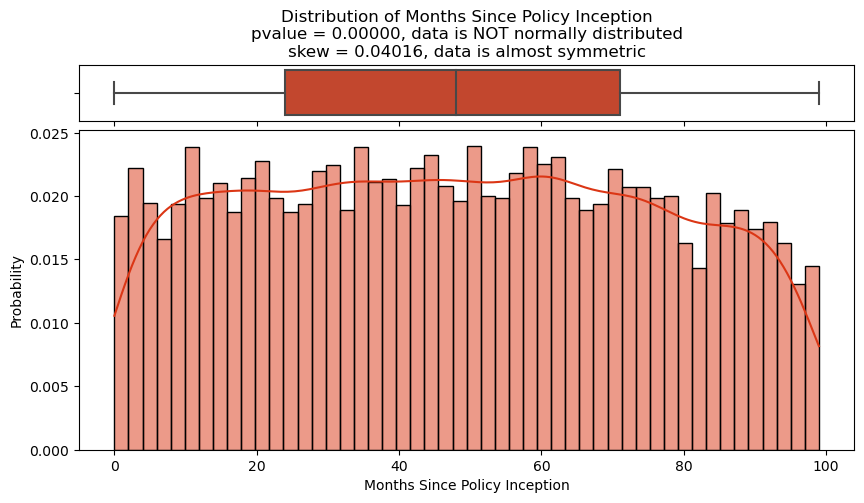

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


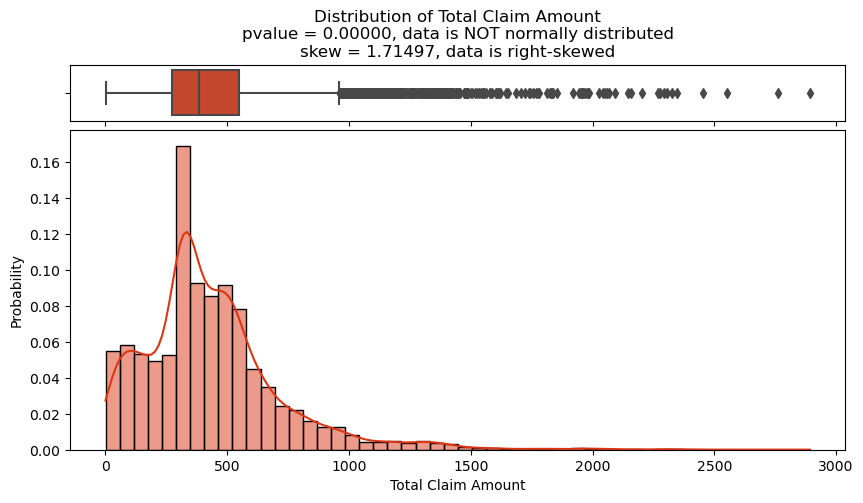

In [462]:
for column in num_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10,5), gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

    stat, pvalue = normaltest(df[column].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data is normally distributed'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data is NOT normally distributed'

    skew = df[column].skew()

    if skew < -0.5:
        skewness = f'skew = {skew:.5f}, data is left-skewed'
    elif skew > 0.5:
        skewness = f'skew = {skew:.5f}, data is right-skewed'
    else:
        skewness = f'skew = {skew:.5f}, data is almost symmetric'

    ax1.set_title(f"Distribution of {column}\n{distribusi}\n{skewness}", color = 'black')
    sns.boxplot(x = df[column], ax = ax1, color = '#DB3615')
    ax1.set(xlabel = "")

    sns.histplot(data = df[column], ax = ax2, stat = "probability", kde=True, bins=50, color = '#DB3615')

    plt.show()

Skewness: The right-skewed distribution suggests that a few high-value customers are driving much of the revenue.
The presence of outliers might skew the model predictions if not handled properly. 
Model Selection: Given the non-normal distribution, models that don’t assume normality (like decision trees, random forests, or gradient boosting machines) might perform better than linear models unless transform the data.

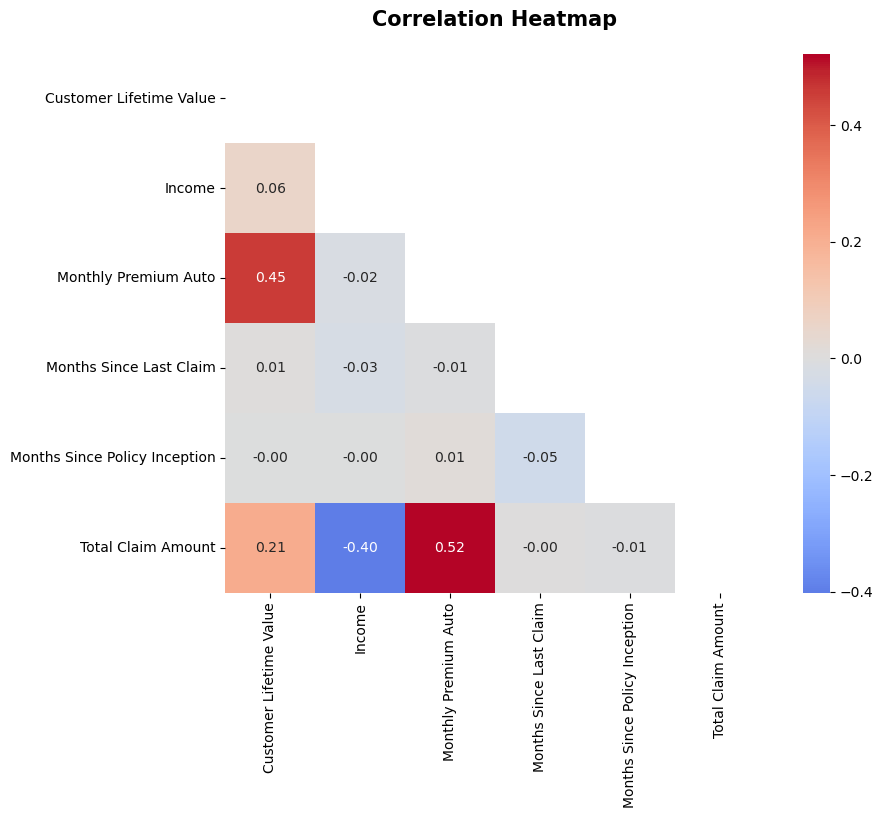

In [463]:
# Compute the correlation matrix for the selected numerical features
num_corr = df[num_features].corr(method='spearman')

# Create a mask to display only the upper triangle of the heatmap
matrix = np.triu(num_corr)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, mask=matrix, square=True)
plt.title('Correlation Heatmap', size=15, pad=20, weight='bold')
plt.show()

1. Customer Lifetime Value (CLV) Correlation:

- Monthly Premium Auto: Shows a moderate positive correlation with CLV (0.45). This suggests that customers who pay higher monthly premiums tend to have a higher lifetime value. This relationship makes intuitive sense as higher premiums could be associated with more comprehensive coverage, leading to higher overall value.
- Total Claim Amount: Shows a weaker positive correlation with CLV (0.21). Customers with higher lifetime value may have higher claim amounts, possibly due to holding more comprehensive policies or having more claims over time.

2. Total Claim Amount Correlation:

- Monthly Premium Auto: Displays a moderate positive correlation with Total Claim Amount (0.52). This could indicate that customers with higher premiums also tend to have higher claims, which could reflect either more comprehensive coverage or a higher propensity to file claims.
- Income: Shows a moderate negative correlation with Total Claim Amount (-0.40). This might suggest that customers with higher incomes are either filing fewer claims or their claim amounts are lower. This could be due to lower risk behaviors or better maintenance of insured assets.

3. Other Features:
- Income and CLV: Only a very weak positive correlation (0.06) exists between income and CLV. This suggests that income may not be a strong predictor of lifetime value in your dataset.
- Months Since Last Claim and Months Since Policy Inception: Both of these features show negligible correlations with CLV and other features, indicating they may not be significant predictors in your model.

 ---
 Now, let's examine the relationship between each feature and the target (CLV).

In [464]:
cat_features = list(df.describe(include='object'))
cat_features

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Employment Status',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Policy Level']

In [465]:
# Remove 'Customer' and 'State' columns
cat_features.remove('Customer')
cat_features.remove('State')
cat_features.remove('Effective To Date')

# Check the updated list
cat_features

['Response',
 'Coverage',
 'Education',
 'Employment Status',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Policy Level']

In [466]:
num_features = list(df.describe().columns)
num_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

In [467]:
# Define numerical columns
num_features = list(df.describe().columns)
del num_features[0]
num_features

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

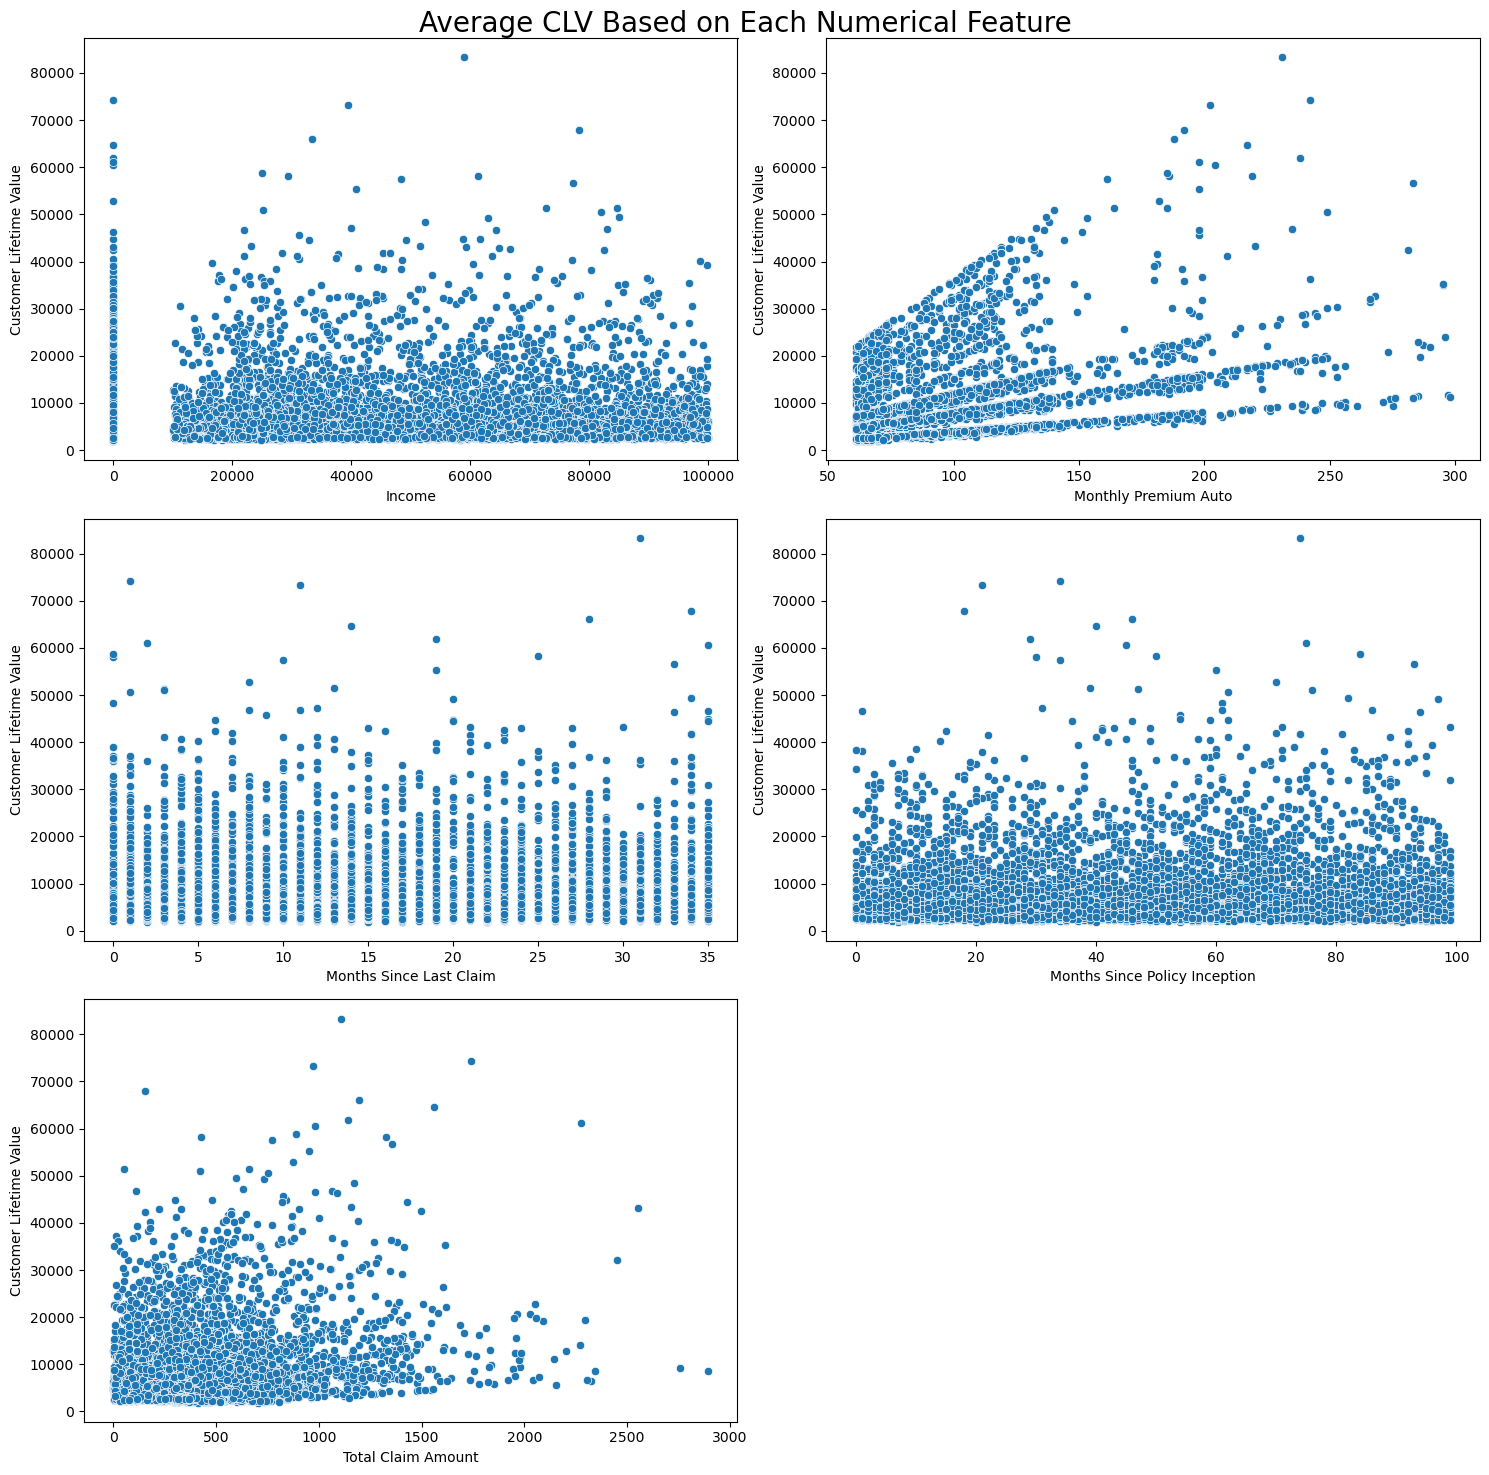

In [468]:
n_features = len(num_features)

# Calculate the number of rows and columns needed
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  # rounds up to the nearest integer

# Create the figure
plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Average CLV Based on Each Numerical Feature', size=20)

plot_number = 1
for i in num_features:
    plt.subplot(n_rows, n_cols, plot_number)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.tight_layout()
    plot_number += 1

plt.show()

1. Income vs. Customer Lifetime Value:
There doesn't seem to be a strong linear relationship between income and CLV. The CLV is spread out across different income levels, but there is a concentration of lower CLV values at the lower income levels.

2. Monthly Premium Auto vs. Customer Lifetime Value:
There's a noticeable positive correlation between Monthly Premium Auto and CLV. Higher premium values tend to be associated with higher CLV, which suggests that customers who pay higher premiums may generate more lifetime value.

3. Months Since Last Claim vs. Customer Lifetime Value:
The CLV values are scattered across different periods since the last claim. There is no clear trend, which suggests that the time since the last claim may not have a straightforward relationship with CLV.

4. Months Since Policy Inception vs. Customer Lifetime Value:
There seems to be a slight downward trend in CLV as the months since policy inception increase. This could indicate that customers who have been with the company for a longer time might generate lower CLV, though the trend is not very strong.

5. Number of Open Complaints vs. Customer Lifetime Value:
The number of open complaints does not show a clear relationship with CLV. Most data points are concentrated where the number of open complaints is low (0 or 1), and the CLV is spread across these values.

6. Total Claim Amount vs. Customer Lifetime Value:
There appears to be a somewhat positive relationship between the total claim amount and CLV, although the relationship isn't very strong. Higher total claim amounts might be associated with higher CLV, but the variation is considerable.

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1039180926.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1039180926.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1039180926.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1039180926.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1039180926.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

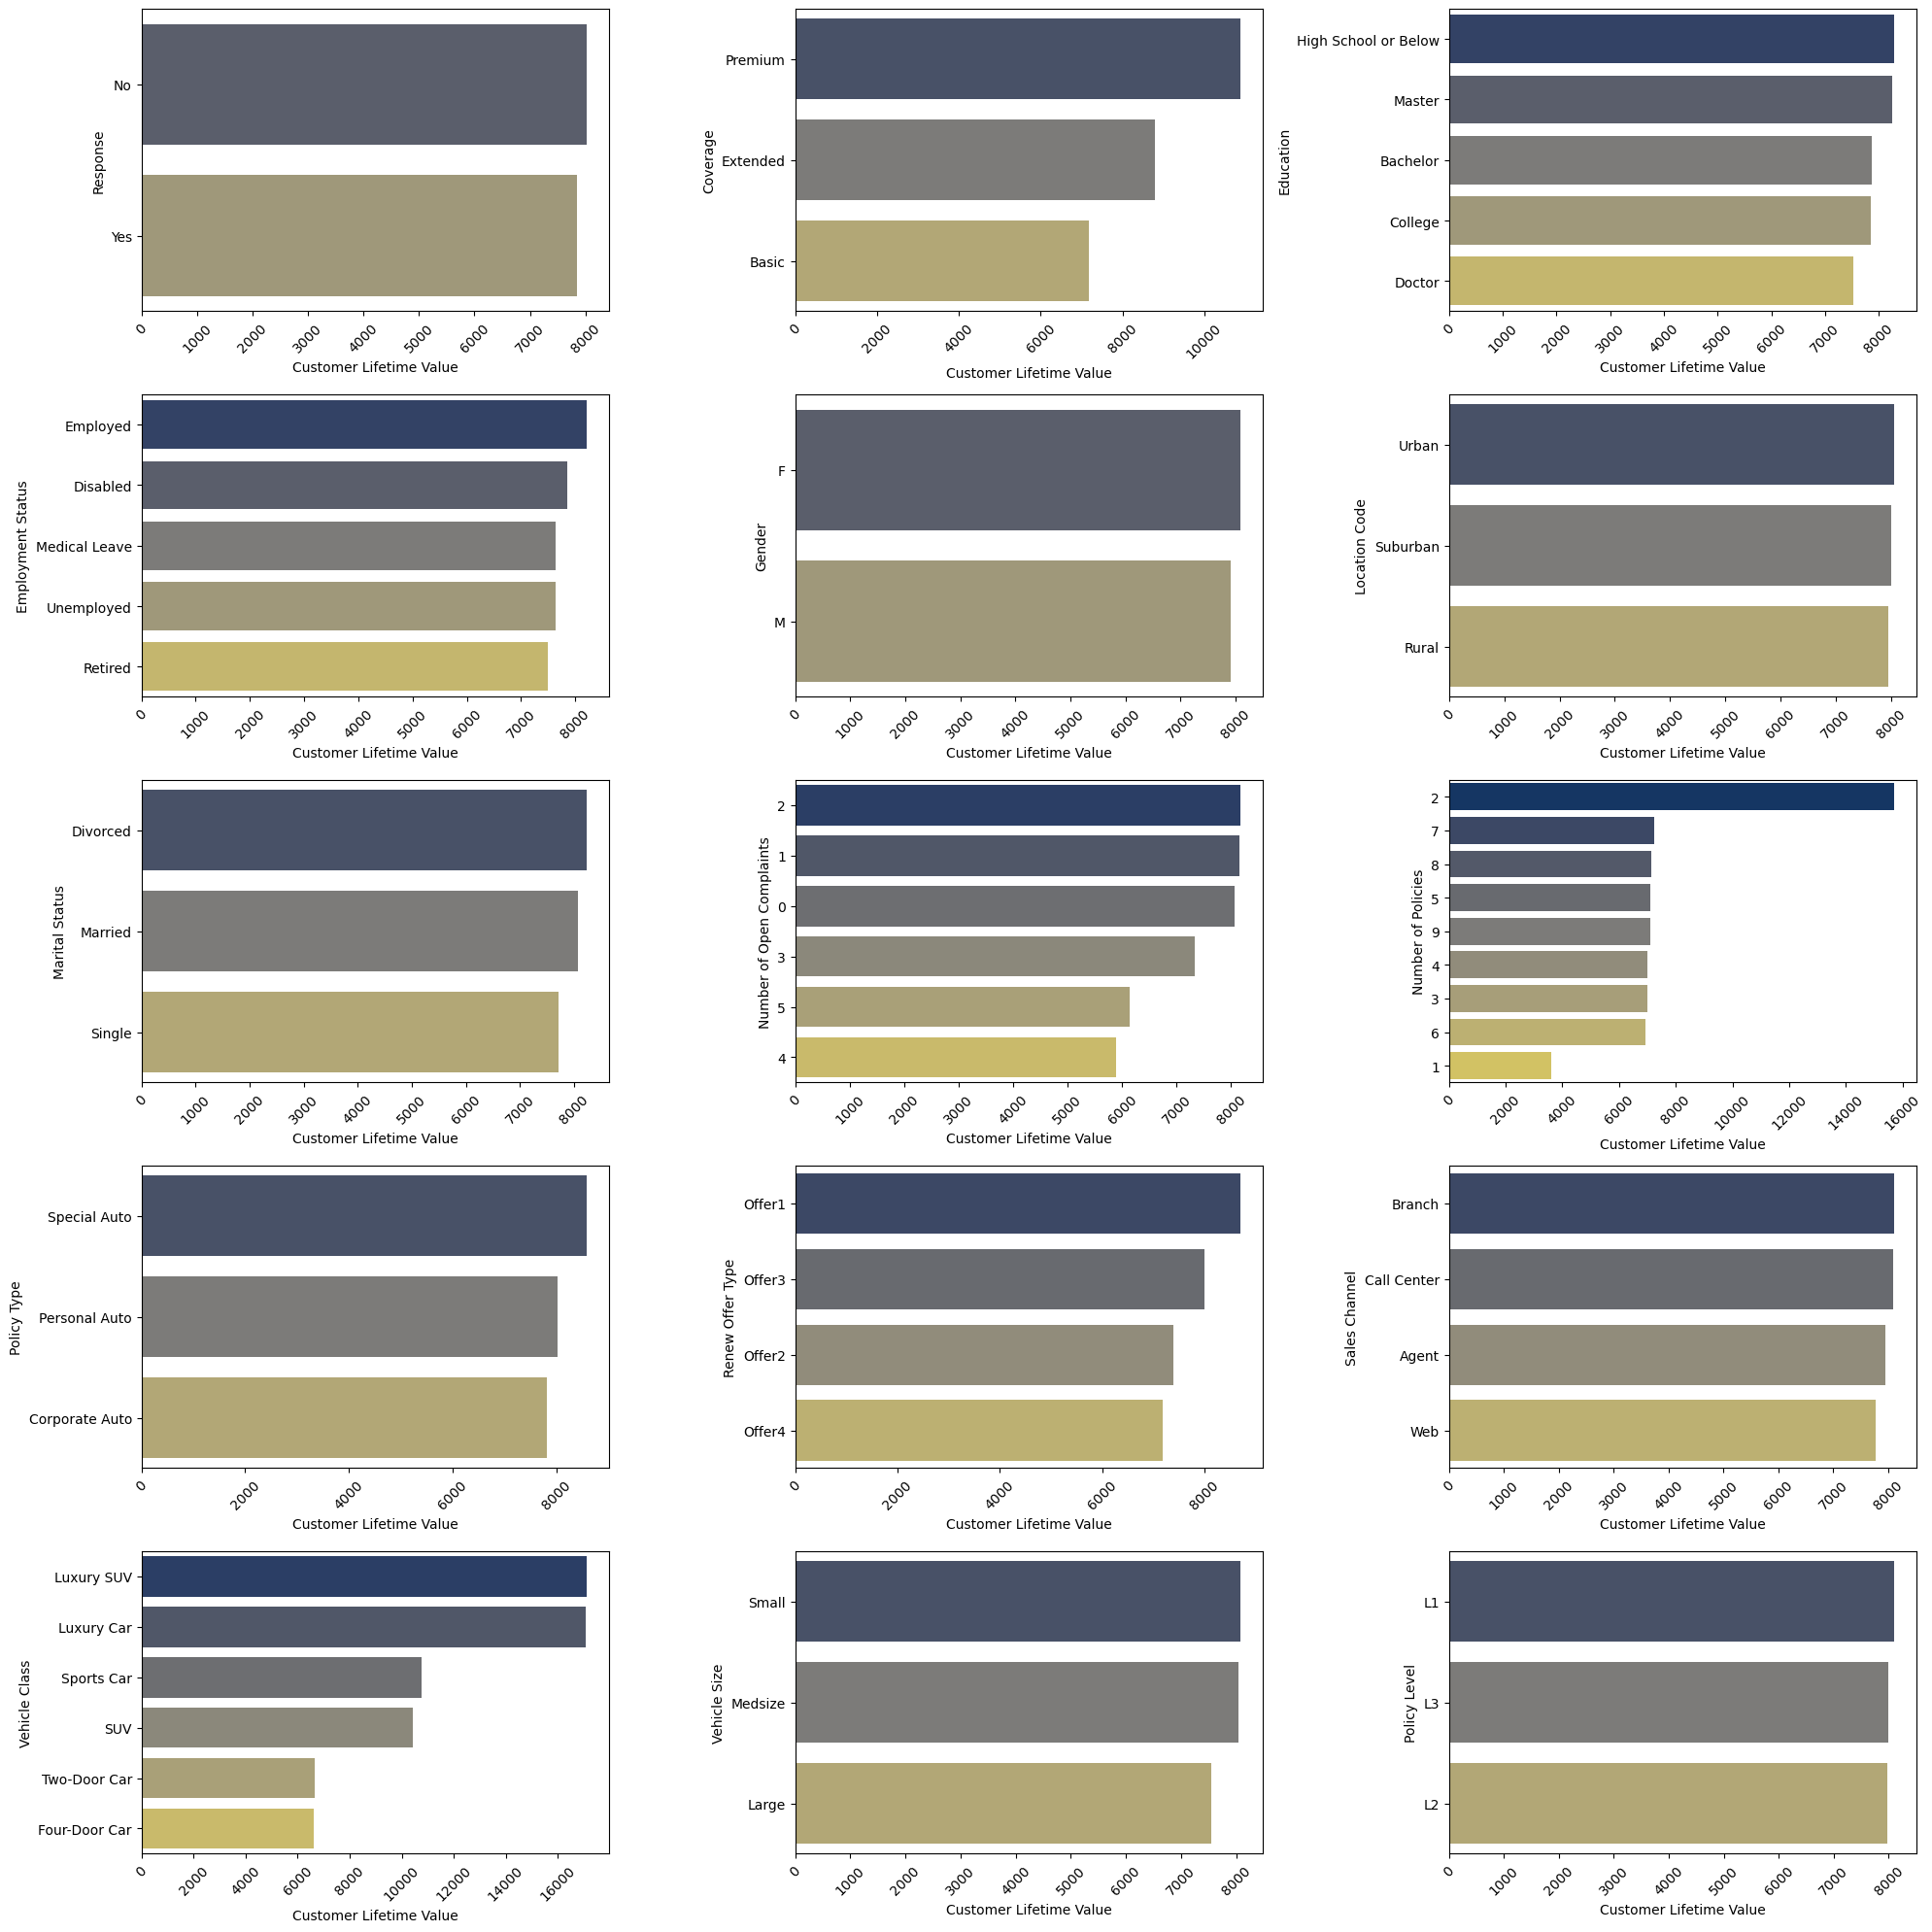

In [544]:
# Create subplots with enough space for all features
rows = round(len(cat_features) / 3) if len(cat_features) % 3 == 0 else round(len(cat_features) / 3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(20, 20))

# Loop through the axes and plot the bar graphs
for i, ax in enumerate(fig.axes):
    if i < len(cat_features):
        # Calculate the mean Customer Lifetime Value for each category
        order = df.groupby(cat_features[i])['Customer Lifetime Value'].mean().sort_values(ascending=False).index

        # Create the bar plot
        sns.barplot(
            data=df,
            y=cat_features[i],
            x='Customer Lifetime Value',
            ax=ax,
            palette='cividis',
            errorbar=None,
            orient='h',
            estimator='mean',
            order=order
        )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any unused axes
for i in range(len(cat_features), rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout()
plt.show()

1. Response:
Customers who responded ("Yes") have a slightly higher average CLV compared to those who did not respond ("No").

2. Coverage:
Premium coverage customers have the highest average CLV, followed by Extended, and then Basic coverage customers, indicating that more comprehensive coverage plans are associated with higher customer value.

3. Education:
Customers with a Master’s degree tend to have the highest average CLV, followed by Doctorate, Bachelor, High School, and College levels. This suggests that higher education levels might be linked to higher CLV.

4. Employment Status:
Employed customers have the highest average CLV, followed closely by those on Medical Leave and Disabled. Unemployed customers have the lowest CLV.

5. Gender:
The average CLV is almost the same between male and female customers.

6. Location Code:
Urban customers have the highest average CLV, followed by Rural and Suburban. This indicates that location might play a role in determining customer value.

7. Marital Status:
Married customers have the highest average CLV, while single customers have the lowest.

8. Number of Open Complaints:
Customers with no complaints have the highest average CLV. The CLV decreases as the number of open complaints increases, which could indicate that customers with complaints tend to have lower loyalty or satisfaction.

9. Number of Policies:
Customers with one policy have the highest average CLV, and the CLV decreases as the number of policies increases. This might suggest that customers with fewer policies have a higher individual value.

10. Policy Type:
Special Auto policyholders have the highest average CLV, though this group is likely smaller in number. Personal Auto policyholders follow, with Corporate Auto policyholders having the lowest average CLV.

11. Renew Offer Type:
Offer 1 has the highest average CLV, followed by Offers 3, 2, and 4. This suggests that the type of renewal offer could impact customer value.

12. Sales Channel:
Customers who purchased policies through a call center have the highest average CLV, followed by agents, the web, and branches.

13. Vehicle Class:
Luxury SUVs and Luxury Cars have the highest average CLV, suggesting that customers with high-end vehicles tend to generate more value.

14. Vehicle Size:
Medium-sized vehicle owners have the highest average CLV, followed by small and large vehicle owners.

15. Policy Level:
Customers with L3 policies have the highest average CLV, followed by L2 and L1. This might indicate that higher-level policies are associated with higher customer value.

From the scatterplot and barplot above, we can see that the features most likely to influence CLV are Number of Policies, Monthly Premium Auto, and Coverage. We will verify this later using feature importance tests.

### **Handling Outliers**

In [543]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in num_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Column' : num_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

Column         Lower          Upper  # Lower  \
0        Customer Lifetime Value  -3457.621076   16414.039912        0   
1                         Income -93480.000000  155800.000000        0   
2           Monthly Premium Auto      6.500000     170.500000        0   
3        Months Since Last Claim    -19.500000      48.500000        0   
4  Months Since Policy Inception    -46.500000     141.500000        0   
5             Total Claim Amount   -140.626647     960.399730        0   

   # Inside  # Upper  % Outlier  
0      8317      817       8.94  
1      9134        0       0.00  
2      8704      430       4.71  
3      9134        0       0.00  
4      9134        0       0.00  
5      8681      453       4.96

Interpretation of Results:

1. Customer Lifetime Value:
Lower Bound: -3457.62 (no data points below this value).
Upper Bound: 16414.04
Outliers: 8.94% of the data points are above the upper bound, indicating that there are a significant number of high CLV values that could be considered outliers.

2. Income:
Lower Bound: -93480.00 (not applicable since income cannot be negative).
Upper Bound: 155800.00
Outliers: 0% (no outliers detected, which is expected since most income values likely fall within a reasonable range).

3. Monthly Premium Auto:
Lower Bound: 6.50
Upper Bound: 170.50
Outliers: 4.71% of the data points are above the upper bound. This suggests that there are some high premium values that might need further investigation.

4. Months Since Last Claim:
Lower Bound: -19.50 (not applicable as time cannot be negative).
Upper Bound: 48.50
Outliers: 0% (no outliers detected, indicating that this feature is well-behaved in terms of outliers).

5. Months Since Policy Inception:
Lower Bound: -46.50 (not applicable as time cannot be negative).
Upper Bound: 141.50
Outliers: 0% (no outliers detected, suggesting this feature is consistent).

6. Total Claim Amount:
Lower Bound: -140.63 (not applicable as claim amounts cannot be negative).
Upper Bound: 960.40
Outliers: 4.96% of the data points are above the upper bound, indicating some high claim amounts that might be worth examining.

We will remove the outliers. We do them by calculating how many data points fall outside the IQR-based outlier boundaries for each numerical feature. IQR-based method is often chosen because of its balance between simplicity, robustness, and broad applicability across different types of data.

The calculation of the IQR and the outlier boundaries (1.5 times the IQR above the 75th percentile and below the 25th percentile) is straightforward and easy to interpret. This simplicity makes it accessible to a wide audience, including those who may not be familiar with more complex statistical methods.

Outliers are dropped for several reasons:
1. Improves Model Accuracy: Outliers can distort model predictions, leading to inaccurate results. Removing them helps the model better fit the majority of the data.
2. Avoids Data Errors: Outliers might be due to data entry errors or rare, non-representative events. Excluding them ensures the model isn't misled by these anomalies.
3. Enhances Interpretability: A model without outliers is easier to interpret and provides clearer insights, focusing on typical customer behavior rather than extreme cases.
4. Prevents Overfitting: Outliers can cause the model to overfit the training data, reducing its ability to generalize to new data. Removing them leads to a more robust model.
5. Aligns with Business Goals: In insurance, the focus is usually on the majority of customers. Removing outliers helps in making strategic decisions that are relevant to the broader customer base.

This approach ensures the model is accurate, reliable, and aligned with business objectives.

In [550]:
# Initial data count
df.shape[0]

9134

Let's remove the data with *Monthly Premium Auto* above 171.

In [551]:
# drop outliers Monthly Premium Auto
df = df[~(df['Monthly Premium Auto'] > 171)]
df.shape[0]

8709

It turns out there are 425 outlier records in the 'Monthly Premium Auto' column that have been removed. Now, let's remove the data with a 'Total Claim Amount' above 961.

In [552]:
# drop outliers Total Claim Amount
df = df[~(df['Total Claim Amount'] > 961)]
df.shape[0]

8495

It turns out there are 214 outlier records in the 'Total Claim Amount' column that have been removed. Now, let's remove the data with 'Customer Lifetime Value' above 16415.

In [553]:
# drop outliers Customer Lifetime Value
df = df[~(df['Customer Lifetime Value'] > 16415)]
df.shape[0]

7850

It turns out there are 645 outlier entries in the 'Customer Lifetime Value' column that have been removed.

So, the total number of outliers we were removed is a total of 1,284 data points across the three features.

### **3. Data Preprocessing**

At the beginning of the data preprocessing stage, let's define X (features) and y (target) from this dataset. The goal of this project is to predict the Customer Lifetime Value based on the available features (features = all columns except the 'Customer Lifetime Value' column, target = 'Customer Lifetime Value' column).

In [476]:
X = df.drop(columns=['Customer Lifetime Value', 'Customer', 'State', 'Effective To Date'])
y = df['Customer Lifetime Value']

In [477]:
X.shape

(7850, 20)

In [478]:
X.head()

Response Coverage Education Employment Status Gender  Income Location Code  \
0       No    Basic  Bachelor          Employed      F   56274      Suburban   
2       No  Premium  Bachelor          Employed      F   48767      Suburban   
3       No    Basic  Bachelor        Unemployed      M       0      Suburban   
4       No    Basic  Bachelor          Employed      M   43836         Rural   
5      Yes    Basic  Bachelor          Employed      F   62902         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   

   Months Since Policy Inception Number of Open Complaints Number of Policies  \
0                              5                         0                  1   
2                             38                         0                  2   
3                             65                         0                  7   
4                             44                         0                  1   
5                             94                         0                  2   

      Policy Type Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate Auto           Offer1         Agent          384.811147   
2   Personal Auto           Offer1         Agent          566.472247   
3  Corporate Auto           Offer1   Call Center          529.881344   
4   Personal Auto           Offer1         Agent          138.130879   
5   Personal Auto           Offer2           Web          159.383042   

   Vehicle Class Vehicle Size Policy Level  
0   Two-Door Car      Medsize           L3  
2   Two-Door Car      Medsize           L3  
3            SUV      Medsize           L2  
4  Four-Door Car      Medsize           L1  
5   Two-Door Car      Medsize           L3

Next, let's split our data into training and testing sets. Here, I am using a train-to-test ratio of 80:20 with random_state = 0.

I am not using the 'stratify' parameter in the data splitting because our target (the 'Customer Lifetime Value' column) is a numerical continuous variable.

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [480]:
display(X_train, X_test, y_train, y_test)

Response  Coverage             Education Employment Status Gender  \
822        No  Extended              Bachelor        Unemployed      M   
4352       No     Basic  High School or Below          Employed      F   
2478       No     Basic  High School or Below        Unemployed      F   
1235       No   Premium  High School or Below          Employed      F   
511        No  Extended              Bachelor     Medical Leave      M   
...       ...       ...                   ...               ...    ...   
5735       No     Basic               College          Employed      F   
3779       No     Basic              Bachelor     Medical Leave      M   
1917       No     Basic               College          Employed      M   
3016       No     Basic  High School or Below          Employed      M   
3163       No     Basic  High School or Below          Employed      M   

      Income Location Code Marital Status  Monthly Premium Auto  \
822        0      Suburban         Single                    80   
4352   74561         Urban        Married                    68   
2478       0      Suburban         Single                    74   
1235   88706      Suburban        Married                   110   
511    17269      Suburban        Married                   139   
...      ...           ...            ...                   ...   
5735   25915      Suburban         Single                    64   
3779   29152         Urban       Divorced                    67   
1917   67197         Rural         Single                   111   
3016   75329         Rural        Married                    67   
3163   37595      Suburban        Married                    70   

      Months Since Last Claim  Months Since Policy Inception  \
822                         9                             69   
4352                        0                             23   
2478                       24                             98   
1235                       14                             72   
511                         3                             31   
...                       ...                            ...   
5735                       13                             62   
3779                       24                             72   
1917                        2                              9   
3016                       15                             17   
3163                        2                             22   

     Number of Open Complaints Number of Policies     Policy Type  \
822                          0                  7   Personal Auto   
4352                         1                  5   Personal Auto   
2478                         0                  5   Personal Auto   
1235                         1                  2  Corporate Auto   
511                          0                  5   Personal Auto   
...                        ...                ...             ...   
5735                         0                  7  Corporate Auto   
3779                         0                  1   Personal Auto   
1917                         0                  2    Special Auto   
3016                         0                  1  Corporate Auto   
3163                         0                  9   Personal Auto   

     Renew Offer Type Sales Channel  Total Claim Amount  Vehicle Class  \
822            Offer3         Agent          576.000000  Four-Door Car   
4352           Offer3           Web          234.393625   Two-Door Car   
2478           Offer2         Agent          588.936956   Two-Door Car   
1235           Offer3        Branch          528.000000   Two-Door Car   
511            Offer1        Branch          667.200000            SUV   
...               ...           ...                 ...            ...   
5735           Offer1         Agent          317.979988   Two-Door Car   
3779           Offer4         Agent          255.079807   Two-Door Car   
1917           Offer1         Agent          14

Response  Coverage             Education Employment Status Gender  \
5940       No     Basic               College          Employed      F   
7959       No  Extended               College          Employed      F   
8116       No     Basic               College          Employed      F   
621        No     Basic  High School or Below          Employed      M   
8342       No     Basic               College          Employed      F   
...       ...       ...                   ...               ...    ...   
7865       No     Basic               College        Unemployed      M   
4922      Yes     Basic              Bachelor          Disabled      F   
348        No  Extended              Bachelor          Employed      F   
3841       No     Basic              Bachelor          Employed      M   
4390       No  Extended  High School or Below          Employed      F   

      Income Location Code Marital Status  Monthly Premium Auto  \
5940   32437      Suburban        Married                    69   
7959   33255      Suburban        Married                   138   
8116   72462         Urban        Married                    68   
621    67176      Suburban         Single                    72   
8342   39293         Urban        Married                    74   
...      ...           ...            ...                   ...   
7865       0      Suburban         Single                    74   
4922   23815      Suburban        Married                    73   
348    47272         Rural        Married                    79   
3841   31756         Urban        Married                   107   
4390   45302      Suburban       Divorced                   133   

      Months Since Last Claim  Months Since Policy Inception  \
5940                       25                             96   
7959                        0                             20   
8116                        8                             70   
621                        20                             90   
8342                       17                             48   
...                       ...                            ...   
7865                       24                             63   
4922                        4                             47   
348                        17                             17   
3841                        1                             97   
4390                        4                             34   

     Number of Open Complaints Number of Policies     Policy Type  \
5940                         0                  1  Corporate Auto   
7959                         0                  1   Personal Auto   
8116                         0                  2   Personal Auto   
621                          0                  9   Personal Auto   
8342                         0                  6   Personal Auto   
...                        ...                ...             ...   
7865                         0                  2  Corporate Auto   
4922                         0                  2   Personal Auto   
348                          3                  2   Personal Auto   
3841                         0                  3  Corporate Auto   
4390                         0                  2   Personal Auto   

     Renew Offer Type Sales Channel  Total Claim Amount  Vehicle Class  \
5940           Offer4        Branch          331.200000   Two-Door Car   
7959           Offer1        Branch          662.400000     Sports Car   
8116           Offer2   Call Center          272.737308   Two-Door Car   
621            Offer2        Branch          345.600000  Four-Door Car   
8342           Offer2           Web          352.740946   Two-Door Car   
...               ...           ...                 ...            ...   
7865           Offer1         Agent          532.800000   Two-Door Car   
4922           Offer2   Call Center          424.330166  Four-Door Car   
348            Offer1   Call Center           6

822      5272.319663
4352     5427.484591
2478     5158.648497
1235    13372.024260
511     10442.651390
            ...     
5735     4996.564694
3779     2446.911045
1917    13111.113190
3016     2685.425957
3163     5633.949267
Name: Customer Lifetime Value, Length: 6280, dtype: float64

5940     2742.797845
7959     5553.186720
8116    10932.214960
621      5608.316348
8342     5896.536531
            ...     
7865     7756.307652
4922     8257.666512
348      9422.567923
3841     8417.102804
4390    16007.949540
Name: Customer Lifetime Value, Length: 1570, dtype: float64

Let's note which columns need to be processed:
- Numerical columns:
    - Scaling
        - Number of Policies
        - Monthly Premium Auto
        - Total Claim Amount
        - Income
        - Months Since Last Claim
        - Months Since Policy Inception
        <br><br>
- Categorical columns:
    - Onehot Encoder
        - Vehicle Class
        - Vehicle Size
        - Renew Offer Type
        - Employment Status
        - Marital Status
        - Response
        - Policy Type
        - Policy Level
        - Sales Channel
        <br><br>
    - Ordinal Encoder
        - Coverage
        - Education
        - Number of Open Complaints
        - Number of Policies

The 'Coverage', 'Education', 'Number of Open Complaints', and 'Number of Policies' columns will be encoded using the ordinal method because both columns have an 'order' or 'ranking'.

In [481]:
# Creating ordinal mapping for the 'Coverage', 'Education', 'Number of Open Complaints', and 'Number of Poicies' columns
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}},
    {'col': 'Number of Open Complaints', 'mapping': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, None:0}},
    {'col': 'Number of Policies', 'mapping': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, None:0}}
]

In [482]:
# transformer 

pipe_iterative_standard = Pipeline([
    ('iterative_imputer', IterativeImputer(random_state=0)),
    ('scaler', StandardScaler())
])

pipe_ordinal_standard = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(cols=['Coverage', 'Education', 'Number of Open Complaints', 'Number of Policies'], mapping=ordinal_mapping)),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
    ('pipe_iterative_standard', pipe_iterative_standard, ['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception']),
    ('onehot_encoder', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Response', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy Level', 'Sales Channel', 'Vehicle Size']),
    ('ordinal_encoder', pipe_ordinal_standard, ['Coverage', 'Education', 'Number of Open Complaints', 'Number of Policies']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iterative_standard',
                                 Pipeline(steps=[('iterative_imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['Monthly Premium Auto', 'Total Claim Amount',
                                  'Income', 'Months Since Last Claim',
                                  'Months Since Policy Inception']),
                                ('onehot_encoder', OneHotEncoder(drop='first'),
                                 ['Vehicle Class',...
dtype: int64},
                                                                          {'col': 'Number '
                                                                                  'of '
                                                                                  'Open '
                                                                                  'Complaints',
                                                                           'data_type': dtype('float64'),
                                                                           'mapping': 0.0    1
1.0    2
2.0    3
3.0    4
4.0    5
5.0    6
NaN    0
dtype: int64},
                                                                          {'col': 'Number '
                                                                                  'of '
                                                                                  'Policies',
                                                                           'data_type': dtype('float64'),
                                                                           'mapping': 1.0    1
2.0    2
3.0    3
4.0    4
5.0    5
6.0    6
7.0    7
8.0    8
9.0    9
NaN    0
dtype: int64}])),
                                                 ('scaler', StandardScaler())]),
                                 ['Coverage', 'Education',
                                  'Number of Open Complaints',
                                  'Number of Policies'])])

All numerical features will go through the processes of *iterative imputer* and *standard scaling*.

The 'Coverage', 'Education', 'Number of Open Complaints', and 'Number of Policies' features have orders/rankings (categorical ordinal), so these features will go through ordinal encoding and standard scaling.

The rest of the features will go through one-hot encoding because they do not have orders (categorical nominal).


### **Clustering**

In [483]:
df_copy = df.drop(columns=['Customer Lifetime Value','Customer', 'State', 'Effective To Date'])

In [484]:
# Fit the transformer to the data
transformer.fit(df_copy)

# Transform the data
transformed_data = transformer.transform(df_copy)

# Create a new dataframe with the transformed data
columns = (transformer.named_transformers_['pipe_iterative_standard'].get_feature_names_out().tolist() +
           transformer.named_transformers_['onehot_encoder'].get_feature_names_out().tolist() +
           transformer.named_transformers_['ordinal_encoder'].get_feature_names_out().tolist())

df_transformed = pd.DataFrame(transformed_data, columns=columns)

df_transformed

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Monthly Premium Auto  Total Claim Amount    Income  \
0                -0.779504            0.008709  0.588828   
1                 0.988853            0.896281  0.341562   
2                 0.898168            0.717503 -1.264729   
3                -0.598134           -1.196539  0.179145   
4                -0.779504           -1.092704  0.807142   
...                    ...                 ...       ...   
7845              0.807483            0.773205  0.308426   
7846             -0.326079           -0.018707 -0.553135   
7847             -0.054024            1.992244 -1.264729   
7848              0.444743            1.505685 -0.542034   
7849             -0.416764           -0.065611 -1.264729   

      Months Since Last Claim  Months Since Policy Inception  \
0                    1.697071                      -1.542603   
1                    0.300174                      -0.357751   
2                    0.300174                       0.611672   
3                   -0.298496                      -0.142324   
4                   -0.098939                       1.652905   
...                       ...                            ...   
7845                 0.100617                       0.360340   
7846                -0.098939                      -0.716797   
7847                -0.597831                      -0.393656   
7848                 1.896628                      -1.614412   
7849                -1.196501                       1.509287   

      Vehicle Class_SUV  Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  \
0                   0.0                       0.0                         1.0   
1                   0.0                       0.0                         1.0   
2                   1.0                       0.0                         0.0   
3                   0.0                       0.0                         0.0   
4                   0.0                       0.0                         1.0   
...                 ...                       ...                         ...   
7845                0.0                       0.0                         0.0   
7846                0.0                       0.0                         0.0   
7847                0.0                       0.0                         0.0   
7848                0.0                       0.0                         0.0   
7849                0.0                       0.0                         1.0   

      Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         1.0                      0.0   
...                       ...                      ...   
7845                      0.0                      0.0   
7846                      0.0                      0.0   
7847                      0.0                      0.0   
7848                      0.0                      1.0   
7849                      0.0                      0.0   

      Renew Offer Type_Offer4  Employment Status_Employed  \
0                         0.0                         1.0   
1                         0.0                         1.0   
2                         0.0                         0.0   
3                         0.0                         1.0   
4                         0.0                         1.0   
...                       ...                         ...   
7845                      0.0                         1.0   
7846                      0.0                         1.0   
7847                      0.0                         0.0   
7848                      0.0                         1.0   
7849                      1.0                         0.0   

      Employment Status_Medical Leave  Employment Status_Retired  \
0                                 0.0        

K-Prototypes is an algorithm that combines K-Means and K-Modes to handle mixed data types, meaning datasets with both numerical and categorical features. This algorithm extends the concepts of K-Means (which works with numerical data) and K-Modes (which works with categorical data) to cluster data containing a mixture of these features.

How K-Prototypes Works:

1. Initial Centroid Selection:
- For numerical features, the initial centroids are chosen similarly to K-Means, by calculating the mean of the data points.
- For categorical features, the initial centroids are selected using the mode (the most frequent value) of the data points, as done in K-Modes.

2. Distance Calculation:
- Numerical Features: The distance between a data point and a centroid is calculated using Euclidean distance, just like in K-Means.

Euclidean distance in K-Means is a measure of the distance between two points in an n-dimensional space. It is the most common method used to calculate the distance between a data point and a centroid in the K-Means algorithm.

The formula for Euclidean distance between two points A(x1,y1,z1,…)A(x1​,y1​,z1​,…) and B(x2,y2,z2,…)B(x2​,y2​,z2​,…) in an n-dimensional space is:
d(A,B)=(x2−x1)2+(y2−y1)2+(z2−z1)2+…
d(A,B)=(x2​−x1​)2+(y2​−y1​)2+(z2​−z1​)2+…
​

In the context of K-Means, each data point has coordinates that represent its features, and Euclidean distance is used to determine how close or far a data point is from the centroid (center) of a cluster. K-Means aims to minimize the total Euclidean distance within clusters, effectively grouping the data points into distinct clusters based on their proximity to the centroids.

- Categorical Features: The distance between a data point and a centroid is calculated using Hamming distance, similar to K-Modes.

Hamming distance in K-Mode is a distance measure used to calculate the difference between two categorical data points in the K-Mode algorithm, which is a variation of K-Means designed for categorical data.

Hamming distance counts the number of positions where two categorical vectors differ. In other words, it measures how many attributes are different between two vectors or data points.

For example, if we have two categorical vectors:

    Vector A: ['red', 'sedan', 'manual']
    Vector B: ['blue', 'sedan', 'automatic']

The Hamming distance between these two vectors is 2, because there are two differences: 'red' vs. 'blue' and 'manual' vs. 'automatic'.

In the context of K-Mode, Hamming distance is used to determine how similar or different a data point is from the centroid of a cluster in categorical space. The K-Mode algorithm aims to minimize the total Hamming distance to group the data into distinct clusters.

- The total distance is computed by combining these two types of distances using a cost function that balances the contributions of both feature types. 

For example:
Total Distance=∑(Euclidean Distance for Numerical Features)+γ∑(Hamming Distance for Categorical Features)

Here, γ is a parameter that controls the influence of categorical features on the total distance. This parameter can be manually adjusted or automatically determined.

3. Centroid Update:
- Numerical Features: The centroid for numerical features is updated by calculating the new mean of the data points within the cluster
- Categorical Features: The centroid for categorical features is updated by calculating the new mode of the data points within the cluster.

4. Iteration:
The steps above (distance calculation and centroid update) are repeated until convergence is reached, meaning when the changes in clusters become insignificant.

K-Prototypes is used in a business context to cluster data that includes both numerical and categorical features, which is common in insurance. The primary purpose of using K-Prototypes in this case is to identify patterns and segment customers by grouping similar data points/data with similar characteristics together.

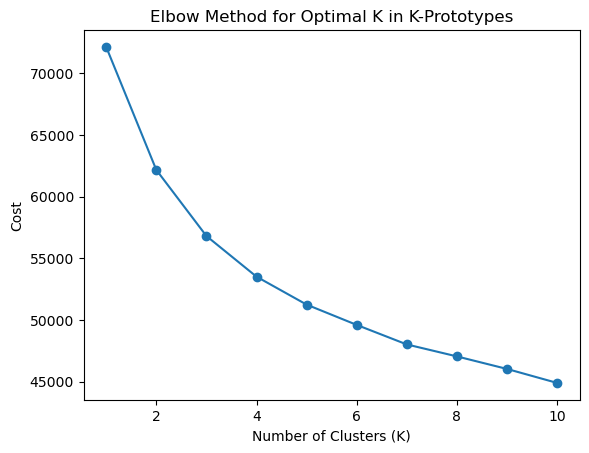

In [486]:
# Assuming df_transformed is your dataset with both numeric and categorical features

costs = []
K_range = range(1, 11)  # Trying K values from 1 to 10

# List of indices for categorical columns
categorical_indices = list(range(5, 36))  # Indices from 5 to 35

for K in K_range:
    kproto = KPrototypes(n_clusters=K, init='Cao', n_init=5, verbose=0)
    kproto.fit_predict(df_transformed, categorical=categorical_indices) 
    costs.append(kproto.cost_)

# Plotting the cost vs K
plt.plot(K_range, costs, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Prototypes')
plt.show()

The "elbow" point on the graph is where the cost starts to decrease at a slower rate. This point represents the optimal number of clusters because it balances between the compactness of the clusters and the simplicity of the model.
In your graph, the elbow seems to occur around K=4. This suggests that choosing a number of clusters within this range may be optimal for your data.

In [487]:
# Create and Fit KPrototypes model
kproto = KPrototypes(n_clusters=4, 
                     max_iter=50, 
                     n_init=30, 
                     init='Cao',
                     verbose=2,
                     random_state=0,
                     n_jobs=-1)

kproto.fit(df_transformed, categorical=categorical_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10


KPrototypes(gamma=0.5, max_iter=50, n_clusters=4, n_init=30, n_jobs=-1,
            random_state=0, verbose=2)

In [488]:
# Assign clusters to our data and create a column in our data frame
clusters = kproto.predict(df_transformed, categorical=categorical_indices)
df_transformed['Cluster'] = clusters

df_transformed['Cluster'].value_counts()

Cluster
0    2146
1    2083
3    1874
2    1747
Name: count, dtype: int64

In [554]:
df['Cluster'] = clusters

df['Cluster'].value_counts()

Cluster
0    2146
1    2083
3    1874
2    1747
Name: count, dtype: int64

In [491]:
cat_features = list(df.describe(include='object'))
cat_features

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Employment Status',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Policy Level']

In [492]:
# Remove 'Customer' and 'State' columns
cat_features.remove('Customer')
cat_features.remove('State')
cat_features.remove('Effective To Date')

# Check the updated list
cat_features

['Response',
 'Coverage',
 'Education',
 'Employment Status',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Policy Level']

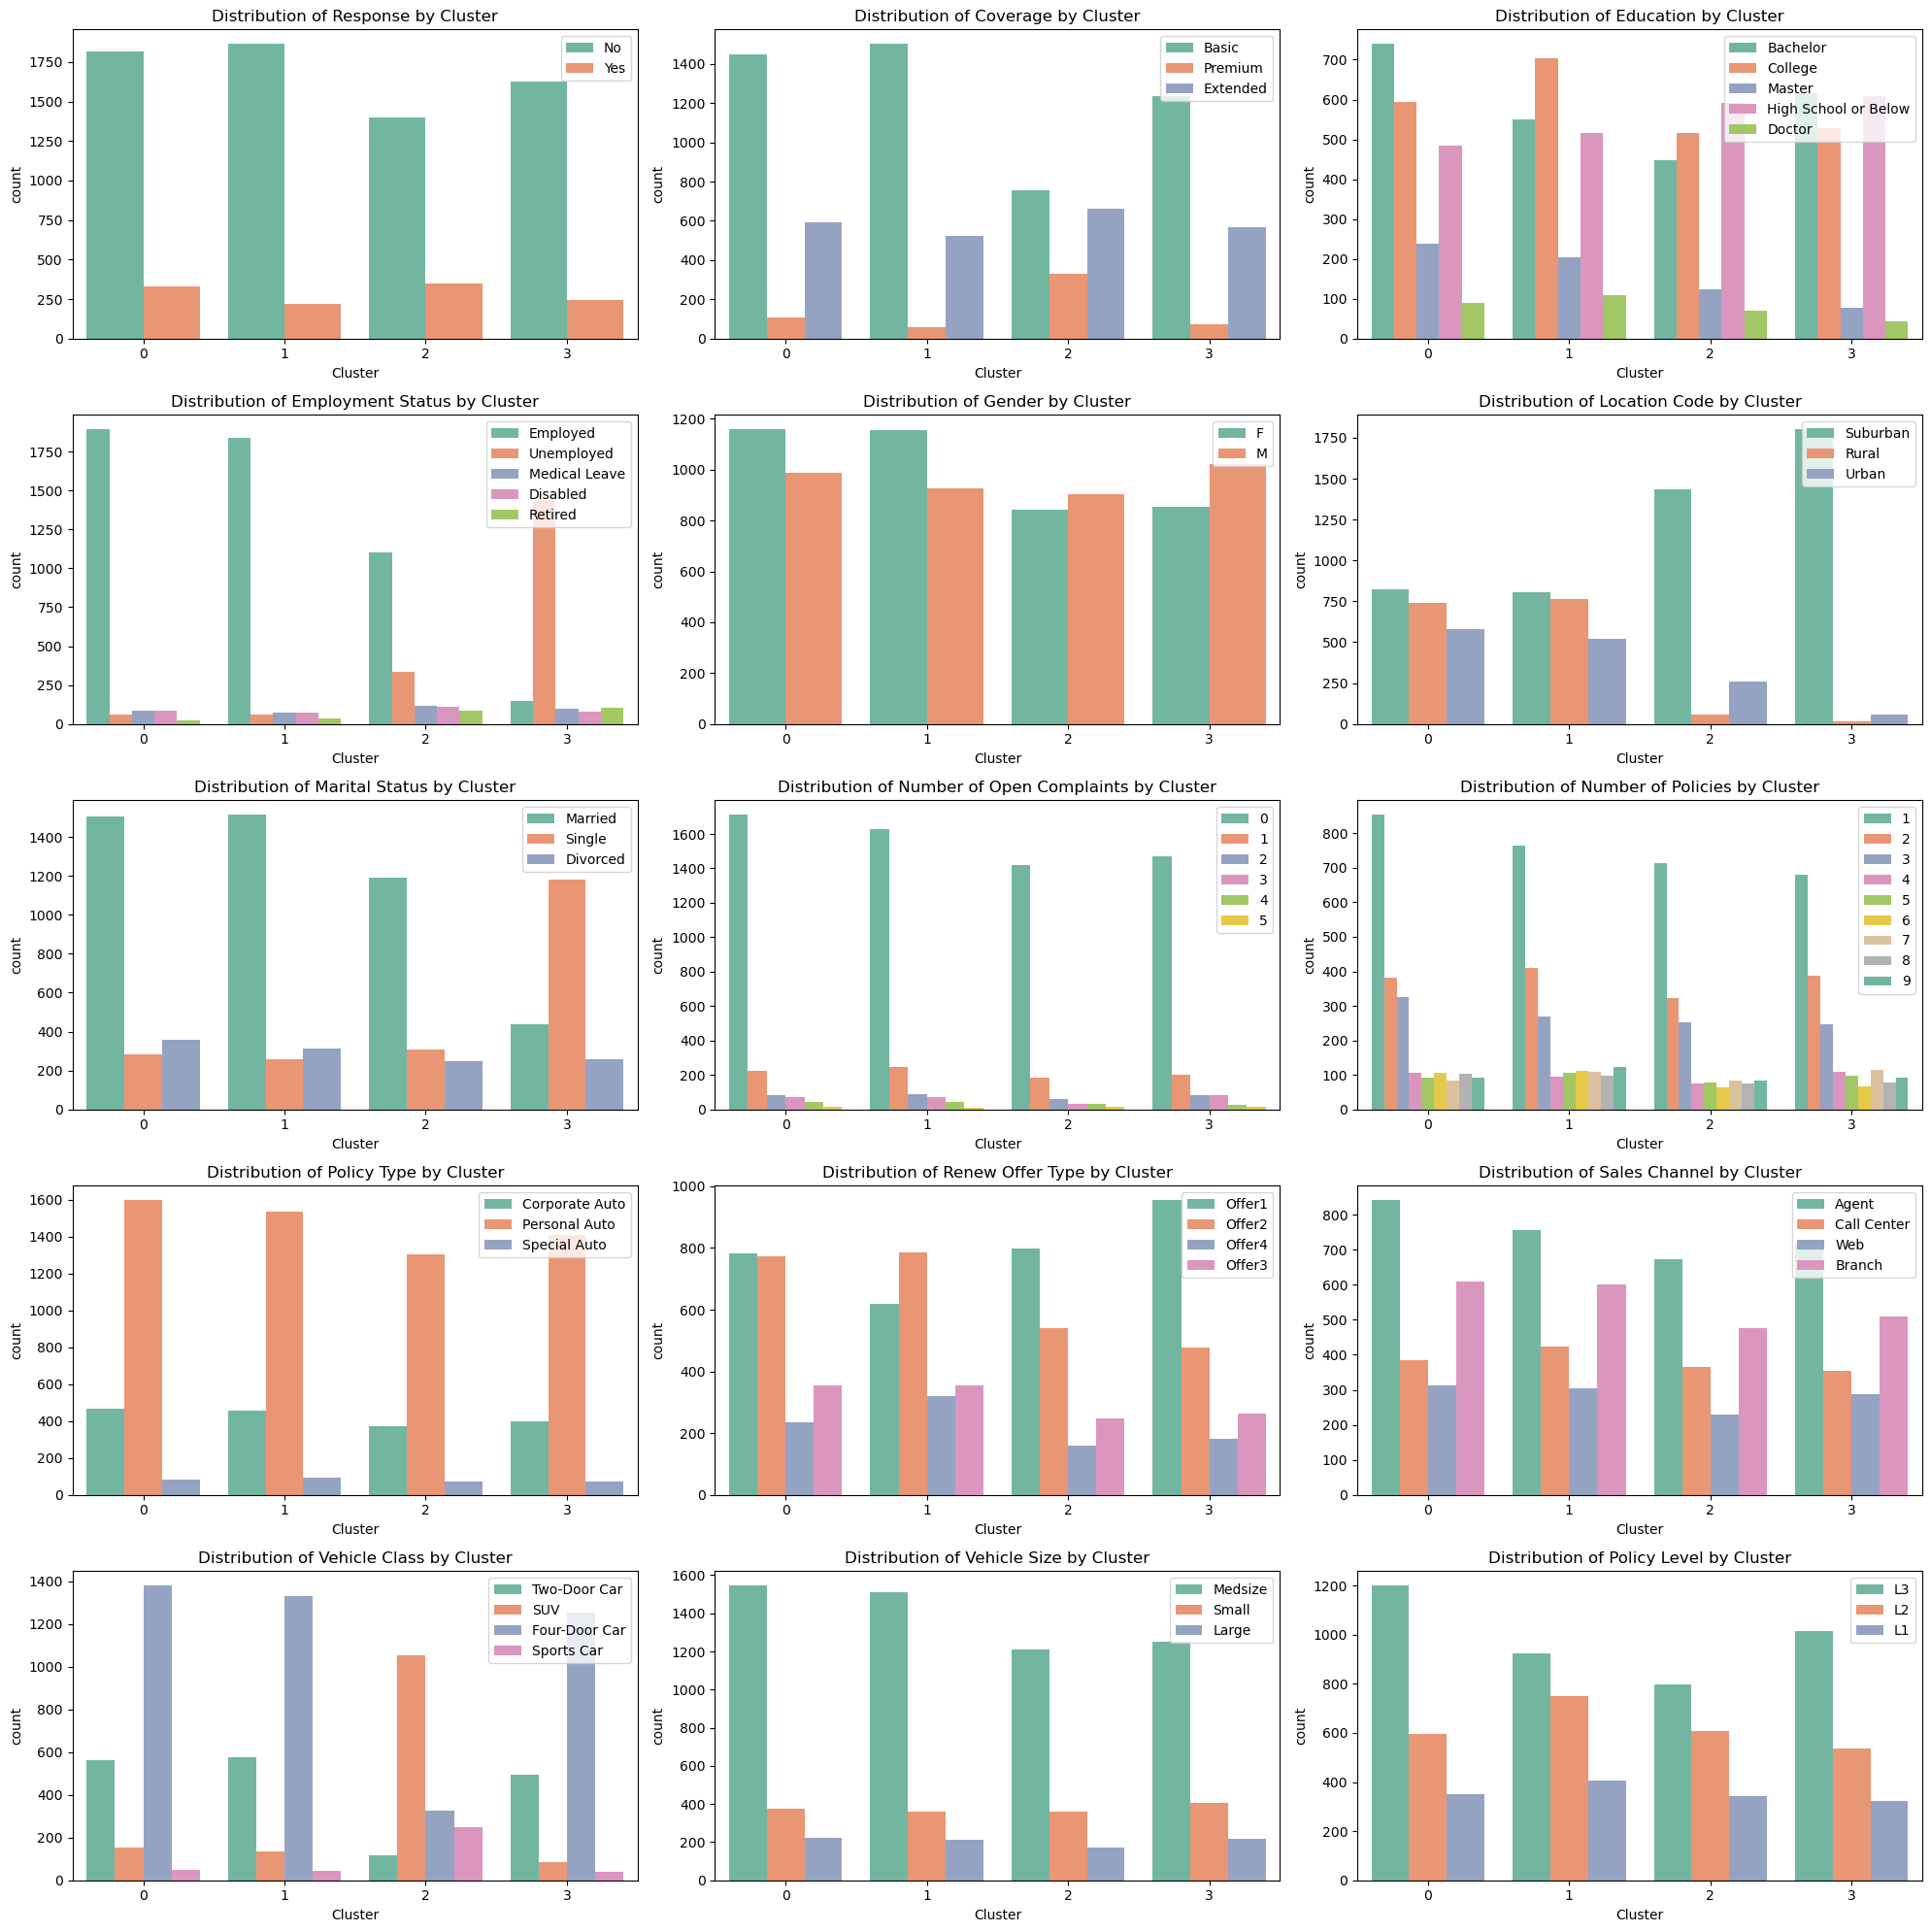

In [494]:
# Set up the figure for subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Iterate over categorical features and plot them
for i, col in enumerate(cat_features):
    sns.countplot(x='Cluster', hue=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Cluster')
    axes[i].legend(loc='upper right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [495]:
num_features = [
    'Customer Lifetime Value',
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Total Claim Amount'
]

num_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

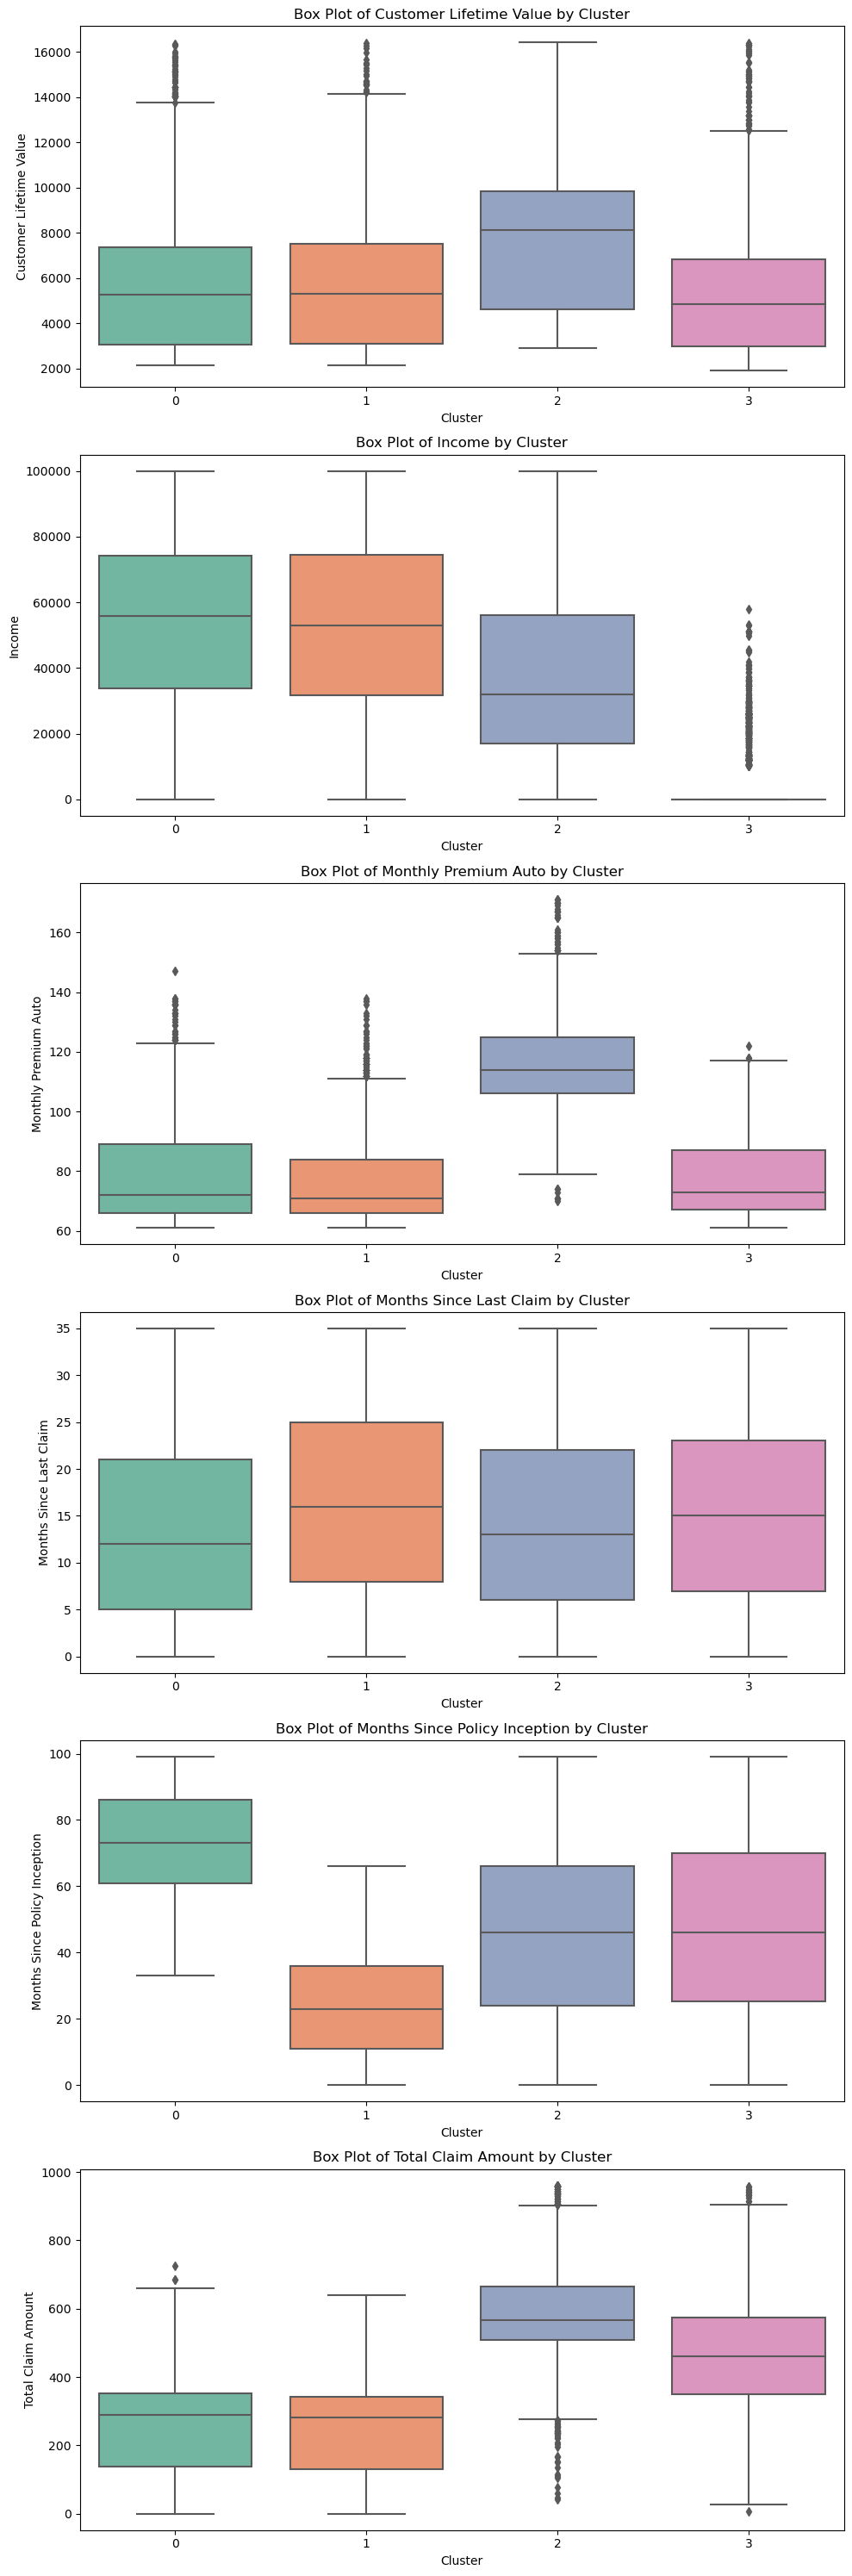

In [496]:
# Set up the figure for subplots
fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(10, len(num_features) * 5))

# Iterate over numerical features and plot box plots
for i, col in enumerate(num_features):
    sns.boxplot(x='Cluster', y=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Based on the box plots and bar charts provided, Let's define the key characteristics of each cluster:
1. Cluster 0:

- Moderate customer lifetime value
- High income
- Low monthly premium auto
- Long time since policy inception
- Low total claim amount
- Mostly "No" responses
- High proportion of basic coverage
- Mix of education levels, but high in Bachelor's
- Mostly employed
- More females than males
- Mostly suburban
- High proportion of married individuals
- Low number of open complaints
- Mostly personal auto policies
- Preference for Offer1 in renew offers
- High proportion of agent sales channel
- Four-door cars dominant
- Mostly medium-sized vehicles
- Highest proportion of L3 policy level

Cluster 1:

- Moderate customer lifetime value
- High income
- Low monthly premium auto
- Longest time since last claim
- Shortest time since policy inception
- Low total claim amount
- Mostly "No" responses
- High proportion of basic coverage
- Highest in College education
- Mostly employed
- More females than males
- Mix of suburban and rural locations
- High proportion of married individuals
- Low number of open complaints
- Mostly personal auto policies
- Preference for Offer2 in renew offers
- Agent sales channels
- Four-door cars dominant
- Mostly medium-sized vehicles
- Mix of L3 and L2 policy levels

Cluster 2:

- Highest customer lifetime value
- Low income
- Highest monthly premium auto
- Moderate time since last claim
- Moderate time since policy inception
- Highest total claim amount
- More "Yes" responses compared to other clusters
- Highest proportion of extended coverage
- High in High School education
- Mostly Employed
- More males than females
- Predominantly Suburban
- Mostly Married
- Low number of open complaints
- Mostly personal auto policies
- Strong preference for Offer1 in renew offers
- High use of agent sales channel
- Highest proportion of SUVs
- Mosty medium-sized vehicles
- High proportion of L3 policy level

Cluster 3:

- Lowest customer lifetime value
- Lowest income
- Low monthly premium auto
- Short time since last claim
- Short time since policy inception
- High total claim amount
- Mostly "No" responses
- Mix of basic and extended coverage
- High proportion of high school or below education
- Highest proportion of unemployed
- More males than females
- Predominantly suburban
- Highest proportion of single individuals
- Low number of open complaints
- High proportion of personal auto policies
- Strongest preference for Offer1 in renew offers
- High use of agent sales channel
- High proportion of four-door cars
- More small vehicles compared to other clusters
- Mix of policy levels, higher L3

These characteristics highlight the distinct features of each cluster, showing how customer segments differ across various demographic, policy, and behavioral attributes.

Based on the characteristics of each cluster, Let's give appropriate names that capture their key features:

- Cluster 0: "Stable Urban Savers".
This group is characterized by urban living, long-term policies, basic coverage, and lower premiums. They're mostly employed, married, and have moderate lifetime value.

- Cluster 1: "Young Rural Professionals".
This cluster seems to represent newer customers with short policy tenure, mostly employed, well-educated (high proportion of College degrees), and living in rural areas.

- Cluster 2: "High-Value Suburban Risk-Takers".
This group has the highest customer lifetime value, highest premiums, and most extended coverage. They're predominantly suburban, with higher High School education levels and more "Yes" responses, suggesting they might be more open to new offers or changes.

- Cluster 3: "Suburban Budget Conscious".
This cluster is characterized by suburban locations, lower education levels, higher unemployment, and the lowest customer lifetime value.

### **Cluster 0 Analysis**

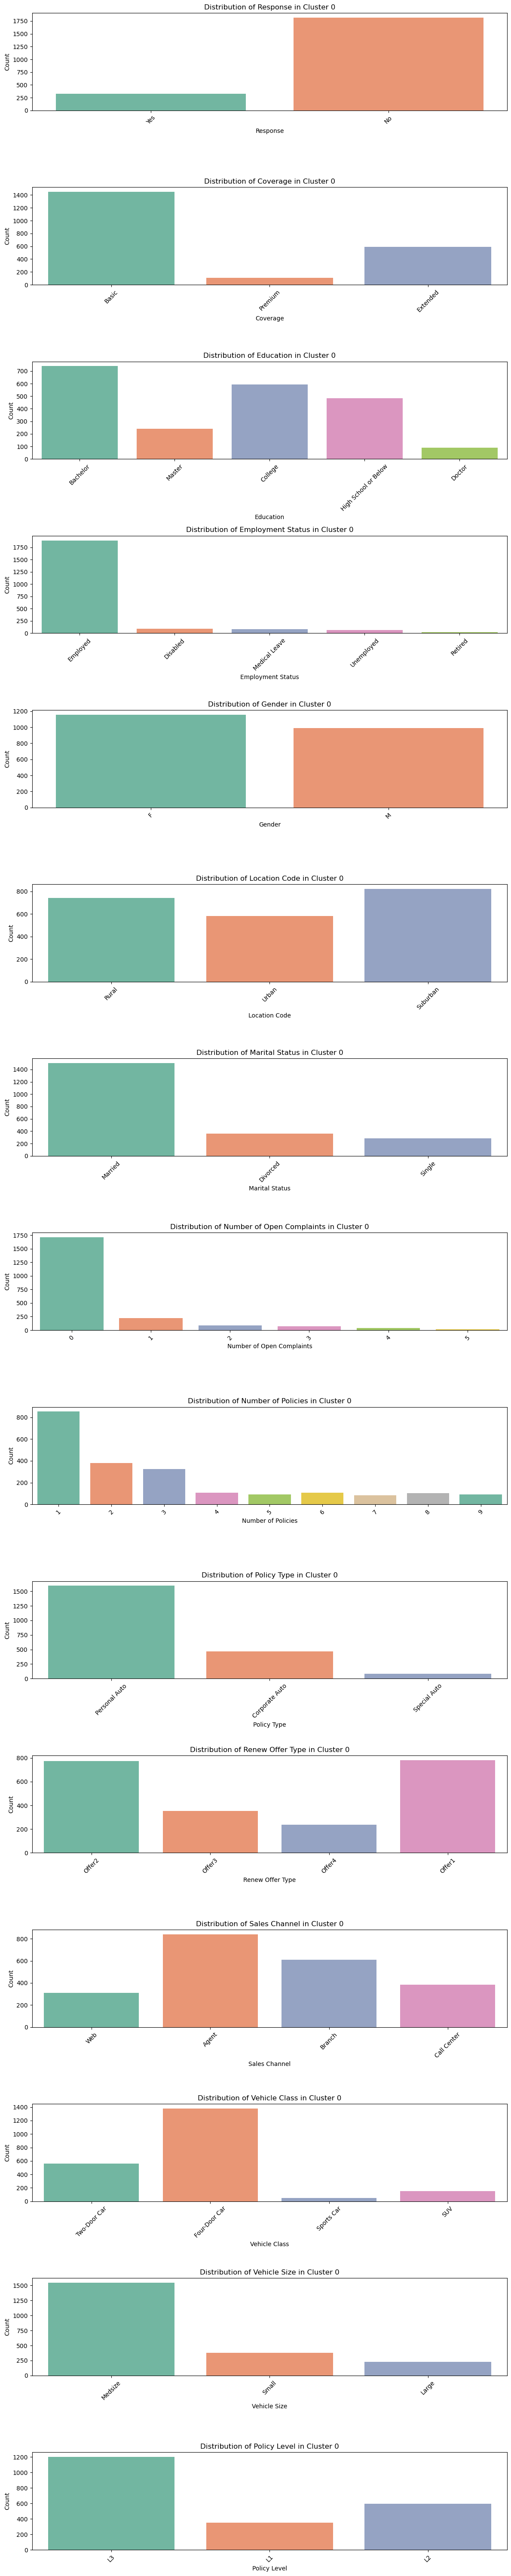

In [577]:
df_cluster_0 = df[df['Cluster'] == 0]

# Set up the figure for subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(12, len(cat_features) * 4))

# Iterate over categorical features and plot count plots
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df_cluster_0, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} in Cluster 0')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 0:
The visualizations provide insights into the distribution of various categorical features within Cluster 0.

Response

Distribution:
Yes: Approximately 1,600 customers.
No: Around 400 customers.
Interpretation: The majority of customers in this cluster have responded positively to marketing or renewal offers, indicating a high level of engagement or satisfaction with their policies.
Coverage

Distribution:
Basic: Around 900 customers.
Extended: Approximately 150 customers.
Premium: About 450 customers.
Interpretation: Most customers in this cluster prefer basic coverage, but there is a notable proportion that opts for premium coverage, indicating a mix of cost-conscious and value-oriented customers.
Education

Distribution:
Bachelor's: Approximately 700 customers.
College: Around 400 customers.
High School or Below: About 500 customers.
Doctor: Roughly 100 customers.
Interpretation: The education levels in this cluster are relatively balanced, with most customers holding a Bachelor's degree. However, there is also a significant portion with only a high school education.
Employment Status

Distribution:
Employed: Nearly 1,400 customers.
Unemployed/Medical Leave/Disabled/Retired: Very few customers in each category.
Interpretation: The vast majority of this cluster is employed, reflecting economic stability and the potential for regular premium payments.
Gender

Distribution:
Male: Approximately 1,000 customers.
Female: Around 900 customers.
Interpretation: The gender distribution is nearly equal, with a slight male predominance.
Location Code

Distribution:
Suburban: About 800 customers.
Urban: Around 700 customers.
Rural: Approximately 200 customers.
Interpretation: This cluster is primarily suburban and urban, with fewer customers living in rural areas.
Marital Status

Distribution:
Married: Approximately 1,200 customers.
Single: About 500 customers.
Divorced: Around 200 customers.
Interpretation: Most customers in this cluster are married, which could influence their purchasing decisions and insurance needs.
Number of Open Complaints

Distribution:
0 Complaints: Around 1,400 customers.
1 Complaint: Approximately 100 customers.
2 Complaints or More: Very few customers.
Interpretation: The majority of customers have no open complaints, suggesting satisfaction with the service provided.
Number of Policies

Distribution:
1 Policy: Around 600 customers.
2 Policies: About 300 customers.
3 or More Policies: Smaller numbers across different levels.
Interpretation: Most customers hold a single policy, with a smaller proportion holding multiple policies, indicating moderate engagement with the company.
Policy Type

Distribution:
Personal Auto: Predominantly about 1,200 customers.
Corporate Auto: Approximately 400 customers.
Special Auto: Very few customers.
Interpretation: Personal auto policies dominate this cluster, with corporate auto policies being a significant minority.
Renew Offer Type

Distribution:
Offer 4: Approximately 800 customers.
Offer 1: Around 400 customers.
Offer 2: About 300 customers.
Offer 3: Roughly 300 customers.
Interpretation: Offer 4 is the most popular renewal offer, with other offers being somewhat evenly distributed.
Sales Channel

Distribution:
Agent: Approximately 800 customers.
Branch: Around 500 customers.
Call Center: Roughly 400 customers.
Web: About 200 customers.
Interpretation: Customers in this cluster engage with the company primarily through agents, with branches and call centers also being common channels.
Vehicle Class

Distribution:
Four-Door Car: Approximately 1,200 customers.
Two-Door Car: Around 400 customers.
SUV: About 300 customers.
Sports Car: Very few customers.
Interpretation: Four-door cars are the most common vehicle class, followed by two-door cars and SUVs, indicating a preference for practical or family-oriented vehicles.
Vehicle Size

Distribution:
Medsize: Approximately 1,200 customers.
Small: Around 400 customers.
Large: About 200 customers.
Interpretation: The majority of vehicles in this cluster are medium-sized, with fewer small or large vehicles.
Policy Level

Distribution:
L3: About 900 customers.
L2: Around 400 customers.
L1: Roughly 300 customers.
Interpretation: Most customers are on the higher policy levels, with L3 being the most common, indicating a preference for more comprehensive coverage.
Summary for Stakeholders:
Cluster 0 represents a highly engaged customer segment, with a significant portion of customers responding positively to marketing and renewal offers. This cluster primarily consists of employed, married individuals living in suburban and urban areas. Most customers prefer basic or premium coverage, and they generally hold personal auto policies.

Given their high level of engagement and the tendency to choose higher policy levels, these customers are valuable to the company. The company should focus on retaining these customers by continuing to offer attractive renewal options, particularly through the preferred sales channels like agents and branches. Additionally, exploring opportunities to upsell or cross-sell additional coverage or policies could further increase their lifetime value. This cluster's preference for medium-sized, practical vehicles suggests that targeted offers related to these preferences could also enhance customer satisfaction and loyalty.

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\2683168413.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_0[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\2683168413.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_0[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local

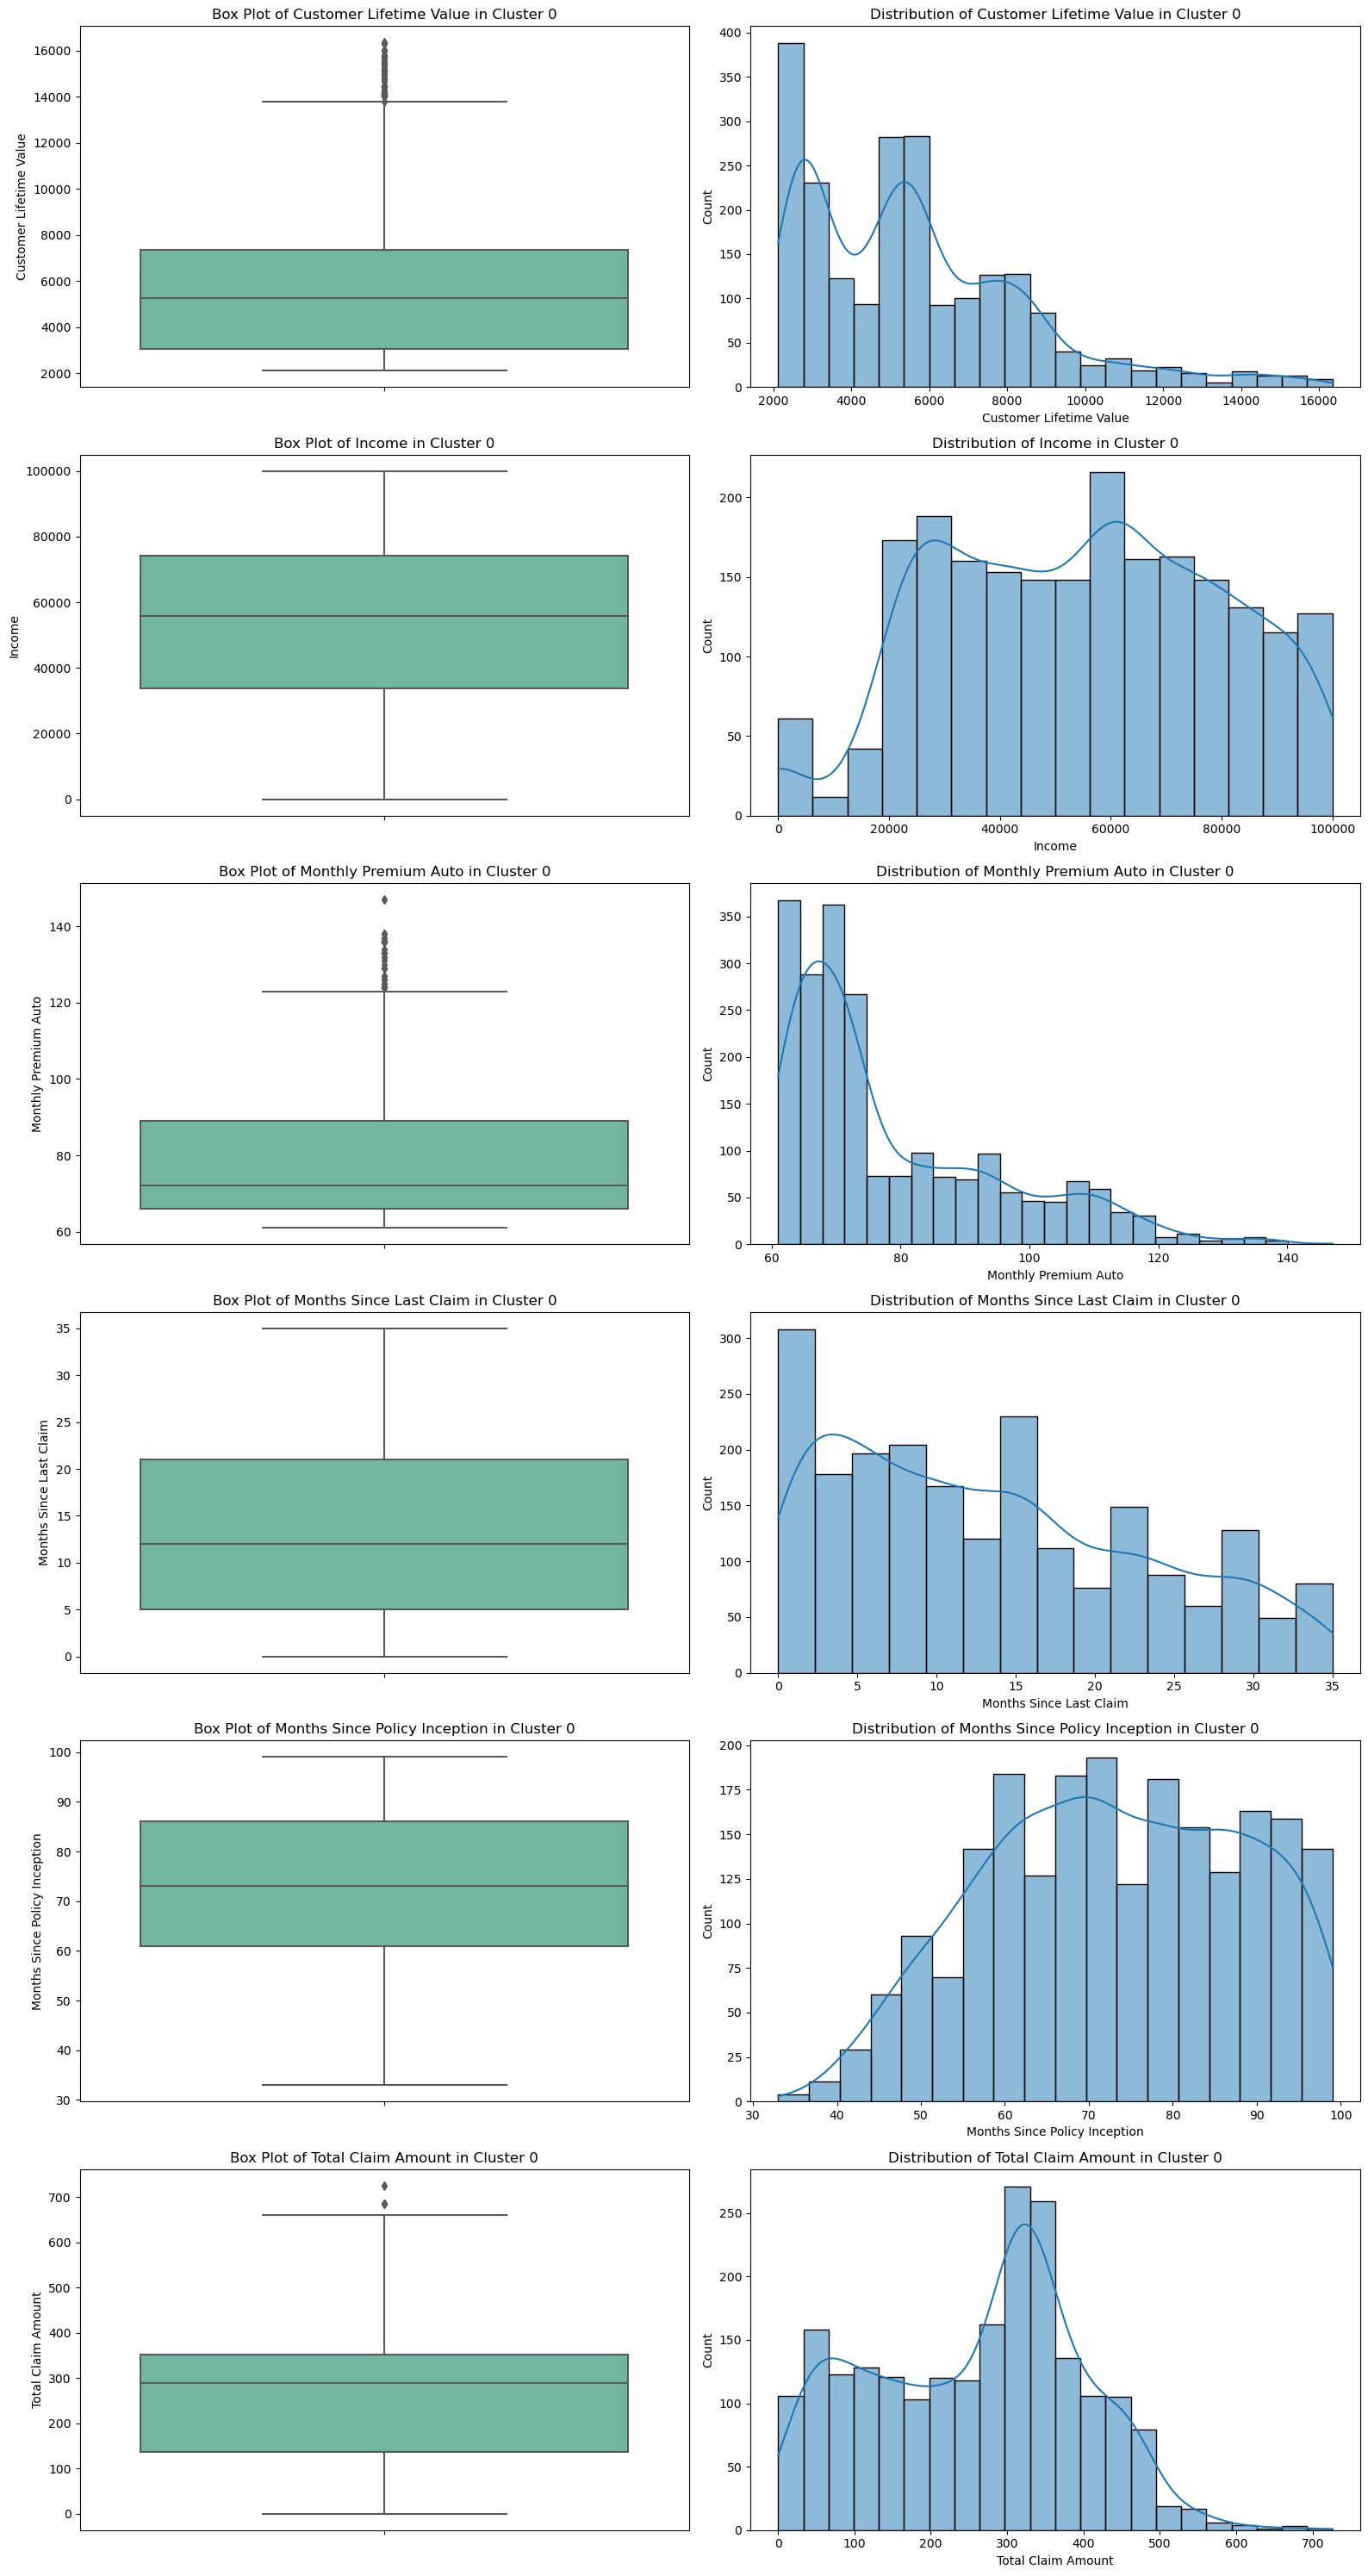

In [578]:
# Set up the figure for subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(16, len(num_features) * 5))

# Iterate over numerical features and plot box plots and histograms
for i, col in enumerate(num_features):
    # Box plot
    sns.boxplot(y=col, data=df_cluster_0, palette='Set2', ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {col} in Cluster 0')
    axes[i, 0].set_ylabel(col)
    
    # Histogram
    sns.histplot(df_cluster_0[col], kde=True, palette='Set2', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col} in Cluster 0')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 0:

The provided visualizations include box plots and distribution plots for several key features within Cluster 0.

### Customer Lifetime Value (CLV)

Box Plot:

Median CLV: Approximately 5400.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 3500 and 7600.
Outliers: There are some outliers beyond 14000.

Distribution:
The majority of CLV values are clustered between 2000 and 6000, with a few customers extending beyond 10000.
Interpretation: This indicates that Cluster 0 primarily consists of customers with moderate CLV, with a small number of high-value outliers.

### Income

Box Plot:

Median Income: Approximately 60,000.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 30,000 and 90,000.
Outliers: There are some outliers at both ends, particularly in the lower income range.

Distribution:
The income distribution is somewhat uniform, with a concentration between 40,000 and 80,000.
Interpretation: Customers in Cluster 0 generally have a wide range of income, with most clustered in the middle-income range. This suggests a diverse economic background among these customers.

### Monthly Premium Auto

Box Plot:

Median Premium: Approximately 80.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 70 and 100.
Outliers: There are outliers with premiums above 140.

Distribution:
The distribution shows a peak around the 70-90 range, with a long tail extending to higher premiums.
Interpretation: The majority of customers in Cluster 0 pay moderate monthly premiums, indicating a balanced approach to coverage and spending.

### Months Since Last Claim

Box Plot:

Median: Approximately 12 months.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 6 and 18 months.
Outliers: Minimal outliers, suggesting consistent behavior.

Distribution:
The distribution is fairly uniform, with slight peaks at regular intervals (every few months).
Interpretation: This indicates that claims are somewhat regularly spaced out, with most customers having made a claim within the last year.

### Months Since Policy Inception

Box Plot:

Median: Approximately 60 months.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 40 and 80 months.

Distribution:
The distribution is fairly even, with customers spread across different lengths of time since policy inception.
Interpretation: This cluster includes customers with a broad range of policy tenures, from newer customers to those who have been with the company for several years.

### Total Claim Amount

Box Plot:

Median: Approximately 400.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 200 and 600.
Outliers: Some outliers extend above 800.

Distribution:
The distribution peaks around 300-500, with a long tail for higher claim amounts.
Interpretation: Customers in this cluster generally have moderate total claim amounts, with some higher claims indicating potential high-cost events.

### Summary for Stakeholders:

Cluster 0 represents a group of customers with moderate customer lifetime value (CLV) and diverse financial backgrounds. The typical customer in this cluster has an income ranging between 30,000 and 90,000, pays a monthly premium of around 80, and has been with the company for roughly 60 months. Their total claim amounts are generally moderate, with most claims falling between 200 and 600.

These customers tend to have consistent behavior, with claims made roughly every 6 to 18 months. Although there are a few high-value outliers, this cluster largely consists of stable, moderate-value customers who contribute consistently to the company's revenue.

### **Cluster 1 Analysis**

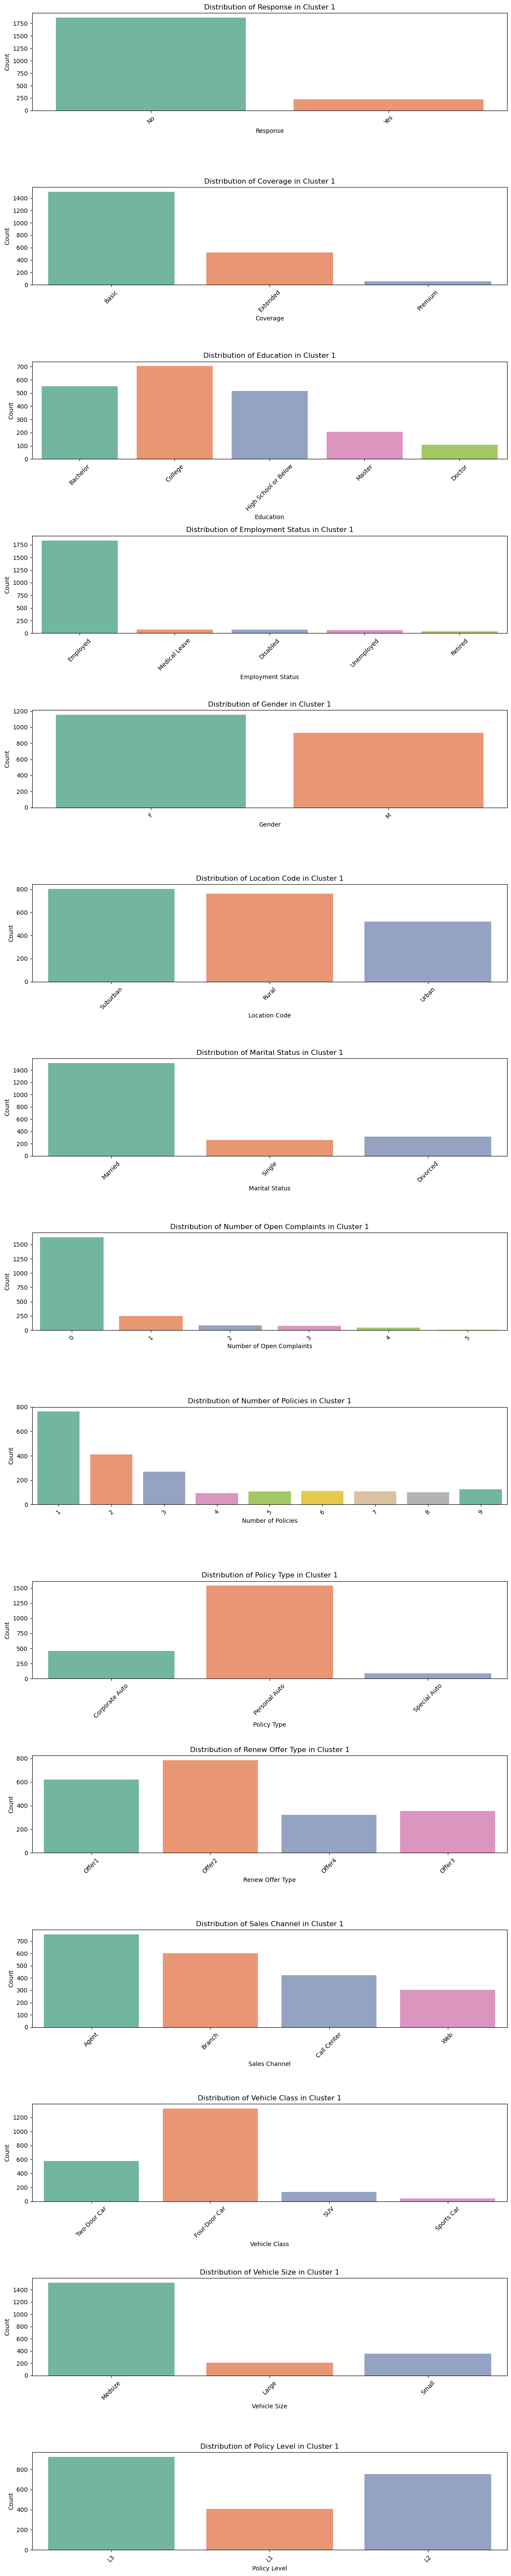

In [579]:
df_cluster_1 = df[df['Cluster'] == 1]

# Set up the figure for subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(12, len(cat_features) * 4))

# Iterate over categorical features and plot count plots
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df_cluster_1, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} in Cluster 1')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 1:
The visualizations provide insights into the distribution of various categorical features within Cluster 1.

Response

Distribution:
No: Approximately 1,700 customers.
Yes: About 300 customers.
Interpretation: The majority of customers in this cluster have not responded positively to marketing offers or renewals, indicating either a lack of interest or satisfaction with their current policies.
Coverage

Distribution:
Basic: Around 1,300 customers.
Extended: Approximately 450 customers.
Premium: Very few customers (almost negligible).
Interpretation: Most customers in this cluster opt for basic coverage, with a smaller portion choosing extended coverage. Premium coverage is nearly non-existent, indicating cost-conscious behavior.
Education

Distribution:
Bachelor's: About 700 customers.
College: Around 600 customers.
High School or Below: Approximately 400 customers.
Doctor: Roughly 100 customers.
Interpretation: This cluster is fairly educated, with most customers having a Bachelor's or College education. However, there’s a noticeable portion with only a high school education.
Employment Status

Distribution:
Employed: Nearly 1,700 customers.
Unemployed/Medical Leave/Disabled/Retired: Very few customers in each category.
Interpretation: The vast majority of this cluster is employed, indicating economic stability and potential for upselling or cross-selling.
Gender

Distribution:
Male: Approximately 1,000 customers.
Female: Around 900 customers.
Interpretation: The gender distribution is nearly equal, with a slight male predominance.
Location Code

Distribution:
Suburban: About 850 customers.
Rural: Around 750 customers.
Urban: Approximately 400 customers.
Interpretation: This cluster is predominantly suburban and rural, with fewer urban dwellers.
Marital Status

Distribution:
Married: Around 1,400 customers.
Single: About 400 customers.
Divorced: Approximately 200 customers.
Interpretation: Most customers in this cluster are married, which may contribute to their purchasing decisions and stability.
Number of Open Complaints

Distribution:
0 Complaints: Around 1,500 customers.
1 Complaint: Approximately 150 customers.
2 Complaints or More: Very few customers.
Interpretation: The majority of customers have no open complaints, suggesting satisfaction or lack of issues with the service.
Number of Policies

Distribution:
1 Policy: Around 700 customers.
2 Policies: About 300 customers.
3 or More Policies: Smaller numbers across different levels.
Interpretation: Most customers hold a single policy, with a smaller portion holding multiple policies.
Policy Type

Distribution:
Personal Auto: Predominantly about 1,200 customers.
Corporate Auto: Approximately 600 customers.
Special Auto: Very few customers.
Interpretation: Personal auto policies dominate this cluster, with corporate auto policies making up a significant minority.
Renew Offer Type

Distribution:
Offer 1: Approximately 700 customers.
Offer 2: Around 500 customers.
Offer 3: About 400 customers.
Offer 4: Roughly 300 customers.
Interpretation: Renewals are relatively balanced across different offers, with no single offer overwhelmingly dominating.
Sales Channel

Distribution:
Agent: Approximately 800 customers.
Call Center: Around 500 customers.
Branch: Roughly 400 customers.
Web: About 400 customers.
Interpretation: Customers in this cluster engage with the company through multiple channels, with agents being the most common.
Vehicle Class

Distribution:
Two-Door Car: Around 400 customers.
Four-Door Car: Approximately 900 customers.
SUV: About 300 customers.
Sports Car: Few customers (negligible).
Interpretation: Four-door cars are the most common vehicle class in this cluster, indicating family or practical vehicle use.
Vehicle Size

Distribution:
Medsize: Approximately 1,200 customers.
Small: Around 300 customers.
Large: About 200 customers.
Interpretation: The majority of vehicles in this cluster are of medium size, with fewer customers driving small or large vehicles.
Policy Level

Distribution:
L3: About 900 customers.
L2: Around 600 customers.
L1: Roughly 400 customers.
Interpretation: Most customers are on the higher policy levels, with L3 being the most common.

Summary for Stakeholders:
Cluster 1 represents a segment primarily composed of employed, married individuals living in suburban and rural areas. This cluster is characterized by moderate education levels, with most customers holding a Bachelor's or College degree. They tend to prefer basic coverage with personal auto policies and generally engage with the company through agents. Most customers in this cluster hold a single policy, and complaints are minimal, indicating satisfaction with the services.

Given their employment status and the tendency to choose basic coverage, these customers might be cost-conscious but stable. The company could focus on upselling additional policies or extended coverage to this group, leveraging their stable income and moderate risk profile. Additionally, targeting personalized offers through agents, the most common engagement channel, could further enhance customer satisfaction and retention in this segment.

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1455697915.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_1[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1455697915.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_1[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local

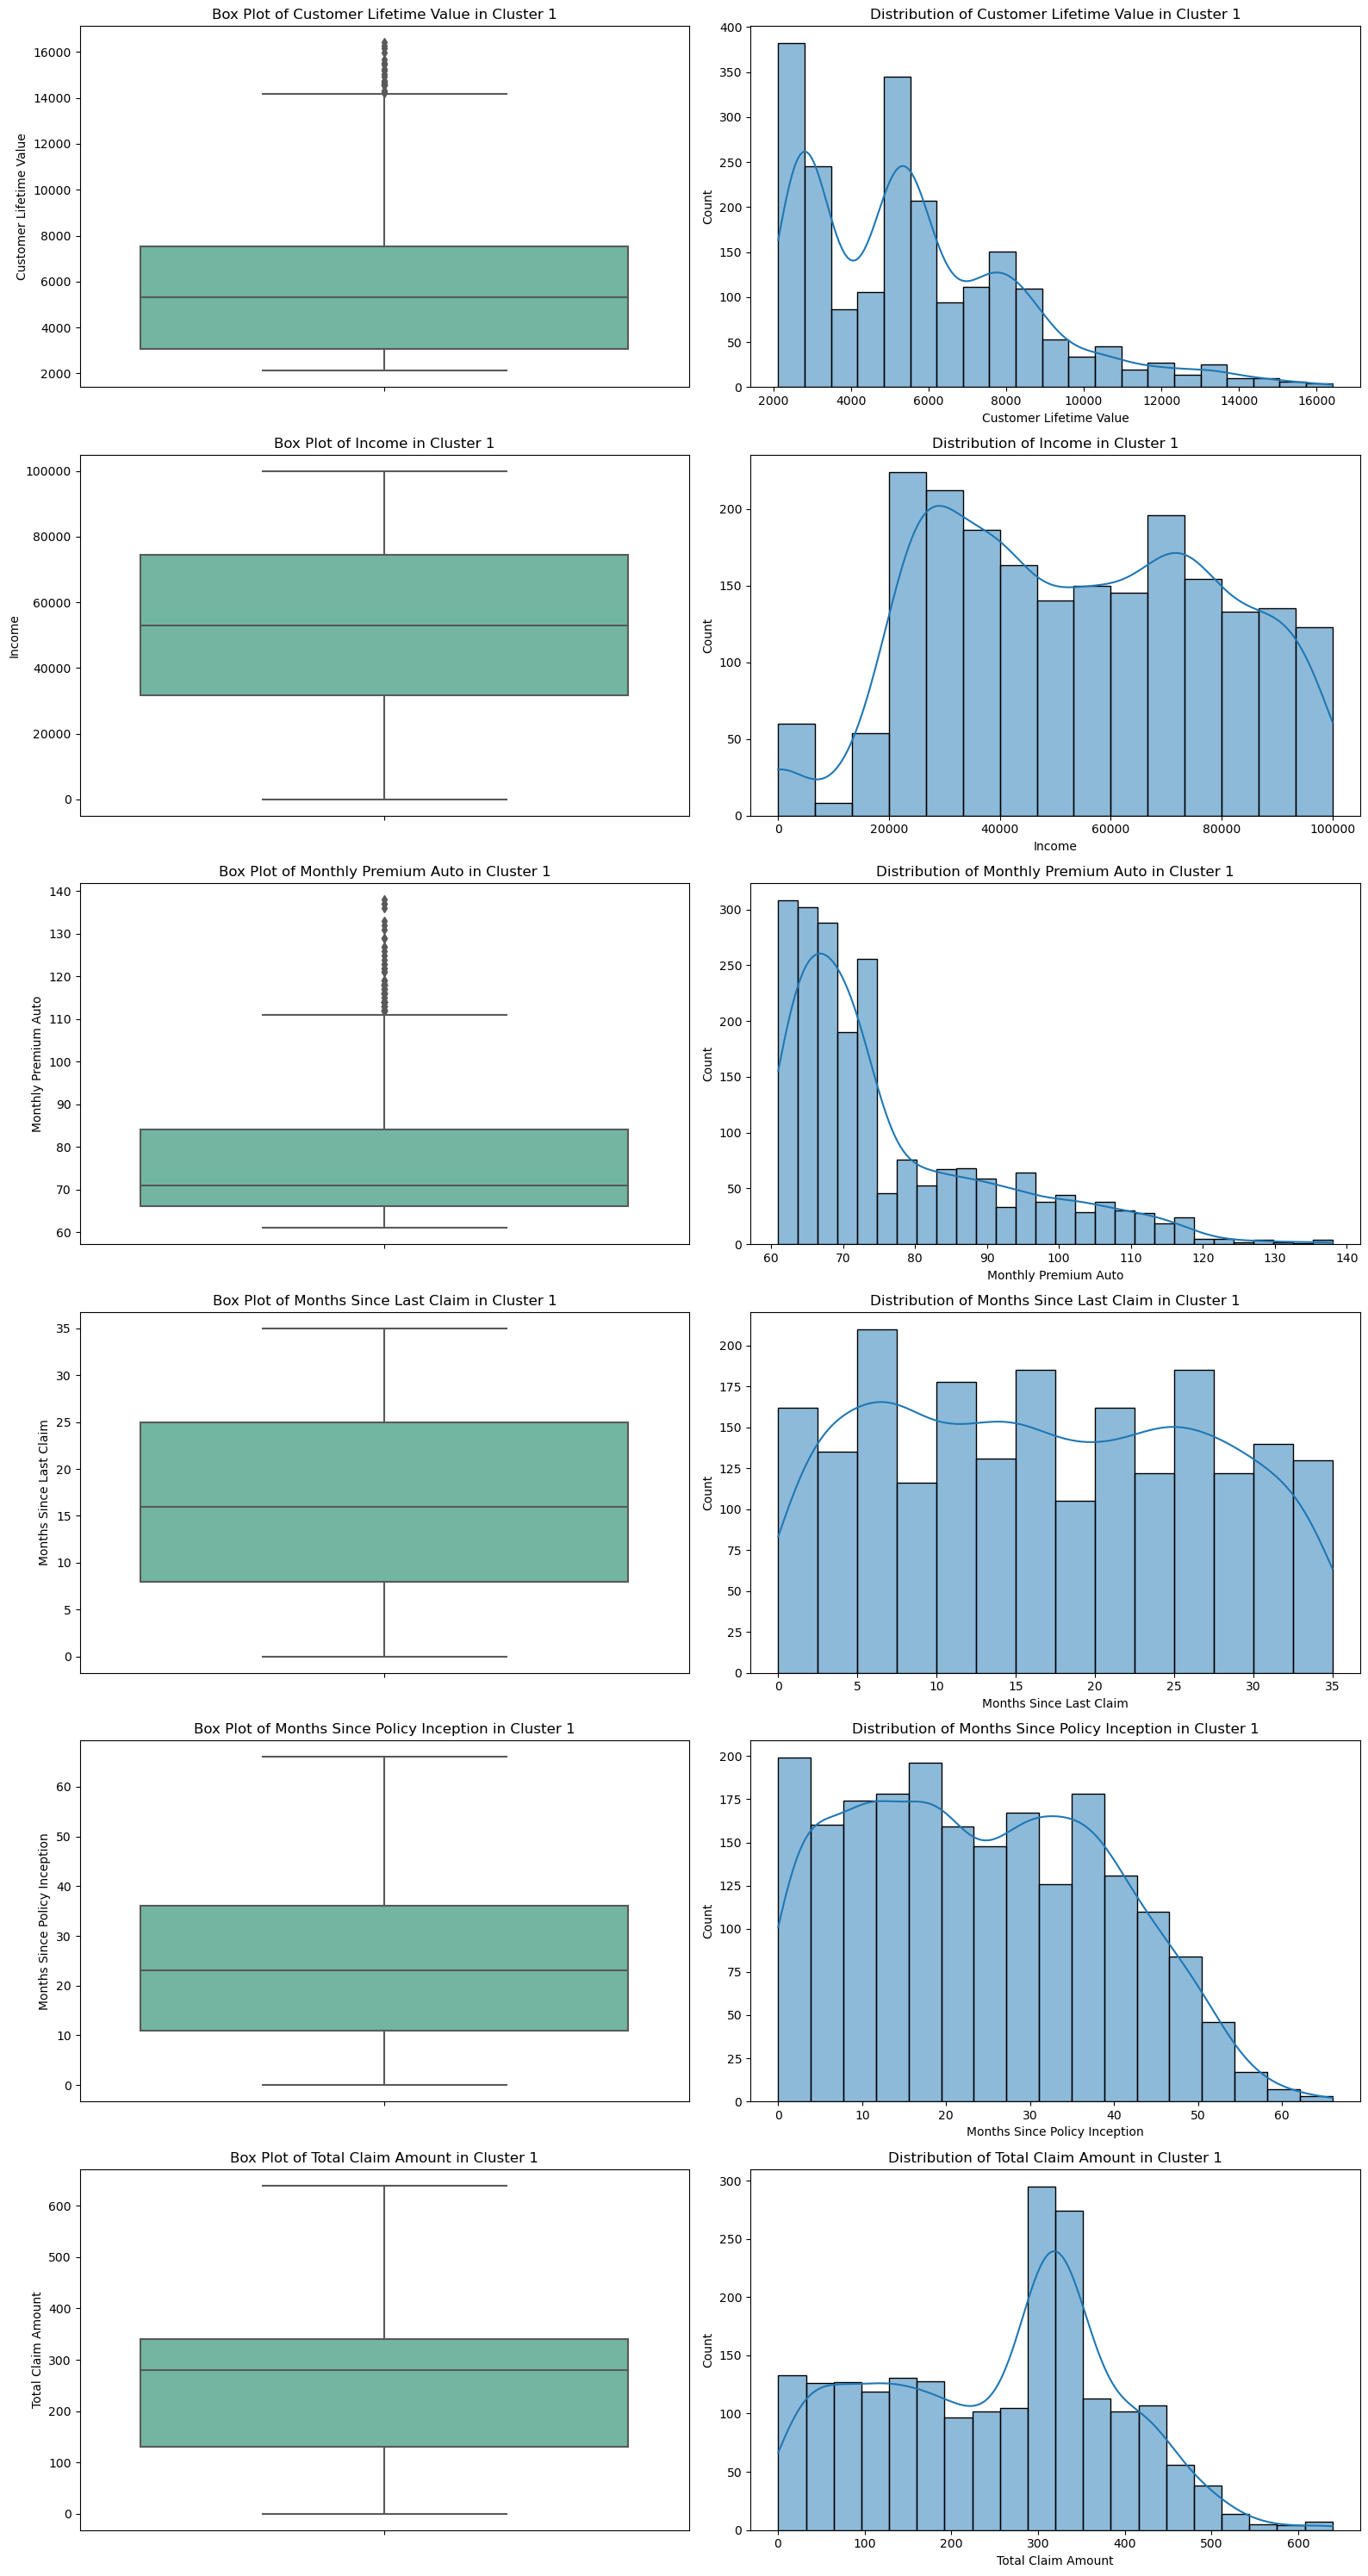

In [580]:
# Set up the figure for subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(16, len(num_features) * 5))

# Iterate over numerical features and plot box plots and histograms
for i, col in enumerate(num_features):
    # Box plot
    sns.boxplot(y=col, data=df_cluster_1, palette='Set2', ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {col} in Cluster 1')
    axes[i, 0].set_ylabel(col)
    
    # Histogram
    sns.histplot(df_cluster_1[col], kde=True, palette='Set2', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col} in Cluster 1')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 1:
The visualizations provide a comprehensive look at the distribution of several key numerical features within Cluster 1. 

### Customer Lifetime Value (CLV)

Box Plot:
Median CLV: Approximately 6000.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 4000 and 8000.
Outliers: There are some outliers extending beyond 14000, with the maximum value nearing 16000.

Distribution:
The distribution shows that most customers in this cluster have a CLV between 2000 and 8000, with a gradual decline in frequency as CLV increases.
Interpretation: Cluster 1 is characterized by customers with moderate to slightly above-average CLV, with a few high-value outliers. This suggests a stable and somewhat valuable customer base.

### Income

Box Plot:
Median Income: Approximately 60,000.
Interquartile Range (IQR): The middle 50% of the data ranges between 40,000 and 80,000.
Outliers: The income distribution includes a few lower outliers, with the minimum near 0 and the maximum income close to 100,000.

Distribution:
The income distribution is fairly even, with peaks around the 40,000 to 60,000 range. There is a gradual decline in the number of customers as income increases toward 100,000.
Interpretation: Customers in Cluster 1 generally fall within the middle-income range, indicating economic stability and potential for mid-range financial products.

### Monthly Premium Auto

Box Plot:
Median Premium: Approximately 80.
Interquartile Range (IQR): The middle 50% of the data ranges between 70 and 90.
Outliers: There are several outliers, with some premiums exceeding 130.

Distribution:
The distribution shows a high concentration of customers with premiums between 60 and 90, with fewer customers paying higher premiums.
Interpretation: The majority of customers in Cluster 1 pay moderate premiums, reflecting a preference for mid-tier insurance coverage.

### Months Since Last Claim

Box Plot:
Median: Approximately 15 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 8 and 22 months.
Outliers: There are minimal outliers, suggesting consistent behavior across the cluster.

Distribution:
The distribution is fairly uniform, with peaks at regular intervals, indicating claims are spread somewhat evenly over time.
Interpretation: Customers in this cluster tend to make claims regularly, with most having made a claim within the last 15 months.

### Months Since Policy Inception

Box Plot:
Median: Approximately 30 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 15 and 45 months.
Outliers: There are no significant outliers, indicating that most customers have similar policy tenure.

Distribution:
The distribution is slightly skewed, with more customers having policies for shorter durations, but a notable number have longer-term policies.
Interpretation: This cluster includes a mix of newer and moderately long-term customers, with a tendency toward shorter policy durations.

### Total Claim Amount

Box Plot:
Median: Approximately 300.
Interquartile Range (IQR): The middle 50% of the data ranges between 150 and 450.
Outliers: There are some outliers, with claims exceeding 600.

Distribution:
The distribution shows a peak around 300, with a long tail extending to higher claim amounts.
Interpretation: The total claim amounts for this cluster are generally moderate, with a few higher claims indicating occasional high-cost events.

### Summary for Stakeholders:
Cluster 1 is composed of customers with moderate Customer Lifetime Value (CLV) and income levels. The median CLV in this cluster is around 6000, with most customers falling in the range of 2000 to 8000. The income distribution suggests that these customers are economically stable, with a median income of around 60,000. They tend to pay moderate monthly premiums, reflecting a preference for mid-tier insurance coverage.

This cluster includes a mix of customers in terms of policy tenure, with the median duration being around 30 months. Claims are made regularly, with most customers having made a claim within the last 15 months. The total claim amounts are generally moderate, with a few instances of higher claims.

### **Cluster 2 Analysis**

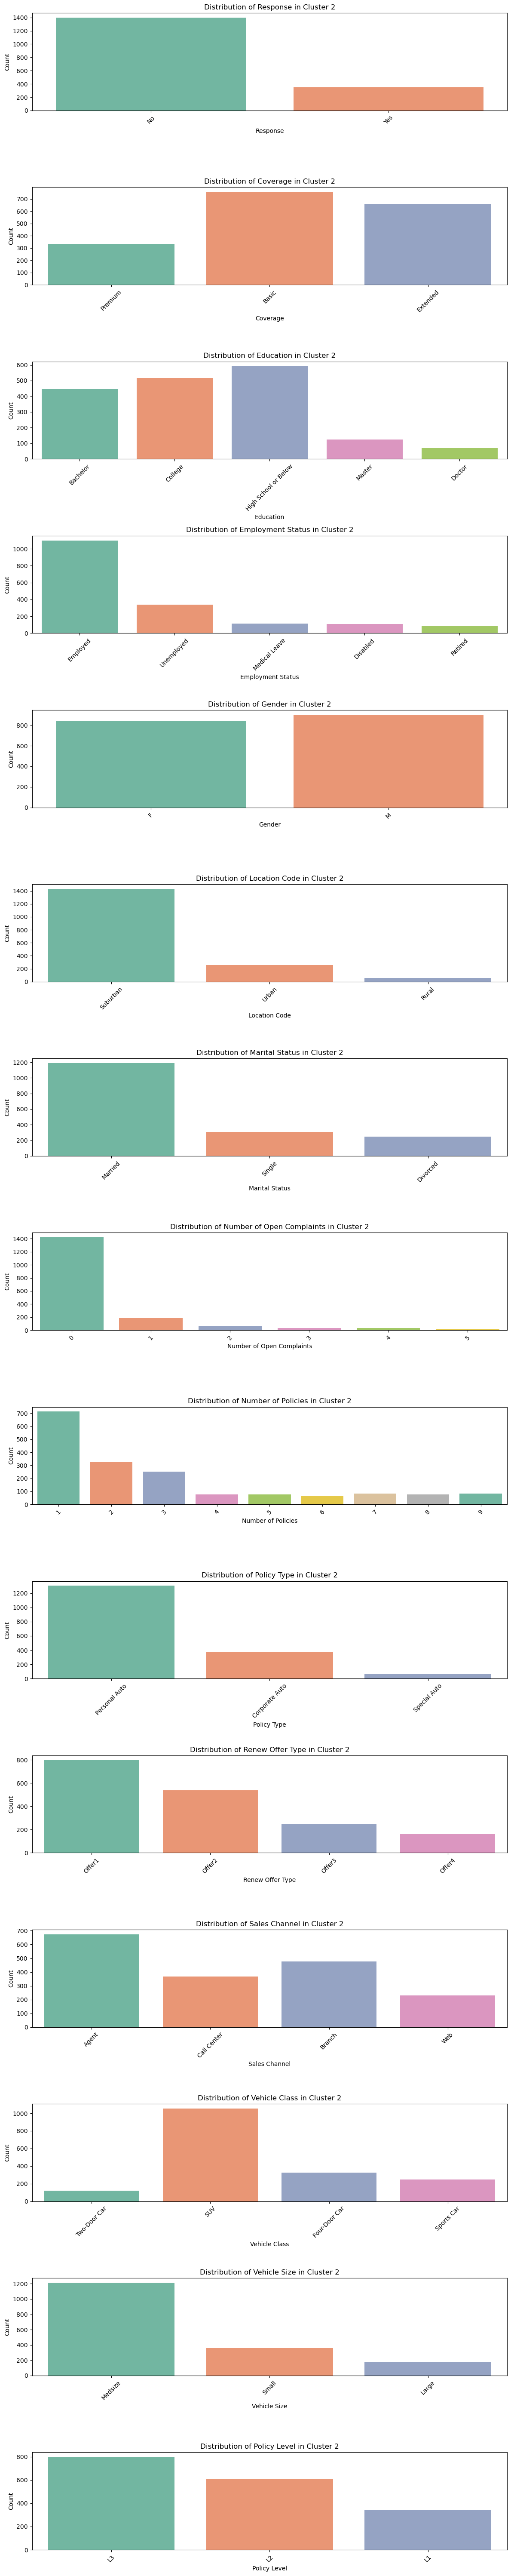

In [581]:
df_cluster_2 = df[df['Cluster'] == 2]

# Set up the figure for subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(12, len(cat_features) * 4))

# Iterate over categorical features and plot count plots
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df_cluster_2, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} in Cluster 2')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 2:
The visualizations provided detail the distribution of several categorical features within Cluster 2.

Response

Distribution:
No: Approximately 1,100 customers.
Yes: Around 350 customers.
Interpretation: The majority of customers in this cluster have not responded positively to marketing or renewal offers, though there is a notable proportion that has engaged.
Coverage

Distribution:
Basic: About 400 customers.
Extended: Approximately 500 customers.
Premium: Around 450 customers.
Interpretation: This cluster is more evenly split between different levels of coverage, with significant portions opting for both extended and premium coverage, indicating a higher willingness to invest in comprehensive insurance.
Education

Distribution:
Bachelor's: Approximately 400 customers.
College: Around 400 customers.
High School or Below: About 300 customers.
Doctor: Roughly 100 customers.
Interpretation: The education levels in this cluster are balanced, with most customers holding a Bachelor's or College degree. There is also a substantial portion with high school education.
Employment Status

Distribution:
Employed: Around 1,000 customers.
Unemployed/Medical Leave/Disabled/Retired: Very few customers in each of these categories.
Interpretation: A significant majority of this cluster is employed, reflecting economic stability and a potential for higher financial commitments.
Gender

Distribution:
Male: Approximately 750 customers.
Female: Around 700 customers.
Interpretation: The gender distribution is nearly balanced, with a slight male predominance.
Location Code

Distribution:
Suburban: About 1,000 customers.
Urban: Around 250 customers.
Rural: Very few customers.
Interpretation: This cluster is predominantly suburban, with a smaller urban presence and minimal rural representation.
Marital Status

Distribution:
Married: Approximately 1,000 customers.
Single: About 250 customers.
Divorced: Around 100 customers.
Interpretation: Most customers in this cluster are married, which could influence their purchasing decisions and insurance needs.
Number of Open Complaints

Distribution:
0 Complaints: Around 1,200 customers.
1 Complaint: Approximately 100 customers.
2 Complaints or More: Very few customers.
Interpretation: The majority of customers have no open complaints, indicating satisfaction or a lack of issues with the services provided.
Number of Policies

Distribution:
1 Policy: Around 500 customers.
2 Policies: About 200 customers.
3 or More Policies: Smaller numbers across different levels.
Interpretation: Most customers hold a single policy, with a smaller proportion holding multiple policies, suggesting moderate engagement with the company.
Policy Type

Distribution:
Personal Auto: Predominantly about 1,000 customers.
Corporate Auto: Approximately 300 customers.
Special Auto: Very few customers.
Interpretation: Personal auto policies are the most common in this cluster, with corporate auto policies being a significant minority.
Renew Offer Type

Distribution:
Offer 1: Approximately 600 customers.
Offer 2: Around 300 customers.
Offer 3: About 250 customers.
Offer 4: Roughly 150 customers.
Interpretation: Renewals are somewhat concentrated in Offer 1, with other offers having a more even distribution.
Sales Channel

Distribution:
Agent: Approximately 600 customers.
Call Center: Around 300 customers.
Branch: Roughly 300 customers.
Web: About 200 customers.
Interpretation: Customers in this cluster engage with the company primarily through agents, followed by call centers and branches, with web usage being the least common.
Vehicle Class

Distribution:
Two-Door Car: Around 300 customers.
Four-Door Car: Approximately 600 customers.
SUV: About 400 customers.
Sports Car: Few customers (negligible).
Interpretation: Four-door cars are the most common vehicle class, followed by SUVs, suggesting a preference for practical or family-oriented vehicles.
Vehicle Size

Distribution:
Medsize: Approximately 800 customers.
Small: Around 200 customers.
Large: About 100 customers.
Interpretation: The majority of vehicles in this cluster are medium-sized, with fewer small or large vehicles.
Policy Level

Distribution:
L3: About 600 customers.
L2: Around 300 customers.
L1: Roughly 200 customers.
Interpretation: Most customers are on the higher policy levels, with L3 being the most common, indicating a preference for more comprehensive coverage.

Summary for Stakeholders:
Cluster 2 represents a group of customers who are mostly employed, married, and living in suburban areas. This cluster shows a balanced distribution of education levels, with a significant number opting for extended or premium coverage. They tend to hold personal auto policies and engage with the company primarily through agents, although other sales channels are also utilized.

Given their preference for higher coverage levels and their economic stability, this cluster has the potential for increased engagement and upselling opportunities. The company's efforts should focus on maintaining their satisfaction through personalized offers, especially targeting renewals and multi-policy discounts. Additionally, given the higher coverage preferences, introducing more comprehensive or tailored insurance products could further strengthen their loyalty and increase their lifetime value.

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\3807304970.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_2[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\3807304970.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_2[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local

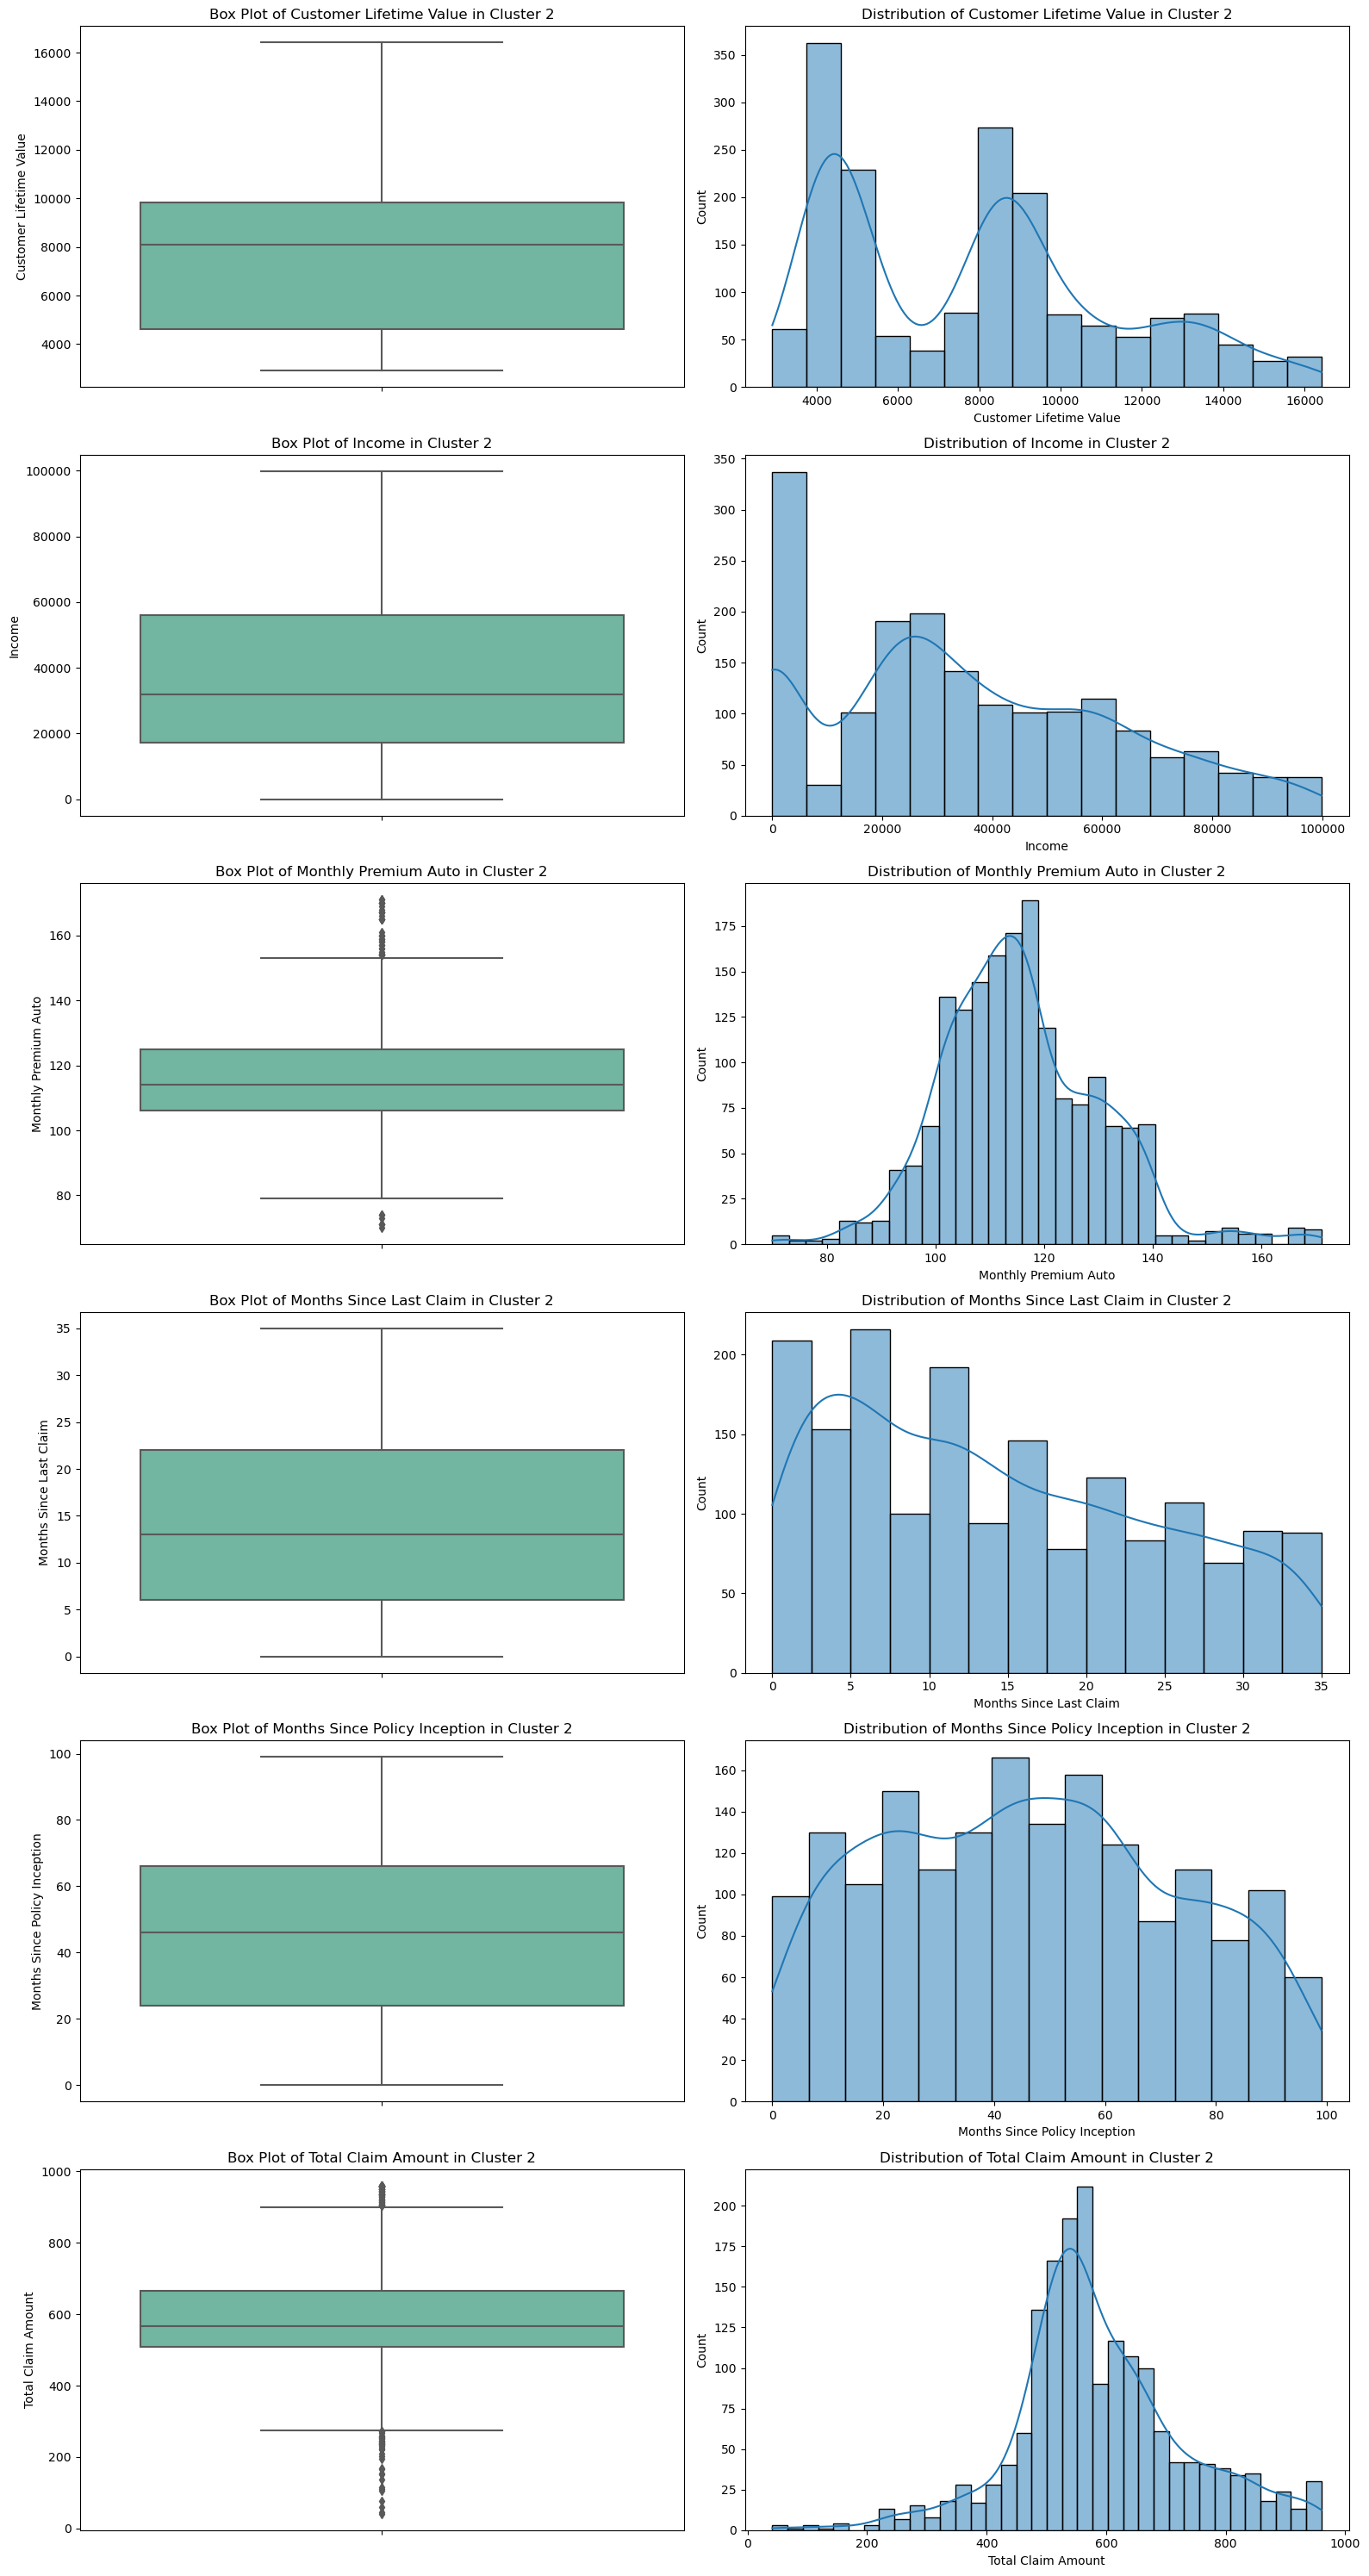

In [582]:
# Set up the figure for subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(16, len(num_features) * 5))

# Iterate over numerical features and plot box plots and histograms
for i, col in enumerate(num_features):
    # Box plot
    sns.boxplot(y=col, data=df_cluster_2, palette='Set2', ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {col} in Cluster 2')
    axes[i, 0].set_ylabel(col)
    
    # Histogram
    sns.histplot(df_cluster_2[col], kde=True, palette='Set2', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col} in Cluster 2')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 2:
The visualizations provide insights into the distribution of several key numerical features within Cluster 2.

### Customer Lifetime Value (CLV)

Box Plot:
Median CLV: Approximately 8000.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 6000 and 10000.
Outliers: There are outliers extending beyond 14000, with the maximum value nearing 16000.

Distribution:
The distribution shows that most customers in this cluster have a CLV between 4000 and 10000, with a slight peak around 6000-8000 and a gradual decline as CLV increases.
Interpretation: Cluster 2 is characterized by customers with higher-than-average CLV, indicating that these customers are likely more engaged and valuable to the company.

### Income

Box Plot:
Median Income: Approximately 60,000.
Interquartile Range (IQR): The middle 50% of the data ranges between 40,000 and 80,000.
Outliers: The income distribution includes a few lower outliers, with the minimum near 0 and the maximum income close to 100,000.

Distribution:
The income distribution is fairly even, with a notable concentration around 40,000 to 60,000. There is a gradual decline in the number of customers as income increases towards 100,000.
Interpretation: Customers in Cluster 2 generally fall within the middle to upper-middle-income range, reflecting their ability to invest in higher premiums and coverage.

### Monthly Premium Auto

Box Plot:
Median Premium: Approximately 100.
Interquartile Range (IQR): The middle 50% of the data ranges between 90 and 120.
Outliers: There are several outliers, with some premiums extending beyond 160.

Distribution:
The distribution shows a high concentration of customers with premiums between 90 and 120, indicating a preference for higher coverage options.
Interpretation: The majority of customers in Cluster 2 pay higher premiums, reflecting their preference for more comprehensive insurance policies.

### Months Since Last Claim

Box Plot:
Median: Approximately 15 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 7 and 25 months.
Outliers: There are minimal outliers, suggesting consistent behavior across the cluster.

Distribution:
The distribution is somewhat uniform, with slight peaks around the 0-5 months range and a gradual decline thereafter.
Interpretation: Customers in this cluster make claims regularly, with most having made a claim within the last 15 months, indicating active use of their insurance.

### Months Since Policy Inception

Box Plot:
Median: Approximately 50 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 25 and 75 months.
Outliers: There are no significant outliers, indicating that most customers have similar policy tenure.

Distribution:
The distribution is slightly skewed, with more customers having policies for moderate to long durations, but with a noticeable number having held policies for shorter durations.
Interpretation: This cluster includes a mix of newer and long-term customers, with a tendency towards longer policy durations, suggesting loyalty and consistent engagement.

### Total Claim Amount

Box Plot:
Median: Approximately 600.
Interquartile Range (IQR): The middle 50% of the data ranges between 450 and 800.
Outliers: There are some outliers, with claims extending beyond 900.

Distribution:
The distribution peaks around 600, with a gradual decline as claim amounts increase.
Interpretation: The total claim amounts for this cluster are generally higher than average, indicating that these customers may have more significant insurance needs or higher-risk profiles.

### Summary for Stakeholders:
Cluster 2 represents a high-value customer segment with above-average Customer Lifetime Value (CLV) and a tendency towards higher income and premium payments. The median CLV in this cluster is around 8000, with most customers falling in the range of 6000 to 10000. These customers generally fall within the middle to upper-middle-income range, with a median income of approximately 60,000.

This cluster is characterized by higher monthly premium payments, reflecting their preference for more comprehensive insurance coverage. The majority of customers have been with the company for a moderate to long duration, with a median policy tenure of around 50 months, suggesting strong loyalty. Additionally, these customers tend to make claims regularly, with a higher total claim amount compared to other clusters.

### **Cluster 3 Analysis**

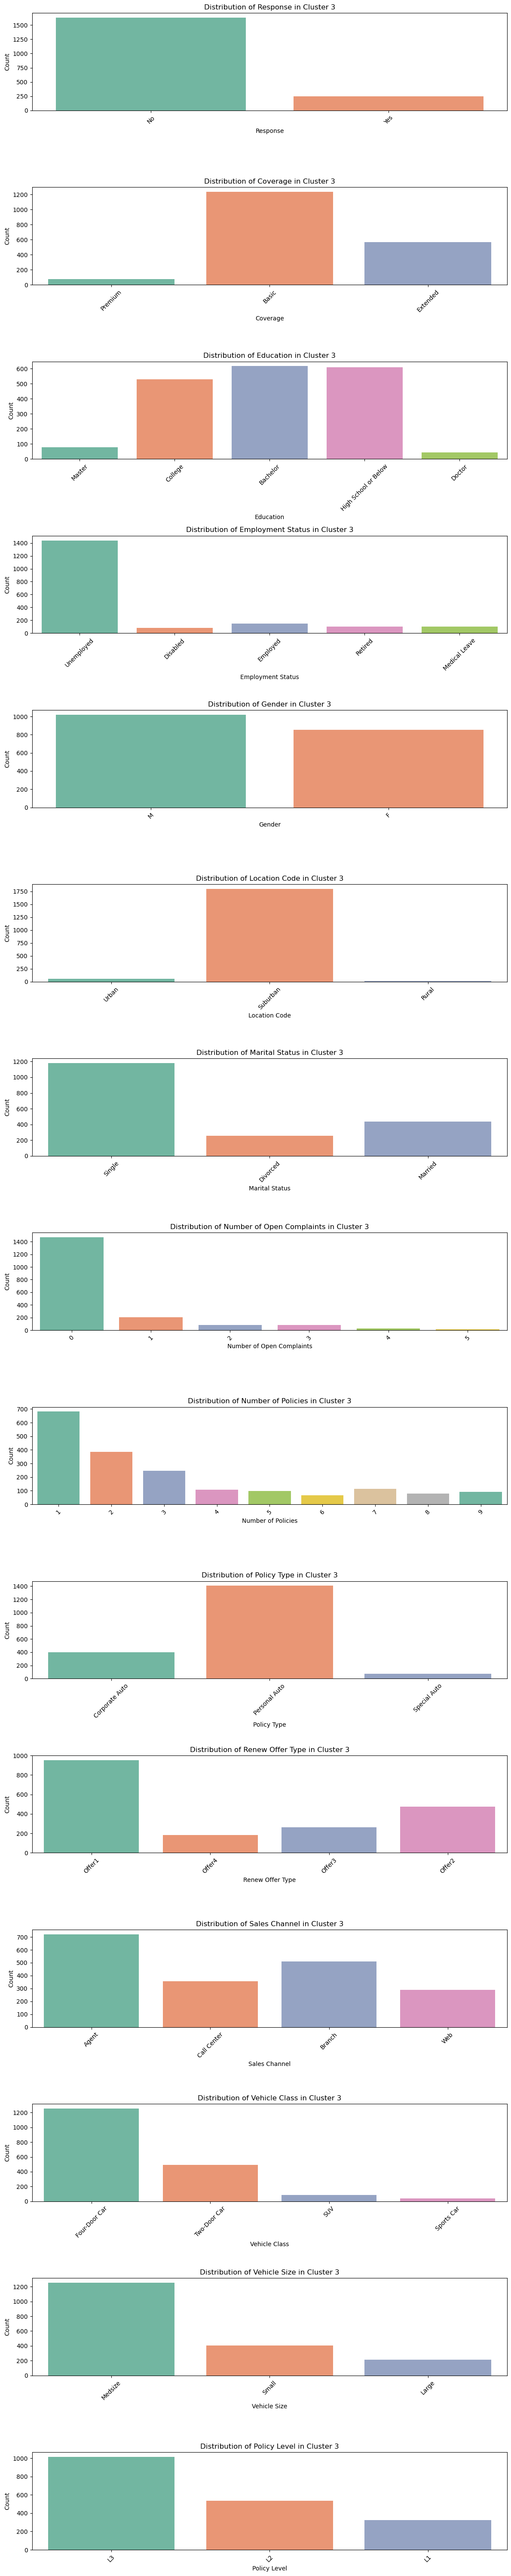

In [583]:
df_cluster_3 = df[df['Cluster'] == 3]

# Set up the figure for subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(12, len(cat_features) * 4))

# Iterate over categorical features and plot count plots
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df_cluster_3, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} in Cluster 3')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 3:
The visualizations provide insights into the distribution of various categorical features within Cluster 3.

Response

Distribution:
No: Approximately 1,300 customers.
Yes: Around 300 customers.
Interpretation: A majority of customers in this cluster have not responded positively to marketing or renewal offers, indicating potential disinterest or contentment with their current plans.
Coverage

Distribution:
Basic: About 1,200 customers.
Extended: Approximately 500 customers.
Premium: Very few customers.
Interpretation: Most customers in this cluster prefer basic coverage, with a smaller portion opting for extended coverage. Premium coverage is almost non-existent, reflecting cost-consciousness.
Education

Distribution:
Bachelor's: Approximately 500 customers.
College: Around 400 customers.
High School or Below: About 400 customers.
Doctor: Very few customers.
Interpretation: Education levels are relatively balanced, with most customers holding a Bachelor’s degree, followed closely by College and High School education levels.
Employment Status

Distribution:
Employed: Around 1,000 customers.
Unemployed/Medical Leave/Disabled/Retired: Very few customers in each of these categories.
Interpretation: The vast majority of this cluster is employed, which suggests some level of economic stability, though the choice of basic coverage indicates a preference for affordability.
Gender

Distribution:
Male: Approximately 800 customers.
Female: Around 700 customers.
Interpretation: The gender distribution is nearly balanced, with a slight male predominance.
Location Code

Distribution:
Suburban: About 1,200 customers.
Urban: Around 400 customers.
Rural: Very few customers.
Interpretation: This cluster is predominantly suburban, with a smaller but notable urban presence.
Marital Status

Distribution:
Married: Approximately 800 customers.
Single: About 400 customers.
Divorced: Around 200 customers.
Interpretation: Most customers in this cluster are married, followed by a significant number of singles, which might influence their insurance needs.
Number of Open Complaints

Distribution:
0 Complaints: Around 1,200 customers.
1 Complaint: Approximately 100 customers.
2 Complaints or More: Very few customers.
Interpretation: The majority of customers have no open complaints, indicating satisfaction with their current insurance or a lack of issues.
Number of Policies

Distribution:
1 Policy: Around 500 customers.
2 Policies: About 200 customers.
3 or More Policies: Smaller numbers across different levels.
Interpretation: Most customers hold a single policy, with fewer holding multiple policies, suggesting limited engagement with the company.
Policy Type

Distribution:
Personal Auto: Predominantly about 1,200 customers.
Corporate Auto: Approximately 300 customers.
Special Auto: Very few customers.
Interpretation: Personal auto policies dominate this cluster, with corporate auto policies being a significant minority.
Renew Offer Type

Distribution:
Offer 1: Approximately 600 customers.
Offer 2: Around 300 customers.
Offer 3: About 400 customers.
Offer 4: Roughly 200 customers.
Interpretation: Renewals are fairly evenly distributed, though Offer 1 is slightly more popular.
Sales Channel

Distribution:
Agent: Approximately 600 customers.
Call Center: Around 300 customers.
Branch: Roughly 400 customers.
Web: About 200 customers.
Interpretation: Customers in this cluster engage with the company primarily through agents, but there is a balanced use of other channels such as call centers and branches.
Vehicle Class

Distribution:
Four-Door Car: Approximately 1,000 customers.
Two-Door Car: Around 300 customers.
SUV: About 200 customers.
Sports Car: Very few customers.
Interpretation: Four-door cars are the most common vehicle class in this cluster, indicating a preference for practical or family-oriented vehicles.
Vehicle Size

Distribution:
Medsize: Approximately 1,200 customers.
Small: Around 300 customers.
Large: About 100 customers.
Interpretation: The majority of vehicles in this cluster are medium-sized, with fewer small or large vehicles.
Policy Level

Distribution:
L3: About 600 customers.
L2: Around 300 customers.
L1: Roughly 400 customers.
Interpretation: Most customers are on the higher policy levels, with L3 being the most common, indicating a preference for more comprehensive coverage.

Summary for Stakeholders:
Cluster 3 is characterized by customers who predominantly prefer basic insurance coverage, with a smaller proportion opting for extended coverage. These customers are mostly employed, married, and live in suburban areas. They tend to engage with the company primarily through agents, though other channels like call centers and branches are also utilized. Most customers in this cluster hold a single policy, with personal auto insurance being the most common.

Given their preference for basic coverage and moderate engagement with the company, these customers are likely cost-conscious but stable. The company could focus on retaining this segment by offering affordable renewal options and emphasizing the value of their current plans. Additionally, there may be opportunities to upsell extended coverage or additional policies to those who demonstrate a higher level of engagement or satisfaction. By targeting personalized offers through the preferred sales channels, the company can enhance customer loyalty and satisfaction within this cluster.

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1257359022.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_3[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local\Temp\ipykernel_17944\1257359022.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cluster_3[col], kde=True, palette='Set2', ax=axes[i, 1])
c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN10\AppData\Local

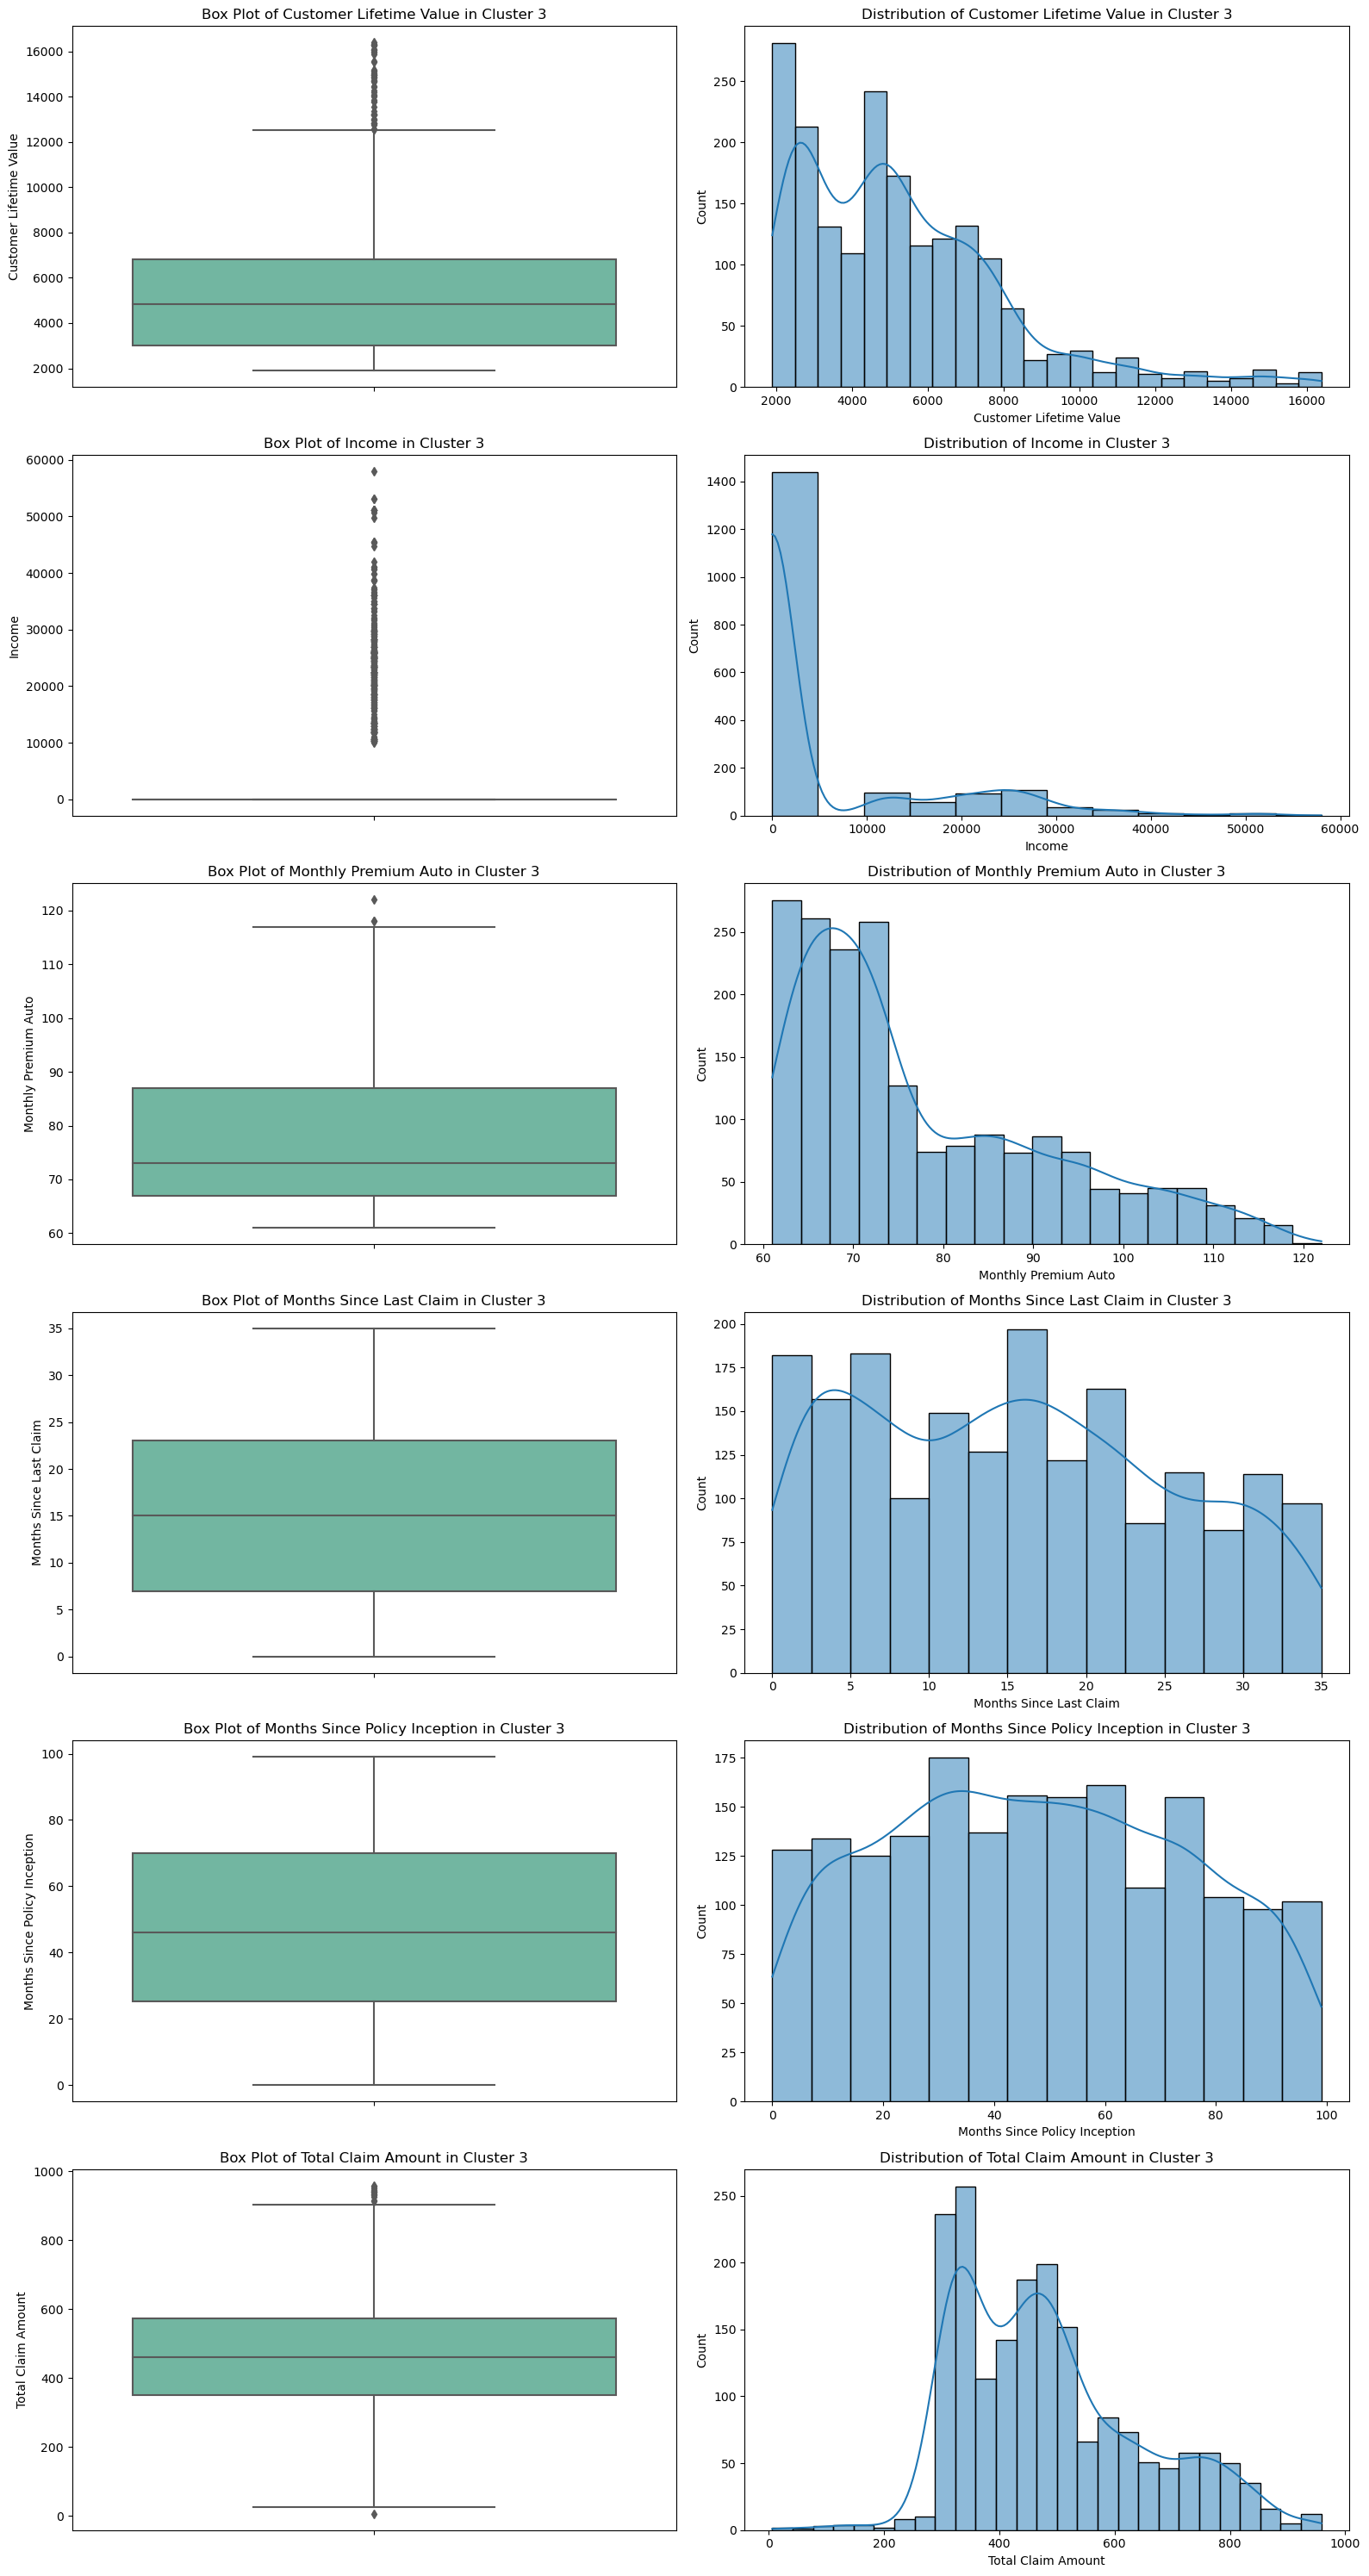

In [584]:
# Set up the figure for subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(16, len(num_features) * 5))

# Iterate over numerical features and plot box plots and histograms
for i, col in enumerate(num_features):
    # Box plot
    sns.boxplot(y=col, data=df_cluster_3, palette='Set2', ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {col} in Cluster 3')
    axes[i, 0].set_ylabel(col)
    
    # Histogram
    sns.histplot(df_cluster_3[col], kde=True, palette='Set2', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col} in Cluster 3')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Detailed Analysis of Cluster 3:
The visualizations provide insights into the distribution of several key numerical features within Cluster 3.

### Customer Lifetime Value (CLV)

Box Plot:
Median CLV: Approximately 4000.
Interquartile Range (IQR): The middle 50% of the data ranges between approximately 3000 and 6000.
Outliers: There are outliers extending beyond 14000, with the maximum value close to 16000.

Distribution:
The distribution shows that most customers in this cluster have a CLV between 2000 and 6000, with a peak around 3000-4000. The frequency decreases as CLV increases, indicating fewer high-value customers.
Interpretation: Cluster 3 is characterized by customers with lower CLV, reflecting their tendency to engage less financially with the company.

### Income

Box Plot:
Median Income: Approximately 0, with the majority of customers having little to no recorded income.
Interquartile Range (IQR): The middle 50% of the data ranges from 0 to 10,000, with outliers extending to 60,000.
Outliers: The income distribution includes a significant number of outliers, with incomes extending up to 60,000.

Distribution:
The income distribution is heavily skewed towards 0, with a very high frequency of customers having no recorded income. A smaller portion of customers has moderate income levels.
Interpretation: Many customers in Cluster 3 have very low or unrecorded income, which likely contributes to their preference for basic coverage and lower CLV.

### Monthly Premium Auto

Box Plot:
Median Premium: Approximately 80.
Interquartile Range (IQR): The middle 50% of the data ranges between 70 and 90.
Outliers: There are some outliers, with premiums extending beyond 120.

Distribution:
The distribution shows a peak around 70-80, with fewer customers paying higher premiums.
Interpretation: Most customers in this cluster pay lower monthly premiums, reflecting their preference for basic coverage.

### Months Since Last Claim

Box Plot:
Median: Approximately 15 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 7 and 25 months.
Outliers: Minimal outliers suggest consistent behavior across the cluster.

Distribution:
The distribution is somewhat uniform, with peaks around 0-5 months and a gradual decline thereafter.
Interpretation: Customers in this cluster make claims somewhat regularly, with most having made a claim within the last 15 months.

### Months Since Policy Inception

Box Plot:
Median: Approximately 50 months.
Interquartile Range (IQR): The middle 50% of the data ranges between 25 and 75 months.
Outliers: No significant outliers, indicating that most customers have similar policy tenure.

Distribution:
The distribution is fairly even, with a slight skew towards shorter policy durations but a significant number of longer-term customers.
Interpretation: This cluster includes a mix of newer and longer-term customers, with a tendency towards moderate policy durations.

### Total Claim Amount

Box Plot:
Median: Approximately 400.
Interquartile Range (IQR): The middle 50% of the data ranges between 200 and 600.
Outliers: Some outliers extend beyond 800, with a few claims exceeding 900.

Distribution:
The distribution shows a peak around 300-400, with a long tail extending to higher claim amounts.
Interpretation: The total claim amounts for this cluster are generally moderate, with a few higher claims indicating occasional high-cost events.

### Summary for Stakeholders:
Cluster 3 consists of customers who generally have lower Customer Lifetime Value (CLV) and prefer basic insurance coverage. The median CLV is around 4000, with most customers falling between 2000 and 6000. A significant number of these customers have low or unrecorded income, which likely influences their preference for more affordable, lower-premium policies.

This cluster also includes a mix of newer and longer-term customers, with a median policy duration of around 50 months. While they do make claims somewhat regularly, the total claim amounts are typically moderate, reflecting their lower overall engagement with the company.

### Data Preprocessing continue

Remember the missing values in the 'Income' column? Here, we will replace those missing values with NaN and then fill them using the Iterative Imputer.

In [497]:
# Converting '0' values in the 'Income' column to NaN
X_train['Income'] = X_train['Income'].replace([0], np.nan)

In [503]:
X_train['Income'].isna().sum()

1514

In [555]:
df.head()

Customer       State  Customer Lifetime Value Response Coverage Education  \
0  BU79786  Washington              2763.519279       No    Basic  Bachelor   
2  AI49188      Nevada             12887.431650       No  Premium  Bachelor   
3  WW63253  California              7645.861827       No    Basic  Bachelor   
4  HB64268  Washington              2813.692575       No    Basic  Bachelor   
5  OC83172      Oregon              8256.297800      Yes    Basic  Bachelor   

  Effective To Date Employment Status Gender  Income Location Code  \
0           2/24/11          Employed      F   56274      Suburban   
2           2/19/11          Employed      F   48767      Suburban   
3           1/20/11        Unemployed      M       0      Suburban   
4          3/2/2011          Employed      M   43836         Rural   
5           1/25/11          Employed      F   62902         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   

   Months Since Policy Inception Number of Open Complaints Number of Policies  \
0                              5                         0                  1   
2                             38                         0                  2   
3                             65                         0                  7   
4                             44                         0                  1   
5                             94                         0                  2   

      Policy Type Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate Auto           Offer1         Agent          384.811147   
2   Personal Auto           Offer1         Agent          566.472247   
3  Corporate Auto           Offer1   Call Center          529.881344   
4   Personal Auto           Offer1         Agent          138.130879   
5   Personal Auto           Offer2           Web          159.383042   

   Vehicle Class Vehicle Size Policy Level  Cluster  
0   Two-Door Car      Medsize           L3        1  
2   Two-Door Car      Medsize           L3        2  
3            SUV      Medsize           L2        2  
4  Four-Door Car      Medsize           L1        1  
5   Two-Door Car      Medsize           L3        0

In [563]:
df.shape

(7850, 25)

In [557]:
df.to_csv('Cluster.csv')

We have successfully replaced all missing values in the 'Income' column with NaN. This will make it easier for us when using the iterative imputer later.

### **4. Modeling**

**Cross Validation**

At this stage, we can determine the most suitable machine learning model or algorithm to predict CLV based on the dataset we have. Here is a list of algorithms for cross-validation:
- Linear Regression
- Lasso Regression
- Ridge Regression
- K Nearest Neighbor
- Decision Tree
- Random Forest
- Ada Boost
- Gradien Boost
- XGBoost

In [504]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, KFold

Let's create benchmark models for cross-validation.

In [505]:
lr = LinearRegression()
lasso = Lasso(alpha = 1, random_state=0)
ridge = Ridge(random_state=0)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ab = AdaBoostRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

models = [lr, lasso, ridge, knn, dt, rf, ab, gb, xgb]

List of evaluation metrics to be used for the cross-validation process in the scoring parameter:
- MSE
- RMSE
- MAE
- MAPE

In [506]:
eval_metric = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error',
    'r2': 'r2'}


In [507]:
list_MSE = []
list_mean_MSE = []
list_std_MSE = []

list_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []

list_MAE = []
list_mean_MAE = []
list_std_MAE = []

list_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

list_R2 = []
list_mean_R2 = []
list_std_R2 = []

list_adj_R2 = []
list_mean_adj_R2 = []
list_std_adj_R2 = []

for algo in models:
    pipe_model = Pipeline([
        ('transformer', transformer),
        ('algo', algo)
    ])

    # Cross validation to find the best model
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= eval_metric,
        cv = 5
    )
    # MSE Score
    list_MSE.append(cv_score['test_mse'])
    list_mean_MSE.append(cv_score['test_mse'].mean())
    list_std_MSE.append(cv_score['test_mse'].std())

    # RMSE Score
    list_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    list_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    list_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

    # R2 Score
    r2_scores = cv_score['test_r2']
    n = len(X_train)
    k = X_train.shape[1]
    adj_r2_scores = [1 - ((1 - r2) * (n - 1) / (n - k - 1)) for r2 in r2_scores]

    list_R2.append(cv_score['test_r2'])
    list_mean_R2.append(cv_score['test_r2'].mean())
    list_std_R2.append(cv_score['test_r2'].std())

    # Adjusted R2 Score
    list_adj_R2.append(adj_r2_scores)
    list_mean_adj_R2.append(np.mean(adj_r2_scores))
    list_std_adj_R2.append(np.std(adj_r2_scores))



c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

In [509]:
df_cross_val = pd.DataFrame({
    'algo':models,

    'rmse_mean':list_mean_RMSE,
    'rmse_std':list_std_RMSE,
    'rmse_all':list_RMSE,

    'adj_r2_mean': list_mean_adj_R2,
    'adj_r2_std': list_std_adj_R2,
    'adj_r2_all': list_adj_R2

}).sort_values('rmse_mean', ascending=False)

df_cross_val

algo    rmse_mean   rmse_std  \
7          GradientBoostingRegressor(random_state=0)  -801.373962  59.145599   
5              RandomForestRegressor(random_state=0)  -810.527822  63.134702   
8  XGBRegressor(base_score=None, booster=None, ca...  -859.175646  64.187918   
4              DecisionTreeRegressor(random_state=0) -1123.431990  49.400188   
6                  AdaBoostRegressor(random_state=0) -1185.025388  74.954473   
1                     Lasso(alpha=1, random_state=0) -2711.229505  89.952922   
2                              Ridge(random_state=0) -2711.973756  89.569800   
0                                 LinearRegression() -2712.034410  89.562589   
3                              KNeighborsRegressor() -2728.795963  83.721006   

                                            rmse_all  adj_r2_mean  adj_r2_std  \
7  [-758.6009160883134, -782.0634773217546, -728....     0.933280    0.008678   
5  [-791.65661151449, -774.4007743283096, -731.77...     0.931836    0.008350   
8  [-847.2098244313979, -814.4844449000119, -785....     0.923469    0.008525   
4  [-1187.3098435580837, -1115.9719518502088, -10...     0.869021    0.011331   
6  [-1086.9326142868663, -1155.1199310303227, -11...     0.854284    0.015353   
1  [-2697.259833439771, -2673.2155077758284, -267...     0.239295    0.007843   
2  [-2698.359662912357, -2674.010606778925, -2671...     0.238871    0.007787   
0  [-2698.445982920456, -2674.155903882304, -2671...     0.238837    0.007759   
3  [-2761.6833277234, -2651.1732464525658, -2721....     0.229052    0.020918   

                                          adj_r2_all  
7  [0.9401605783303493, 0.9357772978656633, 0.943...  
5  [0.9348320066903866, 0.9370296478309282, 0.942...  
8  [0.9253649843001126, 0.9303421358320788, 0.934...  
4  [0.8534152472883734, 0.8692290966081815, 0.884...  
6  [0.8771526188919008, 0.8598933593881191, 0.858...  
1  [0.24350470362301602, 0.24963510337942574, 0.2...  
2  [0.24288764371421845, 0.24918867240104958, 0.2...  
0  [0.2428392031812866, 0.24910707685716815, 0.24...  
3  [0.2069356676848404, 0.2619585012263256, 0.211...

From the cross-validation results above, it turns out that the best machine learning model or algorithm for our data is random forest (to determine the best model, We look at the smallest average RMSE).

### **Hyperparameter Tuning**

In [510]:
from scipy.stats import uniform, randint

In [511]:
# Define hyperparameter space
hyperparam_space = {
    'modeling__n_estimators': randint(10, 1001),
    'modeling__learning_rate': uniform(0.01, 0.29),
    'modeling__subsample': uniform(0.5, 0.5),
    'modeling__max_depth': randint(2, 31),
    'modeling__min_samples_split': randint(2, 21),
    'modeling__min_samples_leaf': randint(1, 11),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.1, 1.1, 0.1)),
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gb)
    ])

# Define cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=0)

randomsearchgb1 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=crossval,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=50,
    random_state=0
)

randomsearchgb1.fit(X_train, y_train)

c:\Users\WIN10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WIN10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WIN10\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\WIN10\anaconda3\lib\site-packages\sklearn\pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Use

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_standard',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Incom...
                                        'modeling__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014245948F70>,
                                        'modeling__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000142589CC160>,
                                        'modeling__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014246223550>},
                   random_state=0, scoring='neg_root_mean_squared_error')

After we perform tuning, let's check the best hyperparameters.

In [512]:
# Extract the best parameters
list_resultgb1 = []

for param in hyperparam_space:
    result = randomsearchgb1.best_params_.get(param)
    list_resultgb1.append(result)

# Append the best score
list_resultgb1.append(randomsearchgb1.best_score_)

# Define the parameters list in the correct order
parameter_names = [
    'modeling__n_estimators',
    'modeling__min_samples_split',
    'modeling__min_samples_leaf',
    'modeling__max_features',
    'modeling__max_depth',
    'modeling__learning_rate',
    'modeling__subsample',
    'RMSE'
]

# Create the DataFrame
df_randomsearch_gb_result1 = pd.DataFrame({
    'Parameter': parameter_names,
    'Best Result': list_resultgb1
})

df_randomsearch_gb_result1

Parameter  Best Result
0       modeling__n_estimators   988.000000
1  modeling__min_samples_split     0.112674
2   modeling__min_samples_leaf     0.948273
3       modeling__max_features     3.000000
4          modeling__max_depth     5.000000
5      modeling__learning_rate     9.000000
6          modeling__subsample     0.300000
7                         RMSE  -812.833687

---
From the cross-validation, hyperparameter tuning, and randomized search results, the best model is __random forest__ with the following hyperparameters:

In [513]:
randomsearchgb1.best_score_

-812.833687201575

In [514]:
randomsearchgb1.best_params_

{'modeling__learning_rate': 0.11267353200430494,
 'modeling__max_depth': 3,
 'modeling__max_features': 0.30000000000000004,
 'modeling__min_samples_leaf': 9,
 'modeling__min_samples_split': 5,
 'modeling__n_estimators': 988,
 'modeling__subsample': 0.9482732979255315}

__*Gradient Boosting Regressor*__ is a machine learning model used for predicting numerical values by building an ensemble of decision trees in a sequential manner. Unlike Random Forest, where trees are built independently, Gradient Boosting builds each tree to correct the errors of the previous ones. This approach allows the model to focus on difficult-to-predict data points, resulting in improved accuracy. The final prediction is obtained by summing the predictions of all trees, weighted by the learning rate, which controls the contribution of each tree.

While __*Gradient Boosting Regressor*__ often achieves high predictive performance, it comes with certain trade-offs. The sequential nature of tree-building can lead to longer training times, especially with large datasets. Additionally, the model is more sensitive to hyperparameters like learning rate and the number of trees, making it prone to overfitting if not properly tuned. To mitigate these issues, the learning rate can be reduced, and the number of trees (n_estimators) can be adjusted to balance performance and computational efficiency.

---
Predict on the test set before tuning (using the benchmark model).

In [516]:
model = RandomForestRegressor(random_state=0)

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
    ])

pipe_model.fit(X_train, y_train)

y_pred_before = pipe_model.predict(X_test)

RMSE_before = MSE_before ** 0.5
R2_before = r2_score(y_test, y_pred_before)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
k = X_train.shape[1]  # Number of predictors
Adj_R2_before = 1 - ((1 - R2_before) * (n - 1) / (n - k - 1))

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Predict on the test set after tuning (using the model with the best hyperparameters).

In [564]:
model = randomsearchgb1.best_estimator_

model.fit(X_train, y_train)

y_pred_after = model.predict(X_test)

RMSE_after = MSE_after ** 0.5
R2_after = r2_score(y_test, y_pred_after)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
k = X_train.shape[1]  # Number of predictors
Adj_R2_after = 1 - ((1 - R2_after) * (n - 1) / (n - k - 1))


c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Let's create a table that compares the performance of the model before and after the tuning process.

In [518]:
df_compare = pd.DataFrame({
    'Condition':['Before tuning', 'After tuning'],
    'RMSE': [RMSE_before, RMSE_after],
    'Adjusted R2': [Adj_R2_before, Adj_R2_after]
})

df_compare

Condition        RMSE  Adjusted R2
0  Before tuning  911.848630     0.914896
1   After tuning  911.488887     0.914963

The model shows improved performance (reduced values of MAPE, MAE, MSE, and RMSE) after hyperparameter tuning, although only slightly.
- Before tuning:    
    - RMSE = 911.85
    - Adjusted R2 = 91.48%
<br><br>
- After tuning:
    - RMSE = 911.49
    - Adjusted R2 = 91.49%

Let's check for overfitting/underfitting.

In [519]:
y_train_pred = model.predict(X_train)
y_pred_after = model.predict(X_test)

# Calculate RMSE for training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_after, squared=False)

# Print the RMSE values
print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

# Interpretation
if rmse_train < rmse_test:
    print("The model is likely overfitting.")
elif rmse_train > rmse_test:
    print("The model is likely underfitting.")
else:
    print("The model seems to generalize well.")

Training RMSE: 628.9391745328143
Test RMSE: 911.488886587277
The model is likely overfitting.


c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Let's create a scatterplot to visualize the comparison between the actual CLV and the predicted CLV by the model.

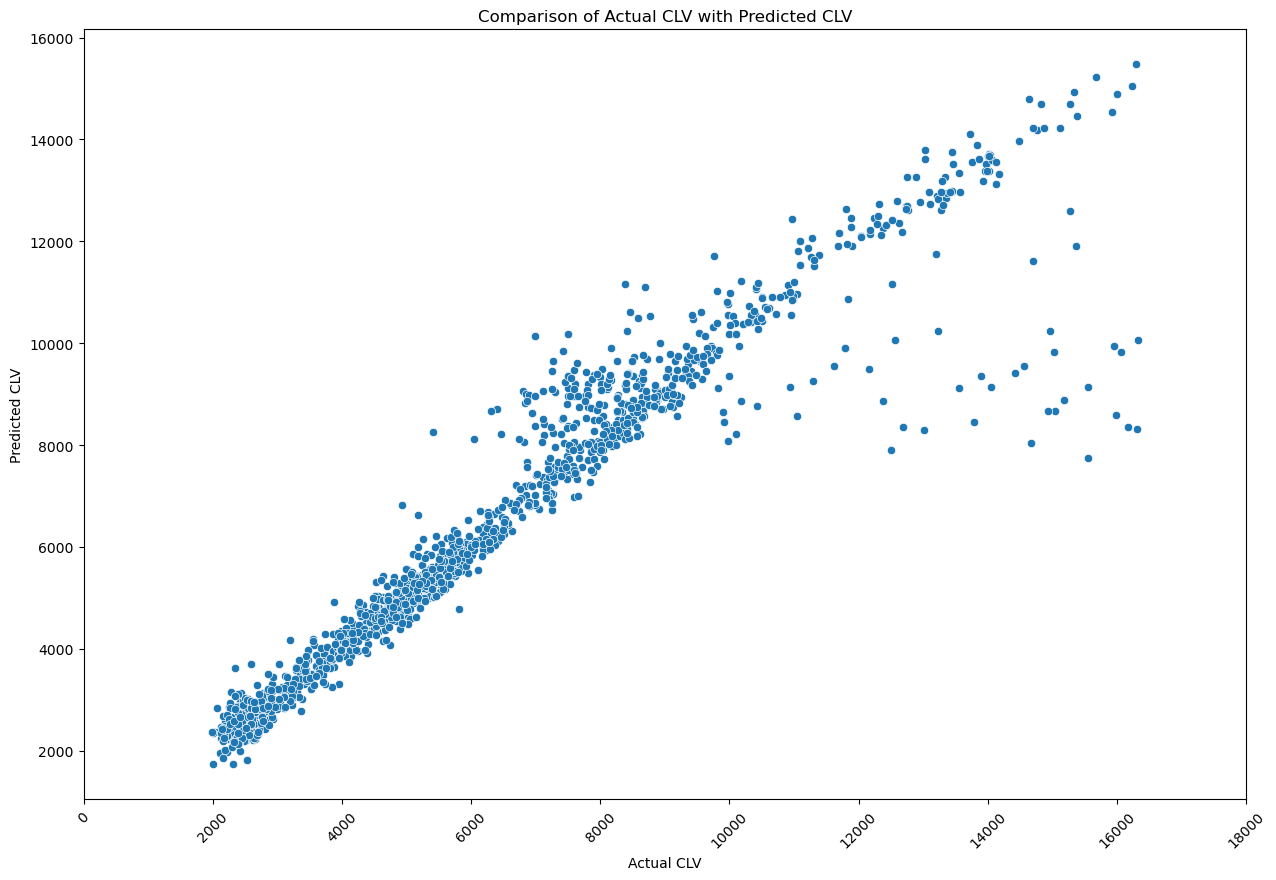

In [520]:
plt.figure(figsize=(15,10))
plot = sns.scatterplot(x=y_test, y=y_pred_after).set(title='Comparison of Actual CLV with Predicted CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')
plt.xticks(ticks=range(0,18001,2000), rotation=45)
plt.show()

Alignment Along the Diagonal: The points closely align along the diagonal line, indicating that the predicted values are generally close to the actual values. This suggests that our model is performing well in predicting CLV.

Clusters of Points: There are some clusters of points where the actual and predicted values are very close, especially in the range between 4,000 and 8,000 CLV. This indicates that the model is particularly accurate for this range of values.

Deviations: There are some points that deviate from the diagonal, particularly in the higher range of CLV (above 10,000). These points represent instances where the model's predictions are less accurate, either underestimating or overestimating the actual CLV.

Outliers: There are a few outliers, particularly where the predicted values are significantly higher than the actual values. These outliers could be a result of model bias or noise in the data.

The presence of large error values creates a significant difference between the RMSE and MAE values. This can also be observed in the scatterplot above, where there are instances of actual CLV being low but predicted much higher (overestimation), and vice versa (underestimation).

From the scatterplot above, we can observe that for lower CLV values, the model tends to be more accurate in predicting customer CLV. However, as the actual CLV values increase, the model's predictions become less accurate. This is a limitation of the model.

In [561]:
df.shape

(7850, 25)

In [566]:
predicted_clv = model.predict(X)

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [567]:
df['Predicted_CLV'] = predicted_clv

In [568]:
df.head()

Customer       State  Customer Lifetime Value Response Coverage Education  \
0  BU79786  Washington              2763.519279       No    Basic  Bachelor   
2  AI49188      Nevada             12887.431650       No  Premium  Bachelor   
3  WW63253  California              7645.861827       No    Basic  Bachelor   
4  HB64268  Washington              2813.692575       No    Basic  Bachelor   
5  OC83172      Oregon              8256.297800      Yes    Basic  Bachelor   

  Effective To Date Employment Status Gender  Income Location Code  \
0           2/24/11          Employed      F   56274      Suburban   
2           2/19/11          Employed      F   48767      Suburban   
3           1/20/11        Unemployed      M       0      Suburban   
4          3/2/2011          Employed      M   43836         Rural   
5           1/25/11          Employed      F   62902         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   

   Months Since Policy Inception Number of Open Complaints Number of Policies  \
0                              5                         0                  1   
2                             38                         0                  2   
3                             65                         0                  7   
4                             44                         0                  1   
5                             94                         0                  2   

      Policy Type Renew Offer Type Sales Channel  Total Claim Amount  \
0  Corporate Auto           Offer1         Agent          384.811147   
2   Personal Auto           Offer1         Agent          566.472247   
3  Corporate Auto           Offer1   Call Center          529.881344   
4   Personal Auto           Offer1         Agent          138.130879   
5   Personal Auto           Offer2           Web          159.383042   

   Vehicle Class Vehicle Size Policy Level  Cluster  Predicted_CLV  
0   Two-Door Car      Medsize           L3        1    2908.738766  
2   Two-Door Car      Medsize           L3        2   13013.622960  
3            SUV      Medsize           L2        2    7618.537410  
4  Four-Door Car      Medsize           L1        1    2911.377396  
5   Two-Door Car      Medsize           L3        0    8648.149087

In [569]:
df.to_csv('Prediction.csv')

---
Let's see which features are most important in determining the CLV of a customer.

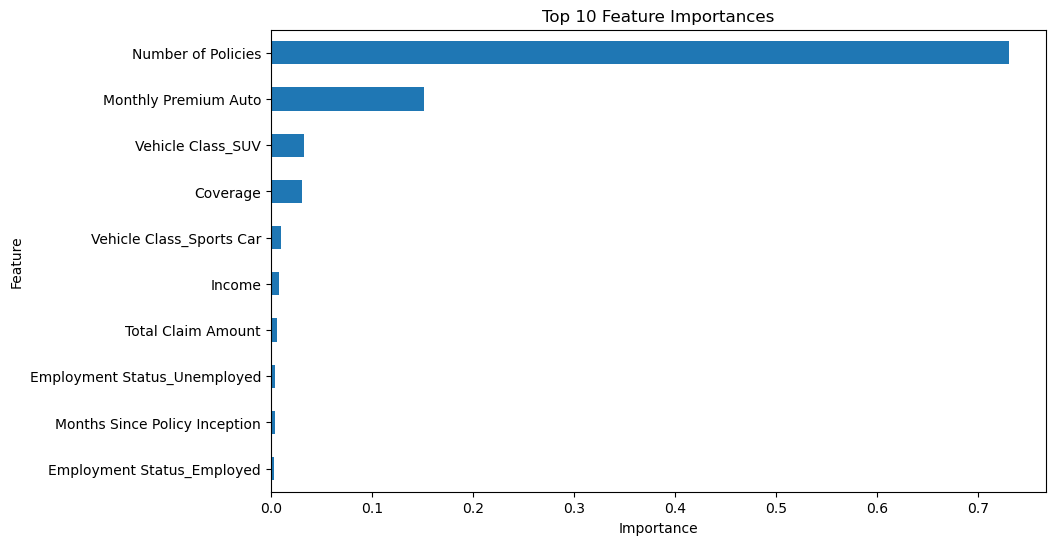

In [521]:
# Create a Series with feature importances and feature names
feature_imp = pd.Series(data=randomsearchgb1.best_estimator_['modeling'].feature_importances_,
                        index=transformer.get_feature_names_out())

# Clean the feature names by removing prefixes
cleaned_feature_imp = feature_imp.rename(index=lambda x: x.replace('pipe_iterative_standard__', '')
                                                    .replace('ordinal_encoder__', '')
                                                    .replace('onehot_encoder__', ''))

# Select the top N most important features
N = 10  # You can change this value based on your preference
top_features = cleaned_feature_imp.sort_values(ascending=True).tail(N)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', title=f'Top {N} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

1. Number of Policies: This feature stands out as the most important predictor for CLV, indicating that the more policies a customer holds, the higher their expected lifetime value.

2. Monthly Premium Auto: The amount that a customer pays monthly for auto insurance also plays a significant role, with higher premiums generally associated with a higher CLV.

3. Vehicle Class (SUV and Sports Car): The type of vehicle, particularly if it's an SUV or a sports car, contributes to the prediction of CLV. Customers with these types of vehicles might have different risk profiles or needs, influencing their CLV.

4. Coverage: The type of insurance coverage (e.g., basic, extended, premium) is another key factor. Customers opting for more comprehensive coverage might be seen as higher-value clients.

5. Income: While income is also important, it's less so than the other features mentioned. This suggests that while income might be correlated with CLV, it's not as strong a predictor as the number of policies or the monthly premium.

6. Total Claim Amount: The total amount of claims made by a customer has a smaller but still notable impact on predicting CLV. This could be related to how much a customer utilizes their insurance.

7. Employment Status: Whether a customer is employed or unemployed also has some influence on CLV, though it's among the lower-ranked features in this top 10 list.


It turns out, the most important feature in determining the CLV of a customer is Number of Policies (the number of insurance policies owned by the customer) followed by Montly Premium Auto and Vehicle Class_SUV.

In [522]:
# models
import shap
shap.initjs()

In [523]:
# Fit and transform the data
transformed_data_test = transformer.fit_transform(X_test)
transformed_data_test

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

array([[-0.77287788, -0.26889917, -0.20545054, ..., -0.26266767,
        -0.42433099, -0.8331254 ],
       [ 2.40626325,  1.40403615, -0.17857621, ..., -0.26266767,
        -0.42433099, -0.8331254 ],
       [-0.81895239, -0.56420201,  1.10951872, ..., -0.26266767,
        -0.42433099, -0.42050493],
       ...,
       [-0.31213279, -1.6157996 ,  0.28193407, ...,  0.67033741,
         2.82014785, -0.42050493],
       [ 0.97795347,  0.15868318, -0.22782391, ...,  0.67033741,
        -0.42433099, -0.00788447],
       [ 2.17589071,  1.28280895,  0.21721229, ..., -1.19567275,
        -0.42433099, -0.42050493]])

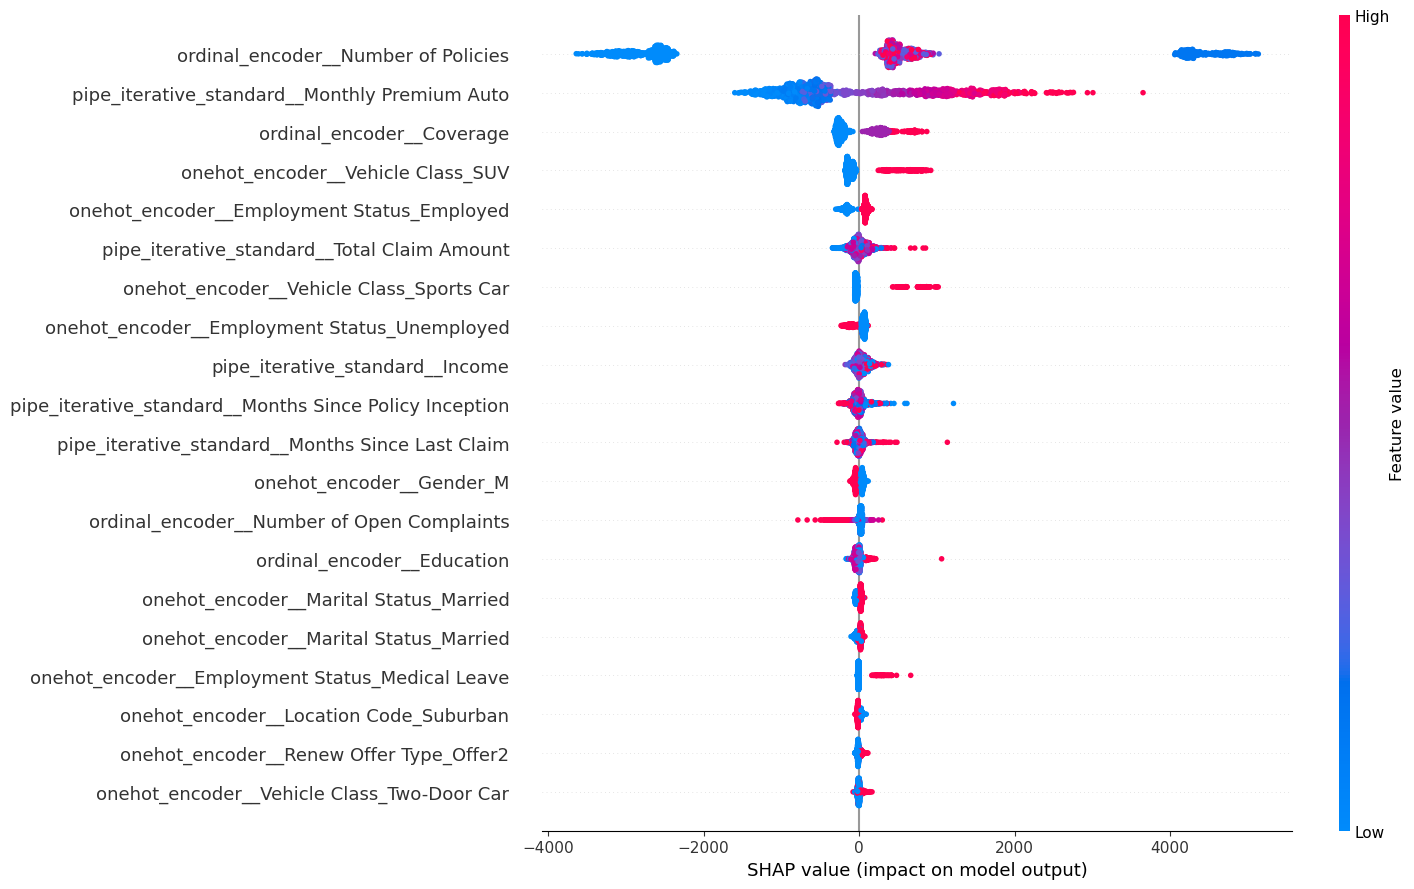

In [524]:
# Calculate SHAP values
explainer = shap.TreeExplainer(randomsearchgb1.best_estimator_['modeling'])

# Calculate SHAP values with the transformed dataset
shap_values = explainer(transformed_data_test)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, transformed_data_test, feature_names=transformer.get_feature_names_out(), plot_size=[15,9])

1. Number of Policies: As before, this feature is the most significant, having a substantial impact on the model's predictions, with higher values generally increasing the predicted CLV.

2. Monthly Premium Auto: This feature also has a notable impact, where higher premiums tend to increase the predicted CLV.

3. Coverage: The type of coverage a customer has (e.g., basic, extended, premium) also significantly influences CLV.

4. Months Since Policy Inception:
- Position: This feature is present in the plot but ranked lower in terms of its overall impact.
- Impact: While it does influence the model's predictions, its effect is relatively smaller compared to the top features. The plot shows that both high and low values of "Months Since Policy Inception" can slightly increase or decrease the CLV prediction, but not as dramatically as the top features.

5. Total Claim Amount, Income, and Others: These features, along with "Months Since Last Claim," have moderate to low impacts, indicating that while they contribute to the model, they aren't as critical as the top features.

In [525]:
explanation = shap.Explanation(shap_values[99], 
                               base_values=explainer.expected_value,
                               feature_names=transformer.get_feature_names_out())

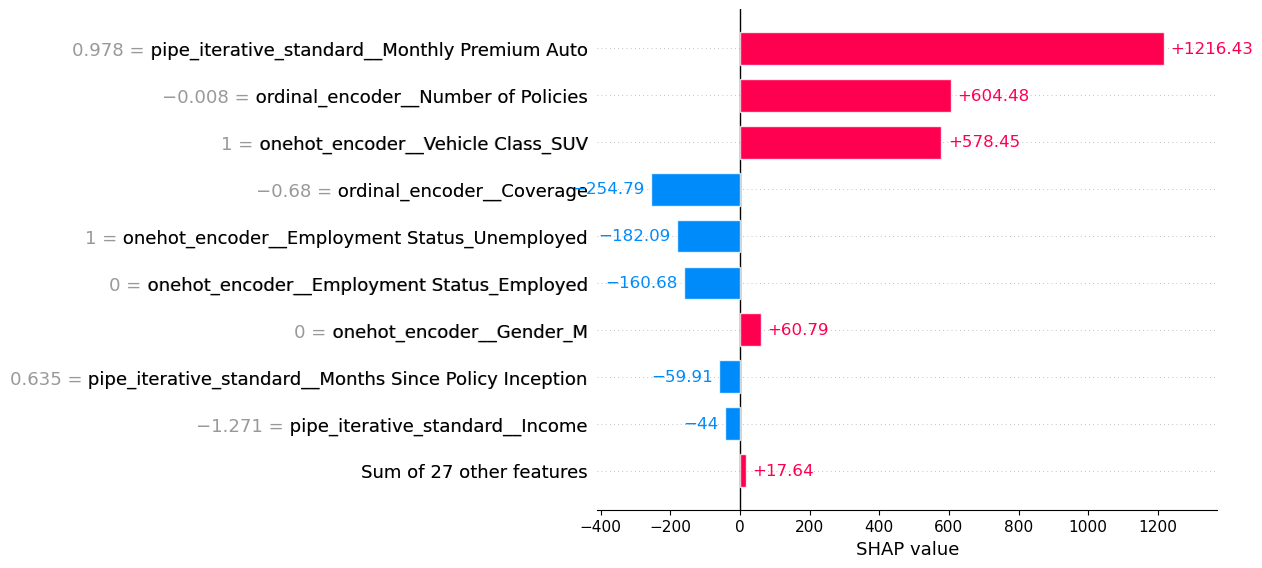

In [526]:
shap.plots.bar(explanation)

Key Points from the SHAP Bar Plot:

1. Top Influential Features:
- Monthly Premium Auto has the highest positive impact on the prediction, increasing the predicted CLV by approximately 1216.43 units.
- Number of Policies and Vehicle Class (SUV) are also significant positive contributors, with SHAP values of around +604.48 and +578.45, respectively.

2. Negative Contributions:
- Employment Status (Unemployed) has a strong negative impact on the predicted CLV, decreasing it by approximately -182.09 units.
- Coverage and Employment Status (Employed) also decrease the predicted CLV, though to a lesser extent.

3. Months Since Policy Inception:
- This feature has a negative SHAP value of approximately -59.91. This indicates that, for this specific prediction, the "Months Since Policy Inception" slightly decreases the predicted CLV. Although it is not as influential as some other features, it still plays a role in shaping the model's output.

4. Understanding the Impact:
- The plot shows how each feature either increases or decreases the prediction from the base value (expected value). The longer the bar, the more influential the feature is for this particular prediction.
- Features like Income and Gender (Male) also contribute but with smaller impacts compared to the top features.

Insights:
- Monthly Premium Auto: Customers paying higher premiums are predicted to have a higher CLV, which makes sense as they contribute more financially.
- Number of Policies: More policies correlate with higher CLV, likely due to increased engagement and value from the customer.
- Employment Status (Unemployed): Being unemployed negatively impacts CLV, possibly due to lower financial stability or reduced spending power.

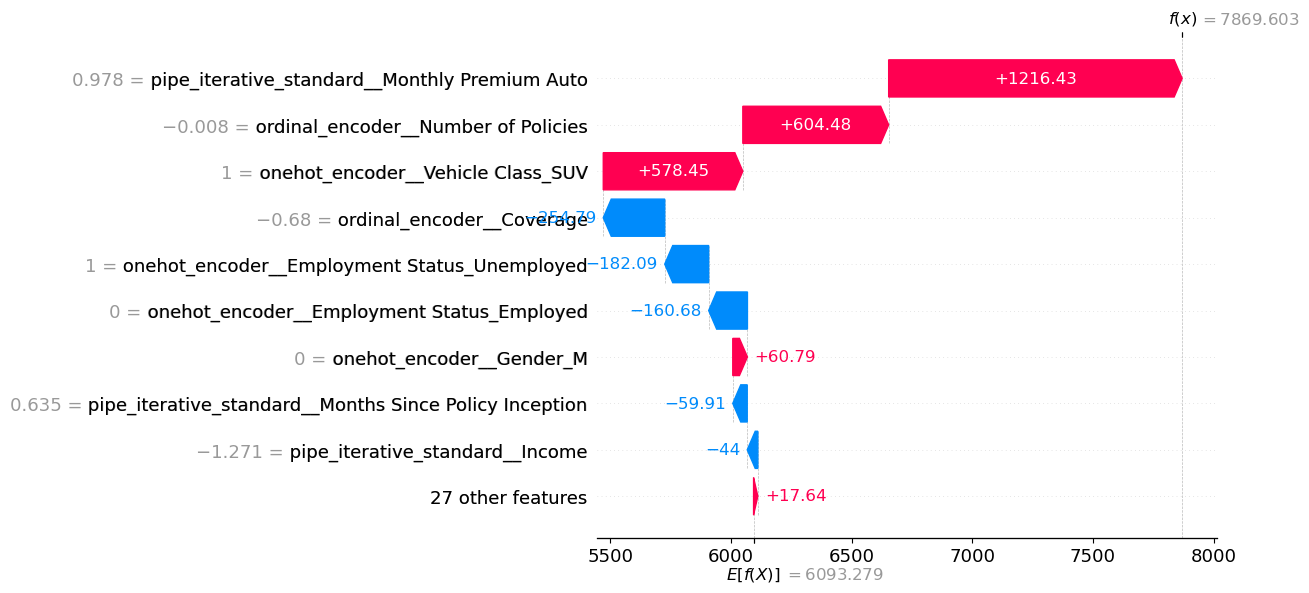

In [527]:
shap.plots.waterfall(explanation)

- Base Value (𝐸[𝑓(𝑋)]E[f(X)]): This is the average model prediction across all samples, which is shown here as 6093.279. This is the starting point for the SHAP value calculation.
- Feature Contributions: Each feature contributes either positively or negatively to adjust the base value to reach the final predicted value. In your plot:
- Monthly Premium Auto increases the predicted CLV by a substantial amount (+1216.43), making it the most influential feature.
- Number of Policies and Vehicle Class (SUV) also significantly increase the predicted CLV, with contributions of +604.48 and +578.45, respectively.
- On the other hand, features like Employment Status (Unemployed) and Employment Status (Employed) have negative contributions, decreasing the predicted CLV by -182.09 and -160.68, respectively.
- Months Since Policy Inception also slightly decreases the CLV by -59.91.
Final Model Output (𝑓(𝑋)f(X)): The sum of the base value and the contributions of all features gives the final model prediction, which is 7869.603 in this case.

Insights:
- High Impact Features: Features with the largest bars have the most influence on the prediction. In this case, Monthly Premium Auto has the greatest positive impact, indicating that customers with higher monthly premiums are predicted to have a higher CLV.
- Negative Contributions: Employment Status (Unemployed) and Coverage reduce the predicted CLV, which might suggest that unemployed customers or those with certain coverage types tend to have lower CLVs.
- Balancing Effects: Some features have small or negligible impacts, but when combined, they can still slightly alter the final prediction.

### **5. Conclusion**

Let's test our model on one of the customers from company A. Here, I will choose the customer ranked 8116 from the original dataset with the following feature details:

In [528]:
# Selecting one customer data for testing.
df_testing = X_test.head(3)
customerA = df_testing.tail(1)
customerA

Response Coverage Education Employment Status Gender  Income  \
8116       No    Basic   College          Employed      F   72462   

     Location Code Marital Status  Monthly Premium Auto  \
8116         Urban        Married                    68   

      Months Since Last Claim  Months Since Policy Inception  \
8116                        8                             70   

     Number of Open Complaints Number of Policies    Policy Type  \
8116                         0                  2  Personal Auto   

     Renew Offer Type Sales Channel  Total Claim Amount Vehicle Class  \
8116           Offer2   Call Center          272.737308  Two-Door Car   

     Vehicle Size Policy Level  
8116      Medsize           L3

In [529]:
# Testing the model to find the predicted CLV value for customer A
best_model = randomsearchgb1.best_estimator_

best_model.fit(X_train, y_train)

clv_customerA_prediction = model.predict(customerA)
clv_customerA_prediction

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

array([9145.09192613])

In [530]:
# Finding the actual CLV value for customer A
clv_customerA_actual = df['Customer Lifetime Value'].iloc[236]
clv_customerA_actual

6847.1189

We can conclude that the predicted CLV for customer A is 9145.09 with an error of approximately ±911.49 (the best RMSE value obtained from the modeling process). Therefore, the possible range of predicted CLV for customer A is between 8233.6 and 10056.58. However, upon checking, the actual CLV value for customer A is 6847.12, which differs significantly from our prediction.

---
Based on the modeling conducted, the feature 'Number of Policies' emerges as the most influential factor affecting 'Customer Lifetime Value' (CLV).

The evaluation metric used for the model is RMSE (Root Mean Squared Error). With an RMSE value of ±911.49 obtained after hyperparameter tuning, we can infer that if this model were used to estimate CLV for new customers at company A within the trained range of values (obtained from df.describe(include='all') function):

- 'Number of Policies' ranges from 1 to 9
- 'Number of Open Complaints' ranges from 0 to 5
- 'Monthly Premium Auto' ranges from 61 to 171
- 'Total Claim Amount' ranges from 0.09 to 960.11
- 'Income' ranges from 0 to 99,981
- 'Response' includes Yes and No
- 'Gender' includes M and F
- 'Location Code' includes Suburban, Rural, and Urban
- 'Vehicle Class' includes categories like Four-Door Car, Two-Door Car, SUV, Sports Car
- 'Vehicle Size' includes Small, Medsize, and Large
- 'Coverage' types includes Basic, Extended, and Premium
- 'Renew Offer Type' includes Offer1, Offer2, Offer3, and Offer4
- 'Employment Status' includes Employed, Unemployed, Medical Leave, Disabled, and Retired
- 'Marital Status' includes Married, Single, and Divorced
- 'Education' levels includes High School or Below, College, Bachelor, Master, and Doctor
- 'Policy Type' includes Special Auto, Personal Auto, and Corporate Auto
- 'Policy Level' includes L1, L2, and L3
- 'Sales Channel' includes Call Center, Agent, Branch, and Web

The estimated CLV would on average deviate by approximately ±911.49 from the actual CLV values. However, there's a possibility that predictions could deviate further due to the bias still evident in the model, as seen from the visualization comparing actual CLV and predictions. This bias stems from the limited features in the dataset that can represent various aspects of customer information, such as vehicle class, insurance type, employment status, marital status, education level, and others.

### Model Limitations

This model can certainly be improved to yield better predictions. However, we need to address the following limitations:

1. Limited number of features: With only 18 features in the dataset, the model's ability to learn is constrained, which affects its predictive capability.

2. Small dataset size: With only 7850 initial data points, the model learns within this limited data range. Predicting data outside this dataset range may result in less accurate and less reliable predictions.

Improving the model's performance requires addressing these limitations effectively.

### **6. Data Analysis Summary**

Due to the significant error between actual CLV and predicted CLV, the predictions from this model should not be blindly relied upon by the company to forecast customer CLV. This is primarily due to the limitations outlined above. However, predictions for lower CLV values are still reasonably accurate. The company can still trust the model predictions for CLV values below approximately 8000 (based on the scatterplot visualization).

Clustering Analysis:

The customer base has been segmented into four distinct clusters based on their characteristics:

- Cluster 0: "Stable Urban Savers" - These customers are primarily urban dwellers with long-term policies, basic coverage, and lower premiums. They are mostly employed, married, and exhibit moderate CLV.
- Cluster 1: "Young Rural Professionals" - This segment consists of newer customers with shorter policy tenure. They are predominantly employed, well-educated, and reside in rural areas.
- Cluster 2: "High-Value Suburban Risk-Takers" - Customers in this cluster have the highest CLV, pay the highest premiums, and opt for the most extensive coverage. They are mostly suburban residents, with a higher proportion of high school education, and are more receptive to new offers or changes.
- Cluster 3: "Suburban Budget Conscious" - This group is characterized by suburban living, lower education levels, higher unemployment rates, and the lowest CLV.

Model Evaluation:

After hyperparameter tuning, the model demonstrated slight improvements:

Before Tuning:
- RMSE: 911.85
- Adjusted R²: 91.48%

After Tuning:
- RMSE: 911.49
- Adjusted R²: 91.49%

Feature Importance:
Key predictors for CLV, ranked by their importance, include:

- Number of Policies: The strongest predictor, indicating that customers with more policies generally have a higher CLV.
- Monthly Premium Auto: Higher monthly premiums correlate strongly with higher CLV.
- Vehicle Class (SUV and Sports Car): Customers with these vehicle types tend to have a higher CLV.
- Coverage Type: More comprehensive coverage is associated with higher CLV.
- Income: While important, income is less predictive of CLV than other factors like the number of policies or monthly premiums.
- Total Claim Amount: The total claims made by a customer also influence CLV, though to a lesser degree.
- Employment Status: Employment status has some impact on CLV, with unemployed customers typically contributing less to CLV.

SHAP Analysis:

Positive Impact:
- Monthly Premium Auto: Increases predicted CLV significantly.
- Number of Policies and Vehicle Class (SUV): Also strong positive contributors.

Negative Impact:
- Employment Status (Unemployed): Significantly reduces predicted CLV.
- Coverage Type and Months Since Policy Inception: These also reduce predicted CLV but to a lesser extent.

### **7. Business Recommendations for Stakeholders and the Marketing Team**

1. Retention Strategy Enhancement
Focus on Cluster 0: Cluster 0 consists of highly engaged customers who respond well to marketing efforts and renewal offers. To capitalize on this, the marketing team should prioritize retention by offering tailored renewal packages that reinforce customer satisfaction and loyalty. Consider implementing loyalty programs or exclusive offers specifically designed around their existing coverage and vehicle preferences.
Renewal Campaigns: Continue to focus on renewal offers like Offer 4, which has proven successful in this cluster. These offers should be prominently featured through the most effective channels—agents and branches—preferred by these customers.

2. Maximizing Upsell and Cross-sell Opportunities
Leverage High Engagement Levels: Given that a significant portion of Cluster 0 customers already opt for premium coverage and higher policy levels, there is ample opportunity to upsell additional services or cross-sell related insurance products like home or life insurance. The marketing team should create targeted campaigns that highlight the added value and comprehensive protection offered by these products.
Vehicle-Specific Bundles: Considering the preference in Cluster 0 for medium-sized, practical vehicles, the team should consider bundling auto insurance with services like maintenance or roadside assistance. These offers can appeal to customers who value practicality and comprehensive coverage.

3. Optimizing Sales Channel Effectiveness
Strengthen Agent and Branch Support: Since Cluster 0 customers predominantly engage through agents and branches, it’s vital to ensure these channels are well-supported with updated information, training, and marketing materials. This will empower sales representatives to communicate offers effectively and close renewals efficiently.
Enhance Digital Channels: While agents and branches remain key, there is an opportunity to improve digital engagement for customers who prefer online interactions. Developing a seamless online renewal process with personalized offers can make it easier for these customers to manage their policies digitally, thus improving customer satisfaction.

4. Proactive Customer Feedback Management
Swift Complaint Resolution: With most customers in Cluster 0 having no open complaints, maintaining this high satisfaction level is critical. Implement a proactive customer service approach where any feedback or issues are addressed swiftly, helping to sustain positive response rates and reduce churn.
Continuous Feedback Loop: Establish a feedback loop where insights from customer interactions, especially those involving complaints or renewal hesitations, are shared with both marketing and product development teams. This approach will allow continuous improvements in service offerings and customer satisfaction.

5. Data-Driven Personalization and Predictive Analytics
Personalized Marketing Campaigns: Leverage the rich data available on Cluster 0 customers to create highly personalized marketing messages and offers. For instance, customers nearing the end of their policy term could receive targeted communications that highlight the benefits of renewing early or upgrading their coverage.
Utilize Predictive Analytics: Implement predictive analytics to identify which customers within Cluster 0 are most likely to respond to specific offers. This will help in crafting targeted campaigns that maximize engagement and conversion rates.

6. Targeting High-Impact Features for Improved Customer Engagement
Prioritize High-Premium Customers: The SHAP analysis reveals that Monthly Premium Auto is the most significant positive driver of CLV. Customers who pay higher premiums are more valuable and should be prioritized. The marketing team should focus on these customers by offering premium services, loyalty rewards, and personalized offers that encourage them to maintain or even increase their premium levels.
Promote Upgrades to Premium Coverage: Customers with premium coverage also contribute positively to CLV. Campaigns should emphasize the benefits of upgrading or maintaining premium coverage, highlighting the added value and security of these plans to convert basic coverage customers into higher-tier policies.

7. Addressing Negative Influences with Targeted Interventions
Support Unemployed Customers: The negative impact of Employment Status (Unemployed) on CLV indicates a need for specialized programs to support these customers. The marketing team could introduce temporary premium reductions, payment plans, or deferments to help unemployed customers maintain their policies until their financial situation improves, thus retaining them as valuable clients.
Reevaluate Coverage Offerings: Some coverage types negatively affect CLV, suggesting a misalignment with customer needs or profitability. The team should reassess these coverage options to determine whether adjustments or additional value-added features could make them more appealing and financially viable for both customers and the company.

### Summary for Stakeholders
By integrating insights from the SHAP analysis and understanding customer segmentation, the marketing team can develop more effective strategies that enhance customer retention, increase upsell and cross-sell opportunities, and optimize engagement across preferred sales channels. Prioritizing high-premium customers, supporting those facing financial challenges, and leveraging data-driven personalization will not only improve customer satisfaction but also drive profitability and long-term customer value. This comprehensive approach ensures that marketing efforts are aligned with the factors that most significantly influence customer lifetime value.

### Recommendation for Model Performance.

The company can improve the model performance through several approaches, including:

- Increasing Customer Features: This can reduce the risk of underfitting. However, additional features should be chosen carefully. If too many features are added, the model might tend to overfit. Consider adding features strongly correlated with CLV, such as customer retention rates (longer customer tenure generally indicates higher CLV), purchase frequency (more frequent purchases correlate with higher CLV), and customer demographics (different customer segments may exhibit different purchasing behaviors affecting their CLV).

- Increasing Customer Data: This can make the model "smarter" by learning from more diverse and heterogeneous data. It also reduces the risk of overfitting.

- Using GridSearch for Hyperparameter Tuning: While Randomized Search was used due to time and computational limitations, GridSearch typically yields better hyperparameter tuning results. It systematically tests all combinations of hyperparameters within a defined grid to find the optimal set.

- Exploring Other Complex Machine Learning Algorithms: Consider more advanced models like neural networks, deep learning algorithms, or survival analysis. These models can potentially enhance performance, although they are more complex and challenging to interpret.

These strategies can help in refining the model's accuracy and robustness, addressing the current limitations and enhancing its predictive capabilities for Customer Lifetime Value (CLV).

---
---
# Save Model

In [531]:
# Save model
import pickle
best_model = randomsearchgb1.best_estimator_

best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Model_Customer_Lifetime_Value_Prediction_GB_arif_014.sav', 'wb'))

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

In [532]:
# Save model
import pickle
best_model = randomsearchgb1.best_estimator_

best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Model_Customer_Lifetime_Value_Prediction_GB_arif_014.pkl', 'wb'))

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

Testing the model on a new customer

In [533]:
# Load model
filename = 'Model_Customer_Lifetime_Value_Prediction_GB_arif_014.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Checking the range of each feature that the model has learned.

In [534]:
display(df.describe(), df.describe(include='object'))

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              7850.000000   7850.000000           7850.000000   
mean               6094.959480  38397.170828             86.191465   
std                3122.924211  30361.941473             22.055782   
min                1898.007675      0.000000             61.000000   
25%                3633.547601  11828.000000             68.000000   
50%                5340.011882  34842.000000             78.000000   
75%                8007.921840  62873.000000            104.000000   
max               16414.044150  99981.000000            171.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              7850.000000                    7850.000000   
mean                 14.991592                      47.963949   
std                  10.022852                      27.853371   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Total Claim Amount      Cluster  
count         7850.000000  7850.000000  
mean           383.028712     1.426624  
std            204.684863     1.126491  
min              0.099007     0.000000  
25%            255.226797     0.000000  
50%            355.200000     1.000000  
75%            516.049122     2.000000  
max            960.115399     3.000000

Customer       State Response Coverage Education Effective To Date  \
count      7850        7850     7850     7850      7850              7850   
unique     7850           5        2        3         5                59   
top     BU79786  California       No    Basic  Bachelor         10/1/2011   
freq          1        2701     6704     4938      2354               172   

       Employment Status Gender Location Code Marital Status  \
count               7850   7850          7850           7850   
unique                 5      2             3              3   
top             Employed      F      Suburban        Married   
freq                4975   4011          4858           4642   

        Number of Open Complaints  Number of Policies    Policy Type  \
count                        7850                7850           7850   
unique                          6                   9              3   
top                             0                   1  Personal Auto   
freq                         6226                3010           5841   

       Renew Offer Type Sales Channel  Vehicle Class Vehicle Size Policy Level  
count              7850          7850           7850         7850         7850  
unique                4             4              4            3            3  
top              Offer1         Agent  Four-Door Car      Medsize           L3  
freq               3155          2992           4290         5522         3935

Creating features/information for that new customer.

In [535]:
tester = pd.DataFrame({
    'Vehicle Class':['Four-Door Car'],
    'Coverage':['Basic'],
    'Renew Offer Type':['Offer1'],
    'Employment Status':['Employed'],
    'Marital Status':['Married'],
    'Education':['Bachelor'],
    'Number of Policies':[5],
    'Monthly Premium Auto':[500],
    'Total Claim Amount':[1000],
    'Income':[80000],
    'Response':['No'],
    'Policy Type':['Personal Auto'],
    'Policy Level':['L3'],
    'Number of Open Complaints':[0],
    'Months Since Policy Inception':[0],
    'Months Since Last Claim':[0],
    'Sales Channel':['Web'],
    'Vehicle Size':['Small'],
    'Gender':['F'],
    'Location Code':['Suburban']
})

tester

Vehicle Class Coverage Renew Offer Type Employment Status Marital Status  \
0  Four-Door Car    Basic           Offer1          Employed        Married   

  Education  Number of Policies  Monthly Premium Auto  Total Claim Amount  \
0  Bachelor                   5                   500                1000   

   Income Response    Policy Type Policy Level  Number of Open Complaints  \
0   80000       No  Personal Auto           L3                          0   

   Months Since Policy Inception  Months Since Last Claim Sales Channel  \
0                              0                        0           Web   

  Vehicle Size Gender Location Code  
0        Small      F      Suburban

Applying the model to a new prospective customer.

In [536]:
loaded_model.predict(tester)

c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\WIN10\anaconda3\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


array([10597.85437467])

It turns out that a prospective customer with the following features:
- Vehicle Class = Four-Door Car
- Coverage = Basic
- Renew Offer Type = Offer1
- Employment Status = Employed
- Marital Status = Married
- Education = Bachelor
- Number of Policies = 5
- Monthly Premium Auto = 500
- Total Claim Amount = 1000
- Income = 80000
- Response = No
- Policy Type = Personal Auto
- Policy Level = L3
- Number of Open Complaints = 0
- Months Since Policy Inception = 0
- Sales Channel = Web
- Vehicle Size = Small
- Gender = F
- Location Code = Suburban

is predicted to have a CLV value of 10597.85.